In [1]:
from sklearn.inspection import PartialDependenceDisplay

In [2]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (10, 7) },
    style='white',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score,KFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, PredictionErrorDisplay
from IPython.display import display, Markdown
from statsmodels.api import qqplot
from sklearn.inspection import PartialDependenceDisplay

!pip install --upgrade -q shap
import shap
shap.initjs()

In [3]:
df= pd.read_csv('adverts.csv')

In [4]:
##preview the datatset, df
df.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [5]:
##check datatatype and non null count
df.info()
print(f"The data contains {df.shape[0]}rows and {df.shape[1]} columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
The data contains 402005rows and 12 columns


In [6]:
df.shape

(402005, 12)

In [7]:
#check the characters of the features
print(df.info())
print('---'*20)
print(' Dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print('---'*20)
print(df.describe(include='object').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
None
------------------------------------------------------------
 Dataset 

In [8]:
#preview summary statistics
df.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

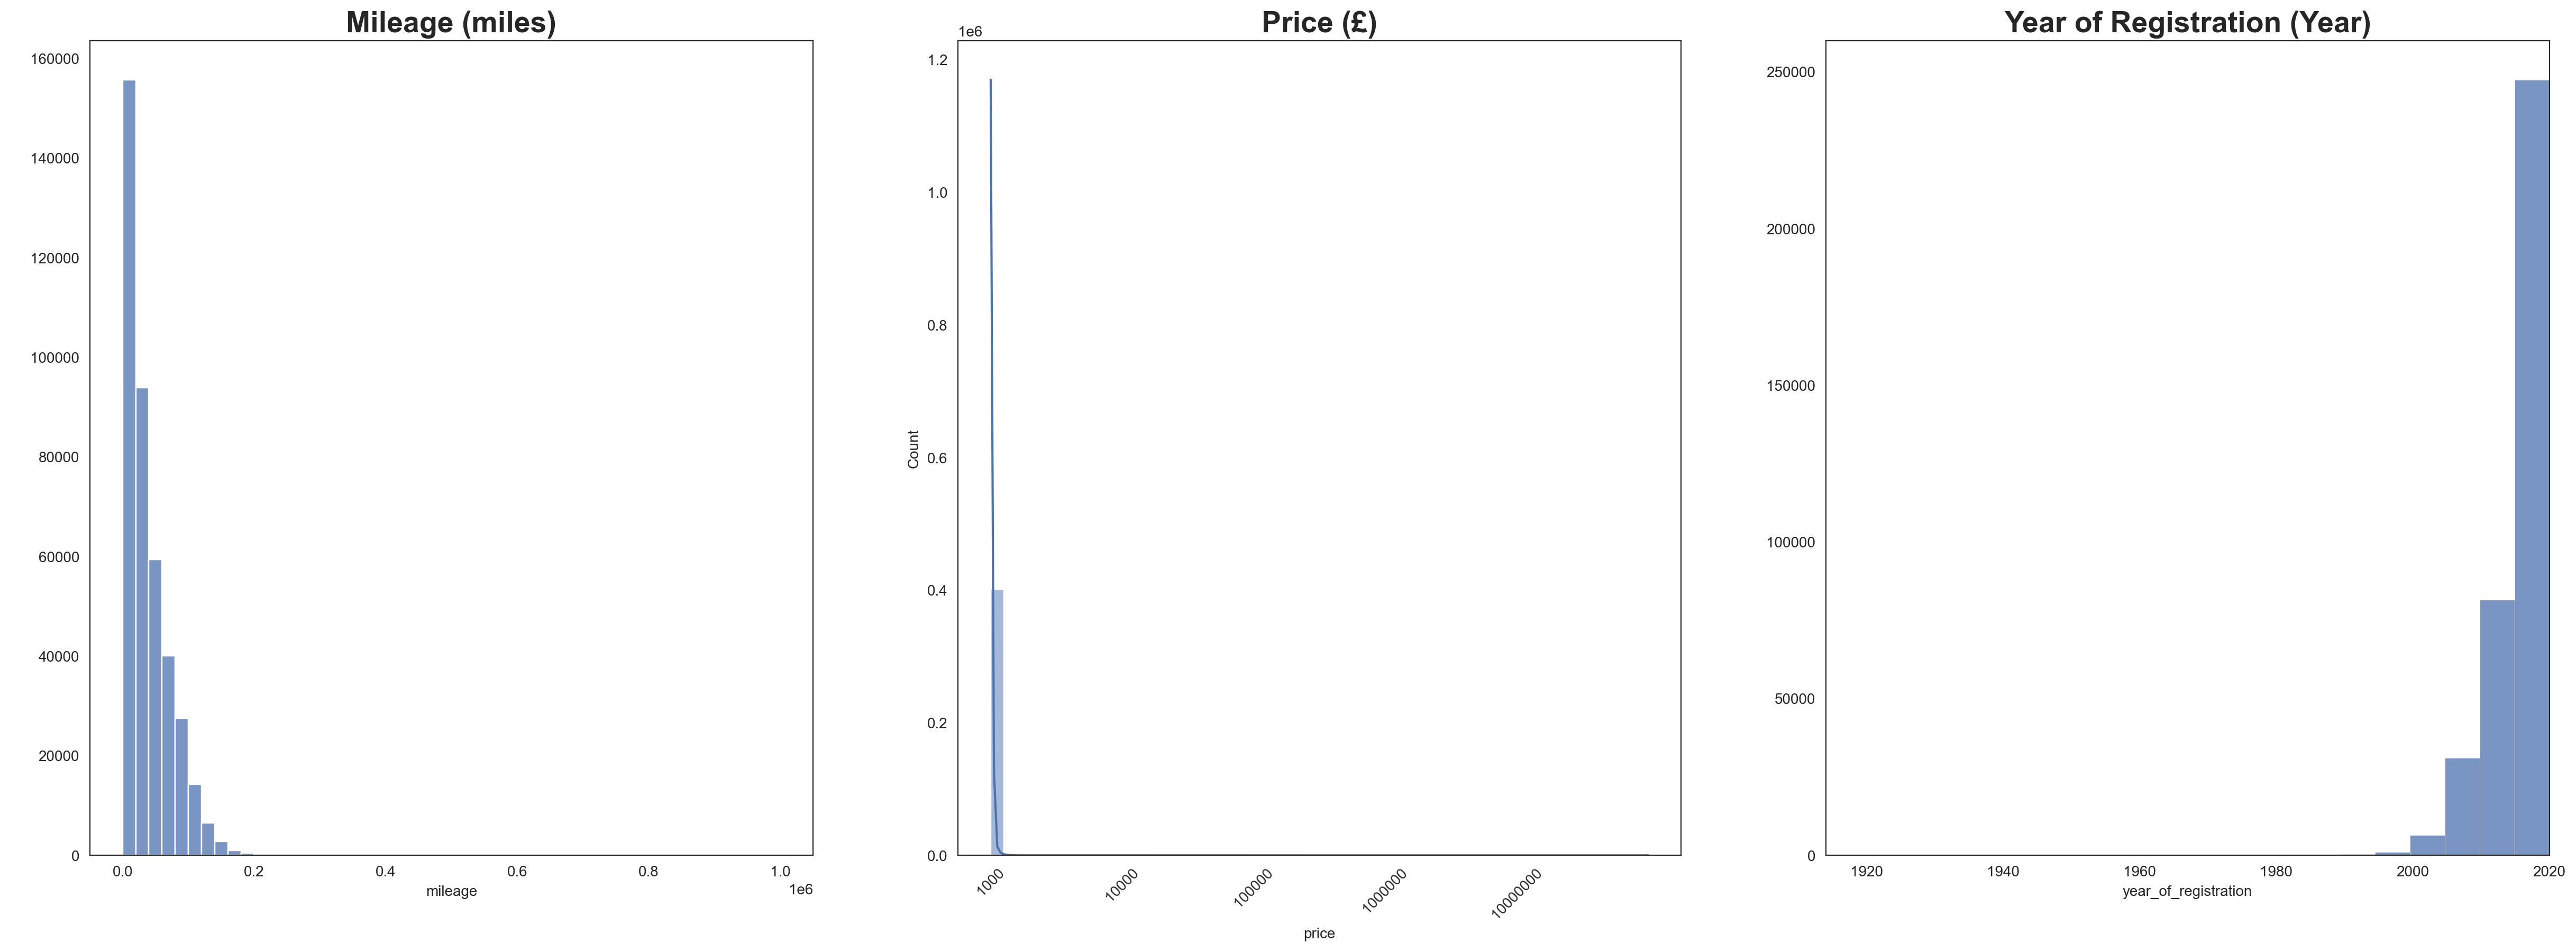

In [9]:
#quick visualization of the distribution of the numerical features)
fig, ax = plt.subplots(1,3, figsize=(30,10))

#histplot for mileage distirbution
sns.histplot(x= df['mileage'], bins=50, ax=ax[0])
ax[0].set_title('Mileage (miles)',fontsize=20, weight='bold')
ax[0].set_ylabel(' ')

#check the frequency distribution of the following important continous variables, Price, mileage, and car_age
sns.histplot(df['price'], kde=True, bins=50, ax= ax[1])
ax[1].set_xticklabels(np.power(10, range(2,8)), rotation =45)
ax[1].set_title('Price (£)', fontsize=20, weight='bold')
plt.ylabel(' ')

#histplot for year_of_registration distirbution
sns.histplot(x= df['year_of_registration'],bins=200, ax=ax[2])
ax[2].set_title('Year of Registration (Year)',fontsize=20, weight='bold')
ax[2].set_ylabel(' ')
ax[2].set_xlim(1914,2020)
plt.savefig('Analysis Distribution.png')
plt.show()

In [10]:
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
#define a function that calculates the total and percentage missing values with a barplot
def missingdata(data):
    total =data.isna().sum().sort_values(ascending=False) #total sum of each missing rows per columns
    percentage = round((data.isna().sum()/data.isna().count()*100),2).sort_values(ascending = False) # percentage of missing rows 
    ms = pd.concat([total, percentage],axis=1, keys=['Total','Percentage'])
    ms =ms[ms['Percentage']>0]
    return ms

missingdata(df)

Total  Percentage
year_of_registration  33311        8.29
reg_code              31857        7.92
standard_colour        5378        1.34
body_type               837        0.21
fuel_type               601        0.15
mileage                 127        0.03

## Data Pre-Processing

### Dealing with missing data and data wrangling

In [13]:
##check all years that are before 1904, as that was the year, registration mark started from 1904
before_1904 = df[df['year_of_registration']<1904]
before_1904['year_of_registration'].unique().tolist()

[1007.0,
 1515.0,
 1063.0,
 1009.0,
 1016.0,
 1010.0,
 1008.0,
 1018.0,
 999.0,
 1017.0,
 1006.0,
 1015.0]

In [14]:
#convert the year_of_registration of the following index to null values and fill them according to the year of their reg_code
df.loc[before_1904.index,['year_of_registration']]= np.nan

In [15]:
reg_code_dict = {'E':'1987','Y': '2001','02':'2002','03': '2003', '04': '2004', '05' :'2005', '06' : '2006', '07':'2007',
                 '08':'2008','09':'2009','10': '2010', '11':'2011', '12':'2012','13':'2013', '14':'2014','15':'2015',
                 '16':'2016','17':'2017','18':'2018','19':'2019','20':'2020', '21':'2021', '51':'2001','52':'2002',
                 '53': '2003','54': '2004', '55' :'2005','56' : '2006', '57':'2007', '58':'2008','59':'2009','60': '2010', 
                 '61':'2011','62':'2012','63':'2013','64':'2014','65':'2015','66':'2016','67':'2017','68':'2018',
                 '69':'2019','70':'2020','71':'2021'}

In [16]:
df['year_of_registration'] = df['year_of_registration'].fillna(df['reg_code'].map(reg_code_dict))

In [17]:
## assuming the first 4 public reference signifies the year the vehicle was up for advertisment sale, extract the first 4 numbers
df['advert_year'] = df['public_reference'].apply(lambda x: str(x)[0:4]).astype('int64')

In [18]:
#It is observed that new cars do not have both reg code and year of registration, therefore making it hard to get  the year of registration.
#Assume that new cars were registered by the latest year of the advert year
df['year_of_registration']= df['year_of_registration'].fillna(df['advert_year'].max())

In [19]:
#age of the car as at when advertised is the advert year minus the year of registration
#convert year_of_registration to float and then to int
df['year_of_registration'] =df['year_of_registration'].astype('float64')
df['year_of_registration'] =df['year_of_registration'].astype('int64')
df['car_age'] = df['advert_year'] - df['year_of_registration'] 
#according to the table, some cars were registered after they've been advertised, get to absolute value of car_age column
df['car_age'] =abs(df['car_age'])

In [20]:
#remove reg_code column has it is no longer relevant to my analysis
df.drop(columns=['reg_code', 'public_reference','year_of_registration','advert_year'], inplace=True)

In [21]:
#to fill the standard colour null values, fill with the most occuring colours
print(df['standard_colour'].value_counts(normalize=True).head(1))
#according to the above result, Black is the most occuring car colour in the data frame
df['standard_colour'] =df['standard_colour'].fillna('Black')

standard_colour
Black    0.217552
Name: proportion, dtype: float64


### Dealing with outliers

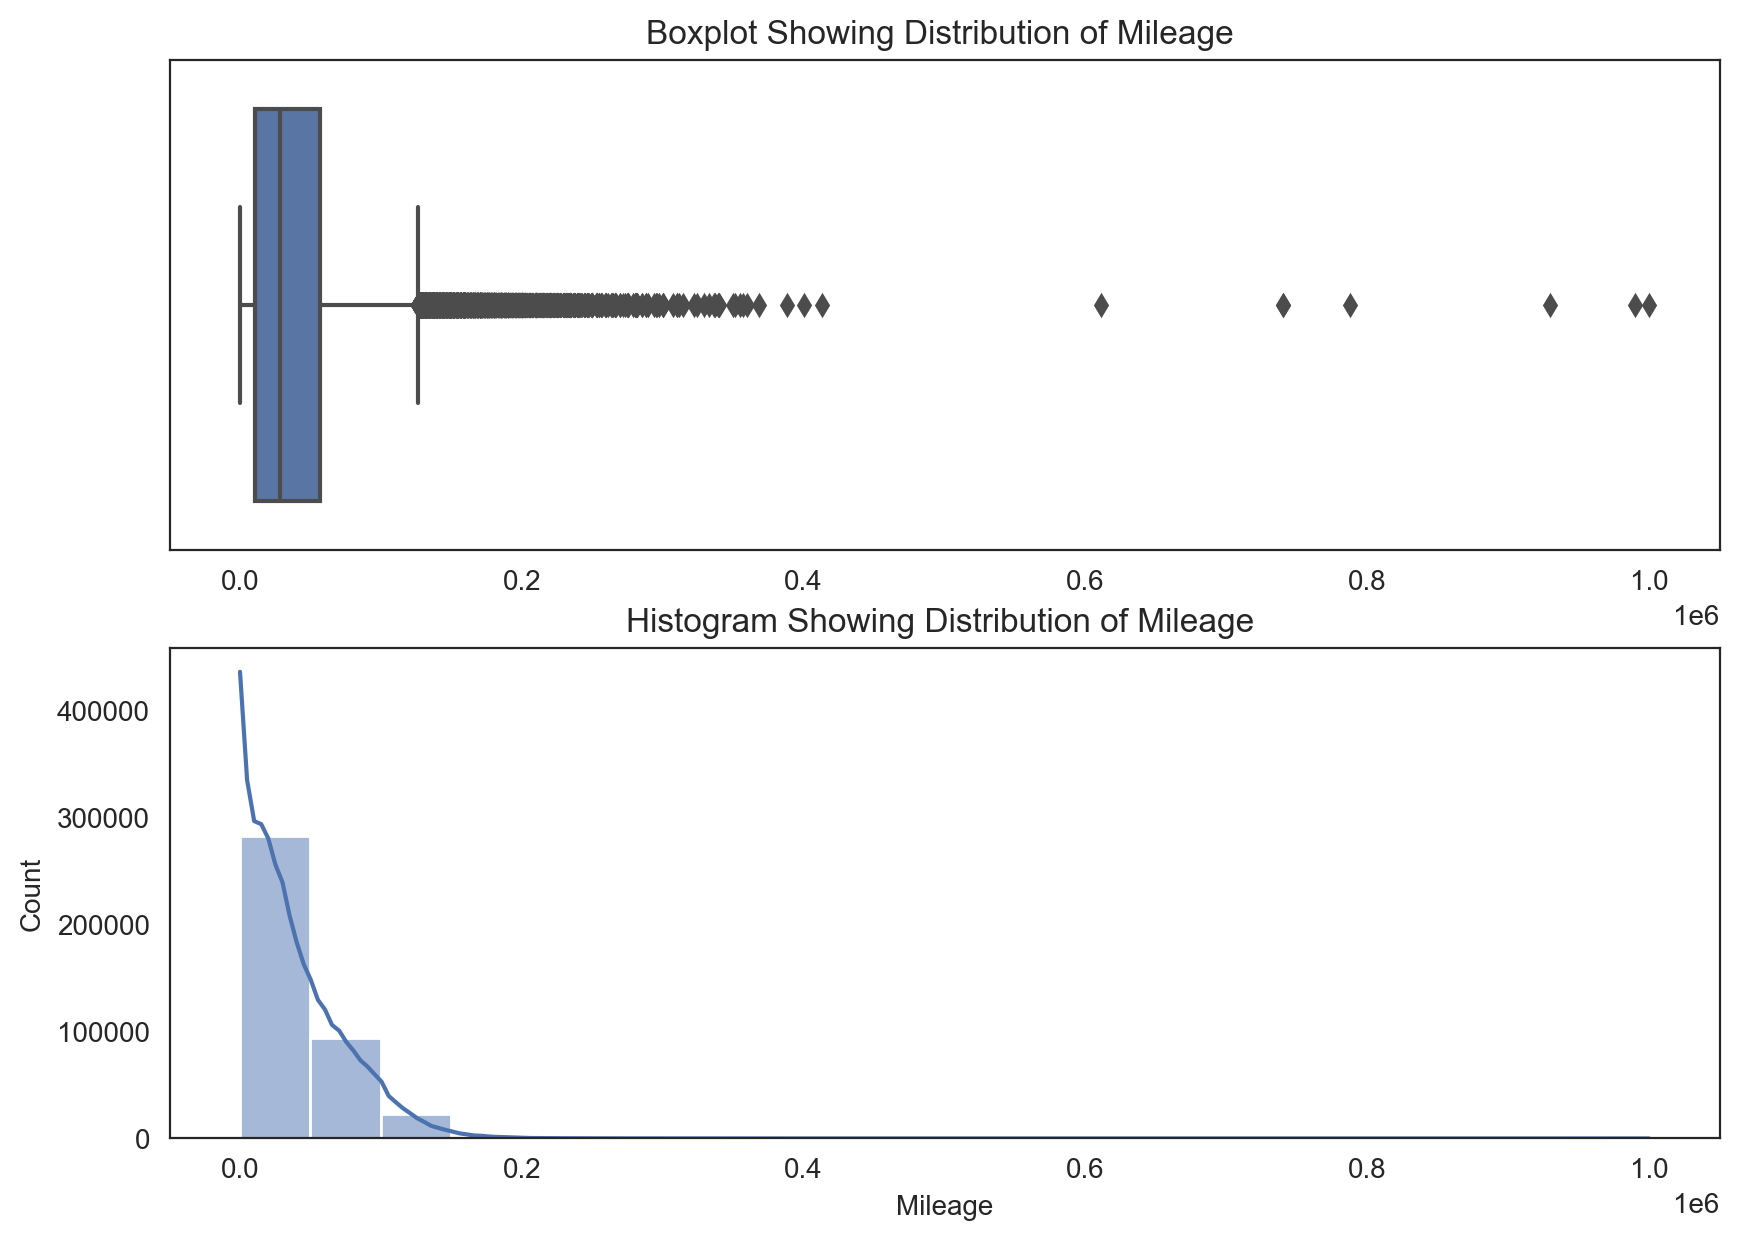

In [22]:
### show boxplot and histogram displaying outliersin mileage fature
fig, ax = plt.subplots(2,1)
sns.boxplot(data= df, x='mileage', ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title("Boxplot Showing Distribution of Mileage ")

sns.histplot(data= df, x='mileage',bins=20, kde=True, ax=ax[1])
ax[1].set_title("Histogram Showing Distribution of Mileage ")
ax[1].set_xlabel('Mileage')
plt.savefig('Mileage before capping.png')

"Modern cars often last well beyond 200,000 miles - with some relatively regularly being seen with more than 300,000 miles on the clock - provided they've been serviced regularly and looked after well."

James, W(2022), 'What milage is good for a used car?'. *Buyacar* Available at https://www.buyacar.co.uk/car-advice/what-mileage-is-good-for-a-used-car/(Accessed: 27 Decembr 2023)

In [23]:
## asuming that cars are in good condition to be worthy for sale, cap the milage at 300000 miles
df['mileage'] = df['mileage'].apply(lambda x: x if x<=300000 else 300000)

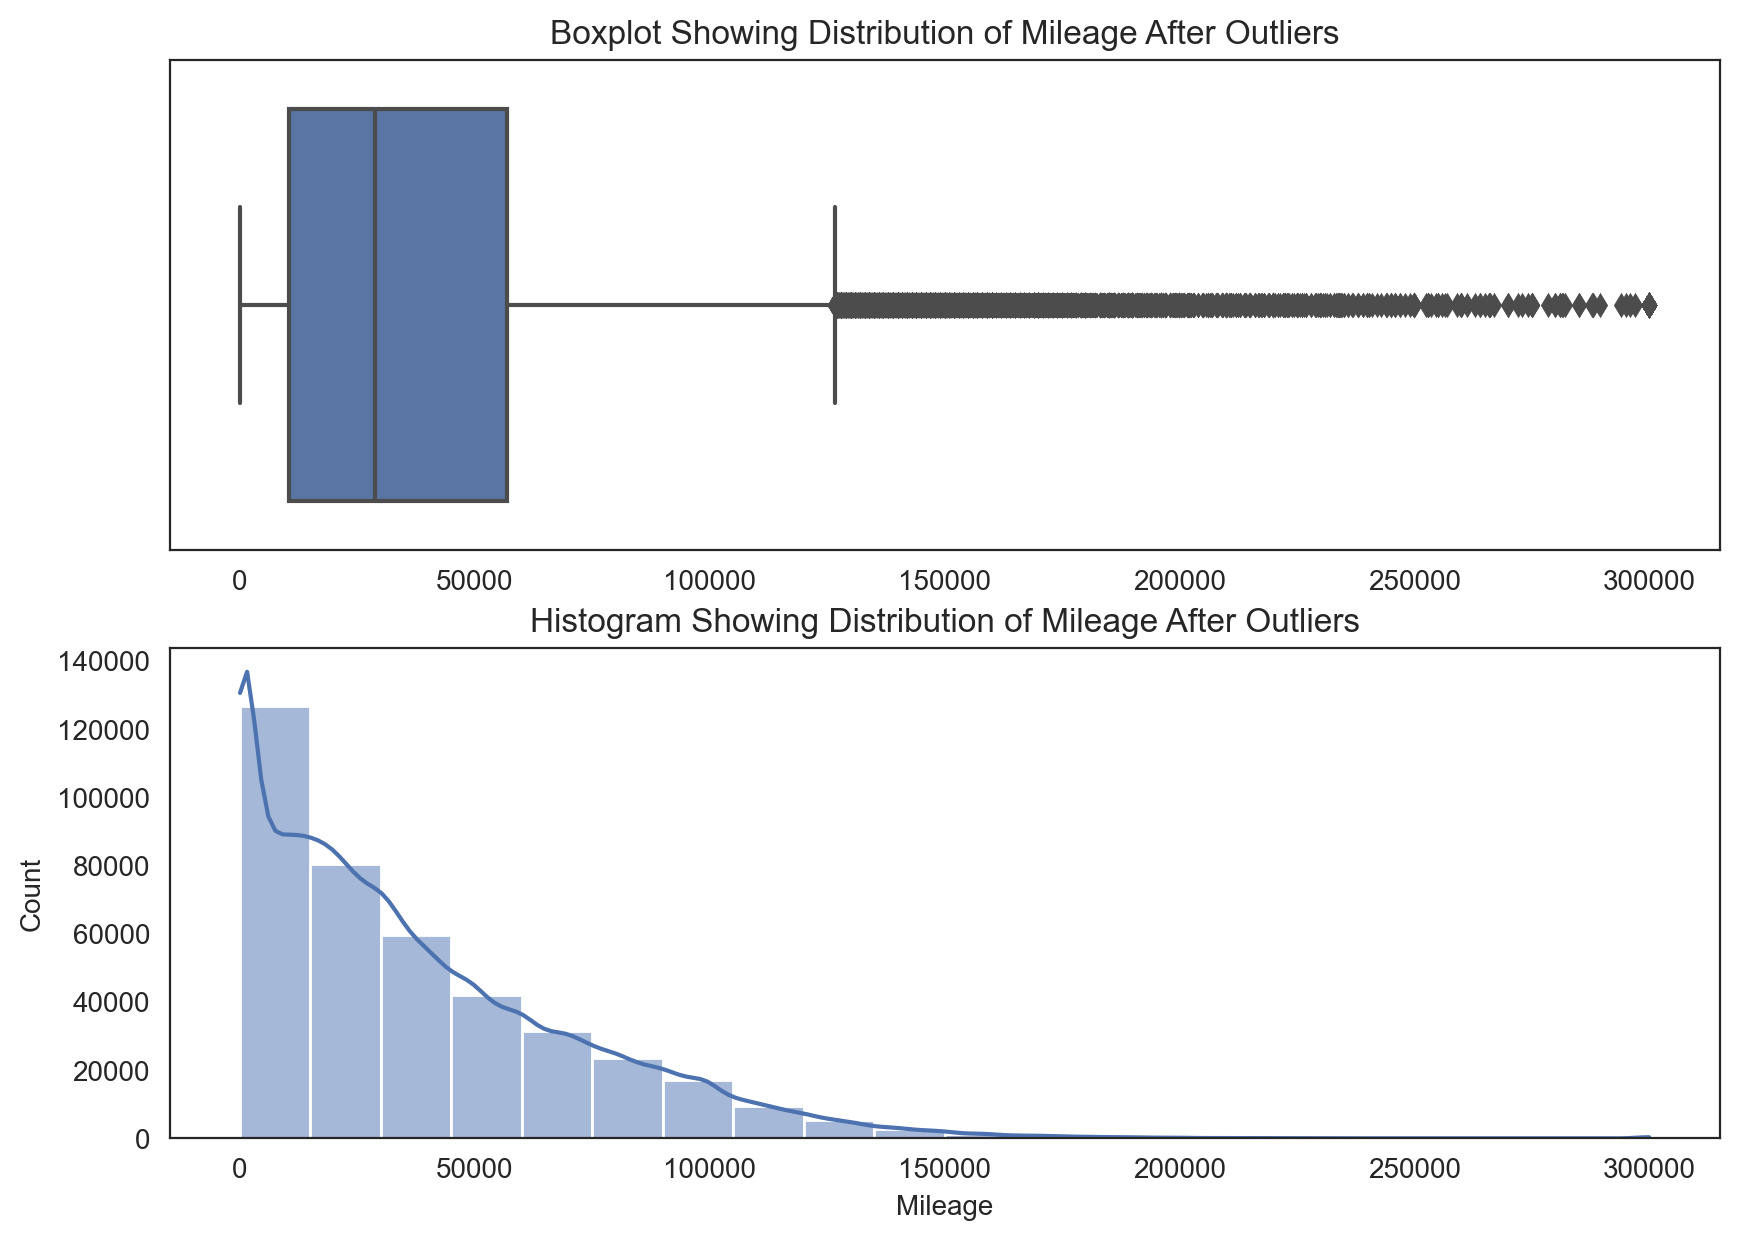

In [24]:
### show boxplot displaying outliersin mileage fature
fig, ax = plt.subplots(2,1)
sns.boxplot(data= df, x='mileage', ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title("Boxplot Showing Distribution of Mileage After Outliers")

sns.histplot(data= df, x='mileage', bins= 20, kde= True, ax=ax[1])
ax[1].set_title("Histogram Showing Distribution of Mileage After Outliers")
ax[1].set_xlabel('Mileage')
plt.savefig('Mileage after capping.png')

In [25]:
df.shape

(402005, 10)

Skewness: 154.68152711899864
Kurtosis: 32182.673249182717


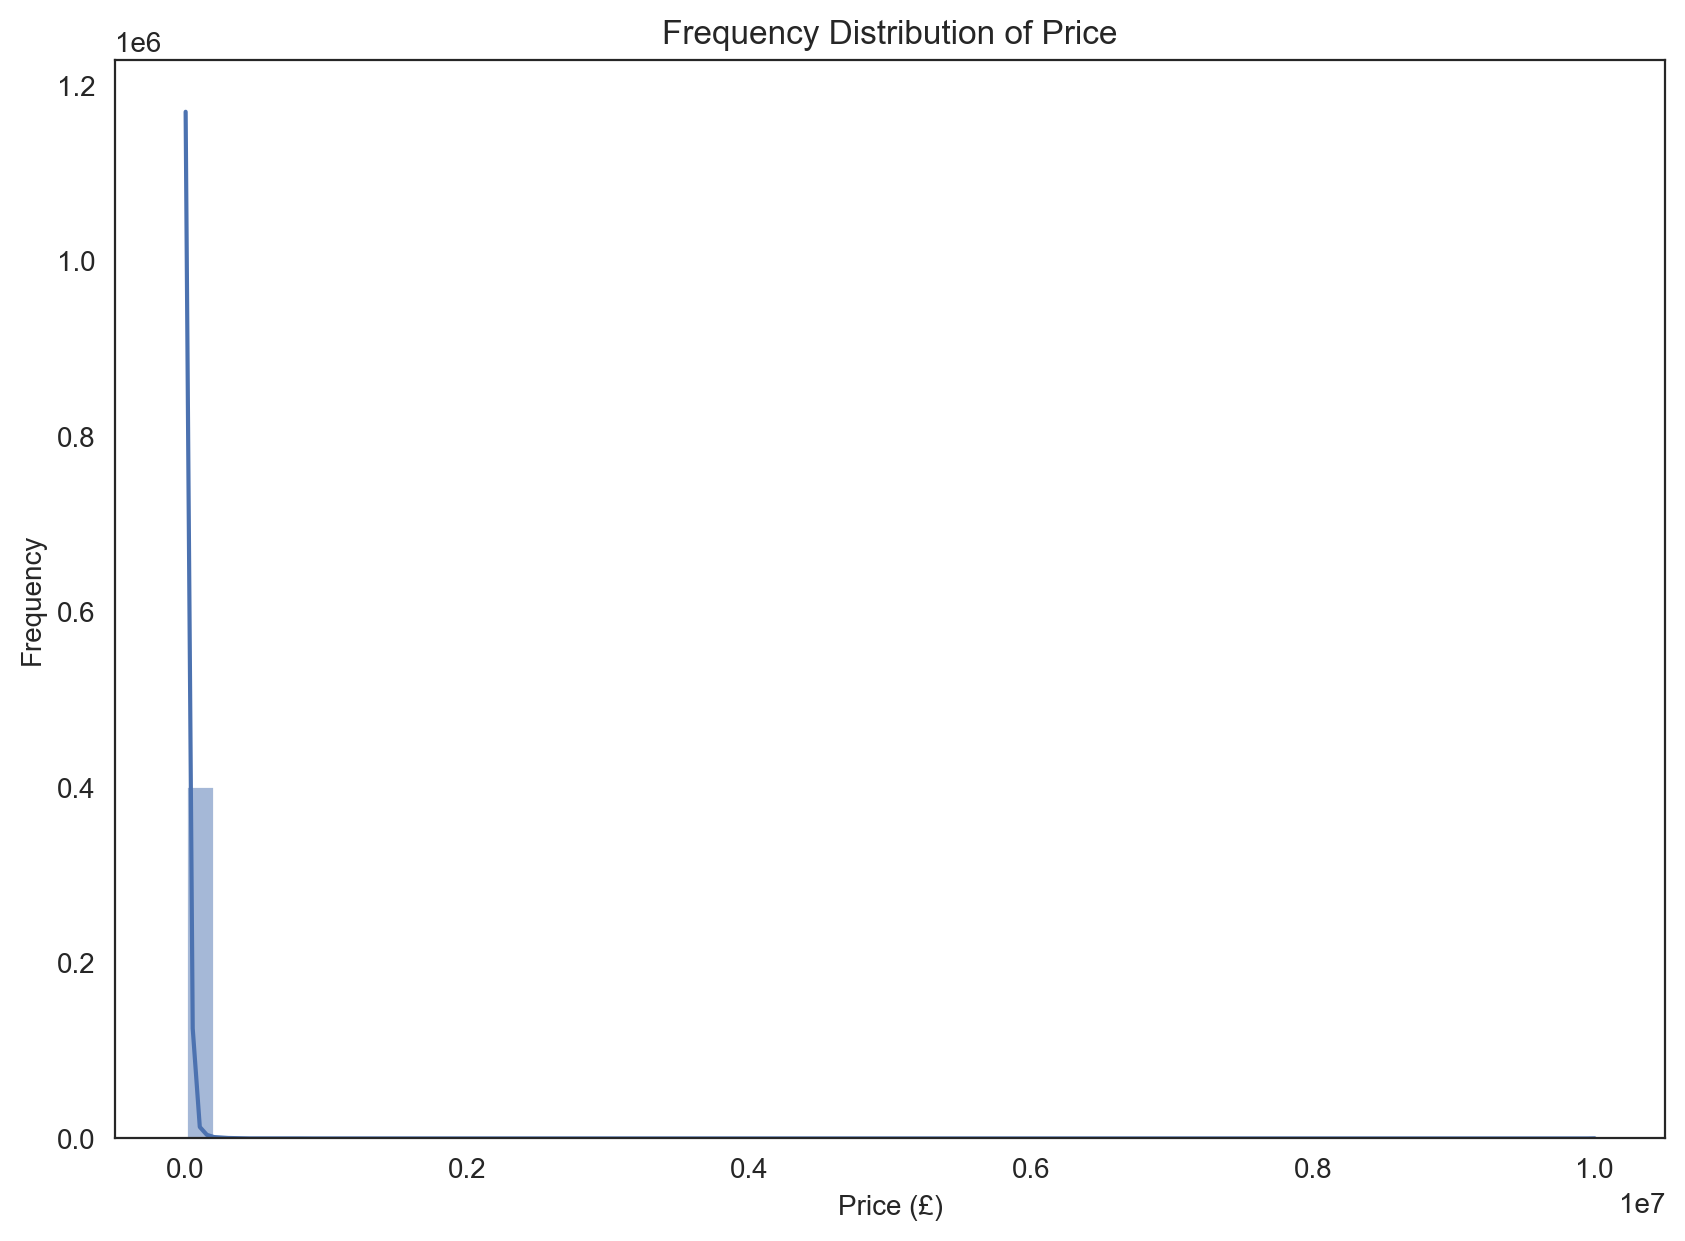

In [26]:
#check the frequency distribution of the following important continous variables, Price, mileage, and car_age
sns.histplot(df['price'], kde=True, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price (£)')
plt.title("Frequency Distribution of Price")
print(f"Skewness: {df['price'].skew()}")
print(f"Kurtosis: {df['price'].kurt()}")


In [27]:
### limit the percentile to 1st percentile and 99th percentile
upper_limit = np.quantile(df['price'], 0.99)
lower_limit = np.quantile(df['price'], 0.01)

df = df[(df['price'] >lower_limit) & (df['price'] < upper_limit)]

Skewness: 2.101701338696243
Kurtosis: 6.02599040701505


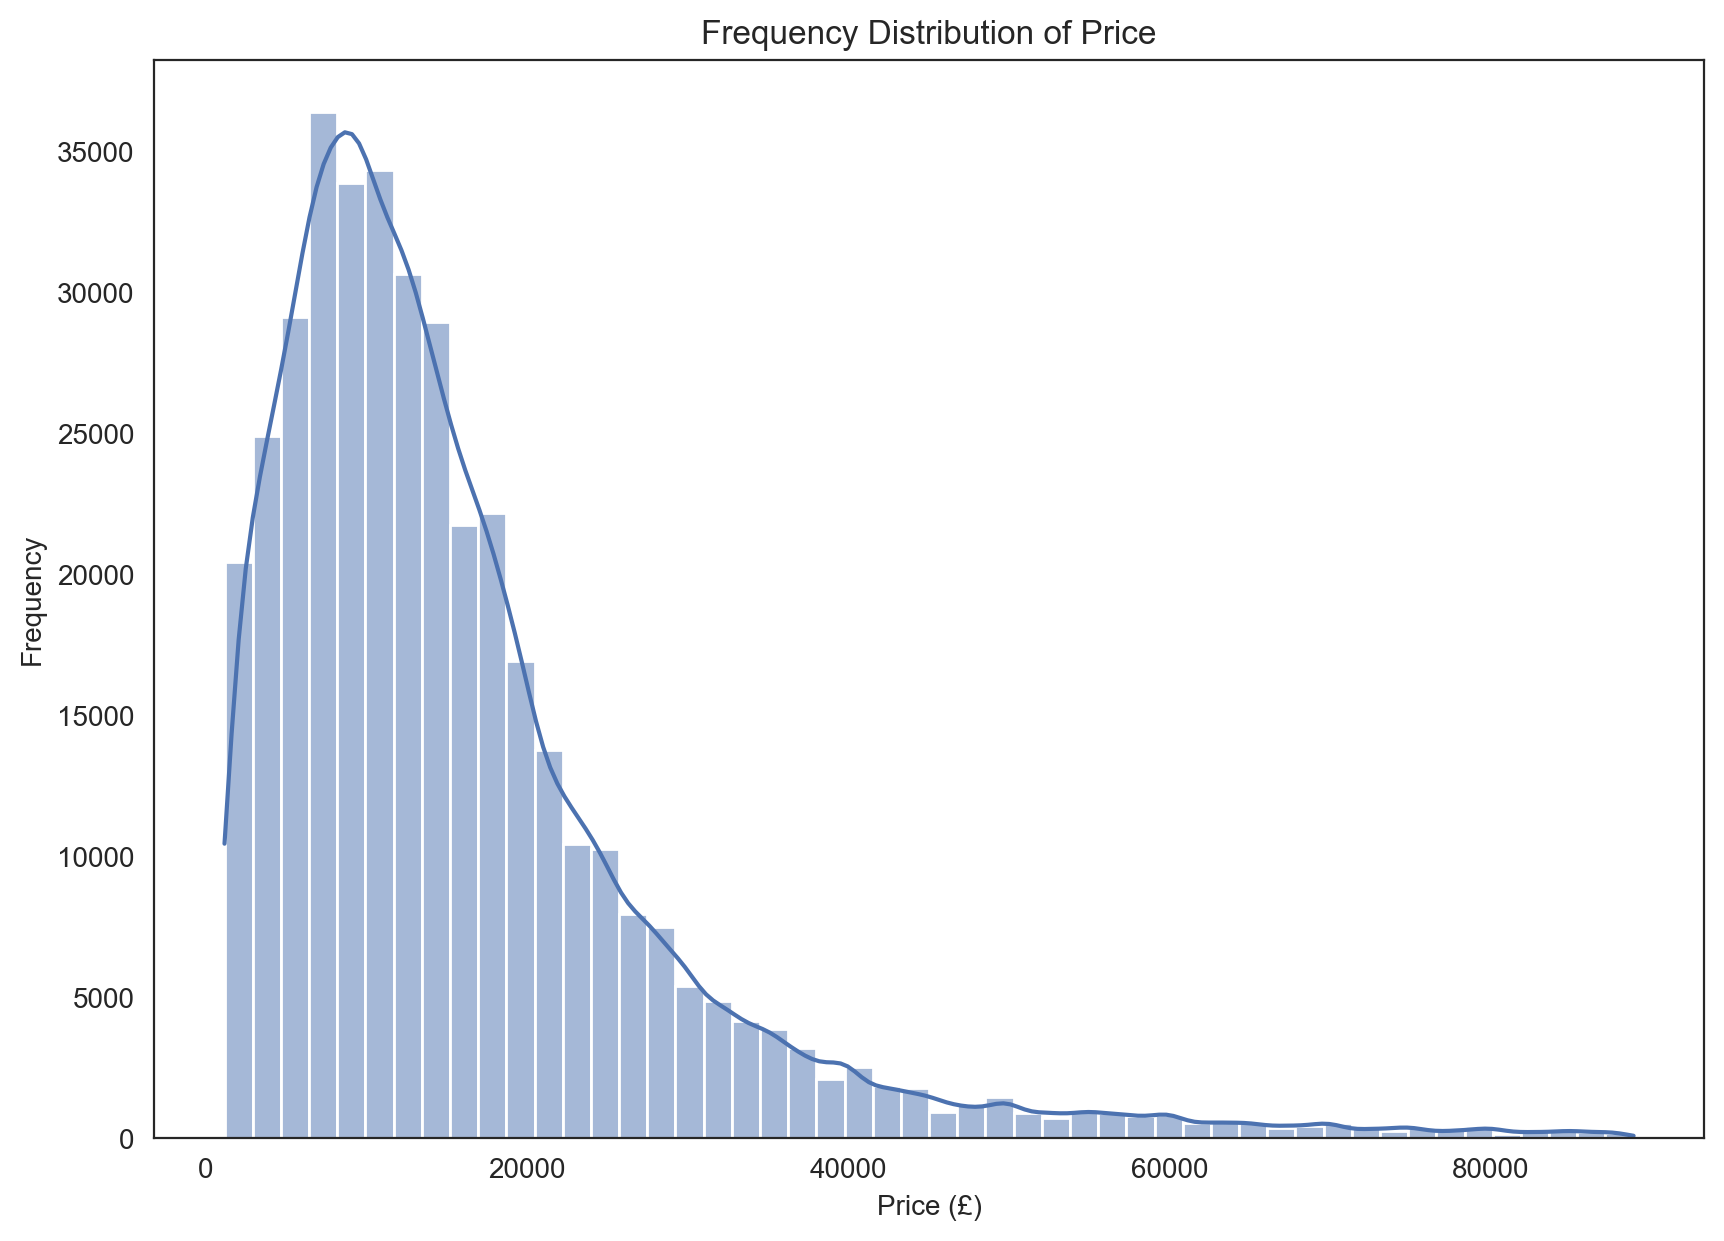

In [28]:
#check the frequency distribution of the following important continous variables, Price, mileage, and car_age
sns.histplot(df['price'], kde=True, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price (£)')
plt.title("Frequency Distribution of Price")
print(f"Skewness: {df['price'].skew()}")
print(f"Kurtosis: {df['price'].kurt()}")

In [29]:
df['price'].describe()

count    393902.000000
mean      15882.635699
std       12685.647213
min        1155.000000
25%        7500.000000
50%       12600.000000
75%       19990.000000
max       88888.000000
Name: price, dtype: float64

In [30]:
df.shape

(393902, 10)

##### EXPLORATORY DATA ANALYSIS

In [31]:
df

mileage standard_colour standard_make     standard_model  \
0            0.0            Grey         Volvo               XC90   
1       108230.0            Blue        Jaguar                 XF   
2         7800.0            Grey         SKODA               Yeti   
3        45000.0           Brown      Vauxhall              Mokka   
4        64000.0            Grey    Land Rover  Range Rover Sport   
...          ...             ...           ...                ...   
402000    5179.0            Grey       Peugeot                208   
402001  110000.0             Red       Peugeot                107   
402002   52760.0           White        Nissan            Qashqai   
402003   10250.0             Red        Abarth                595   
402004   14000.0          Silver          Audi           A4 Avant   

       vehicle_condition  price  body_type  crossover_car_and_van  \
0                    NEW  73970        SUV                  False   
1                   USED   7000     Saloon                  False   
2                   USED  14000        SUV                  False   
3                   USED   7995  Hatchback                  False   
4                   USED  26995        SUV                  False   
...                  ...    ...        ...                    ...   
402000              USED  10595  Hatchback                  False   
402001              USED   2000  Hatchback                  False   
402002              USED   7250        SUV                  False   
402003              USED  11490  Hatchback                  False   
402004              USED  20520     Estate                  False   

                    fuel_type  car_age  
0       Petrol Plug-in Hybrid        0  
1                      Diesel        9  
2                      Petrol        3  
3                      Diesel        4  
4                      Diesel        5  
...                       ...      ...  
402000                 Petrol        1  
402001                 Petrol       11  
402002                 Petrol        8  
402003                 Petrol        5  
402004                 Diesel        1  

[393902 rows x 10 columns]

The average milage is 37371 miles, while the median mileage is 28588 miles


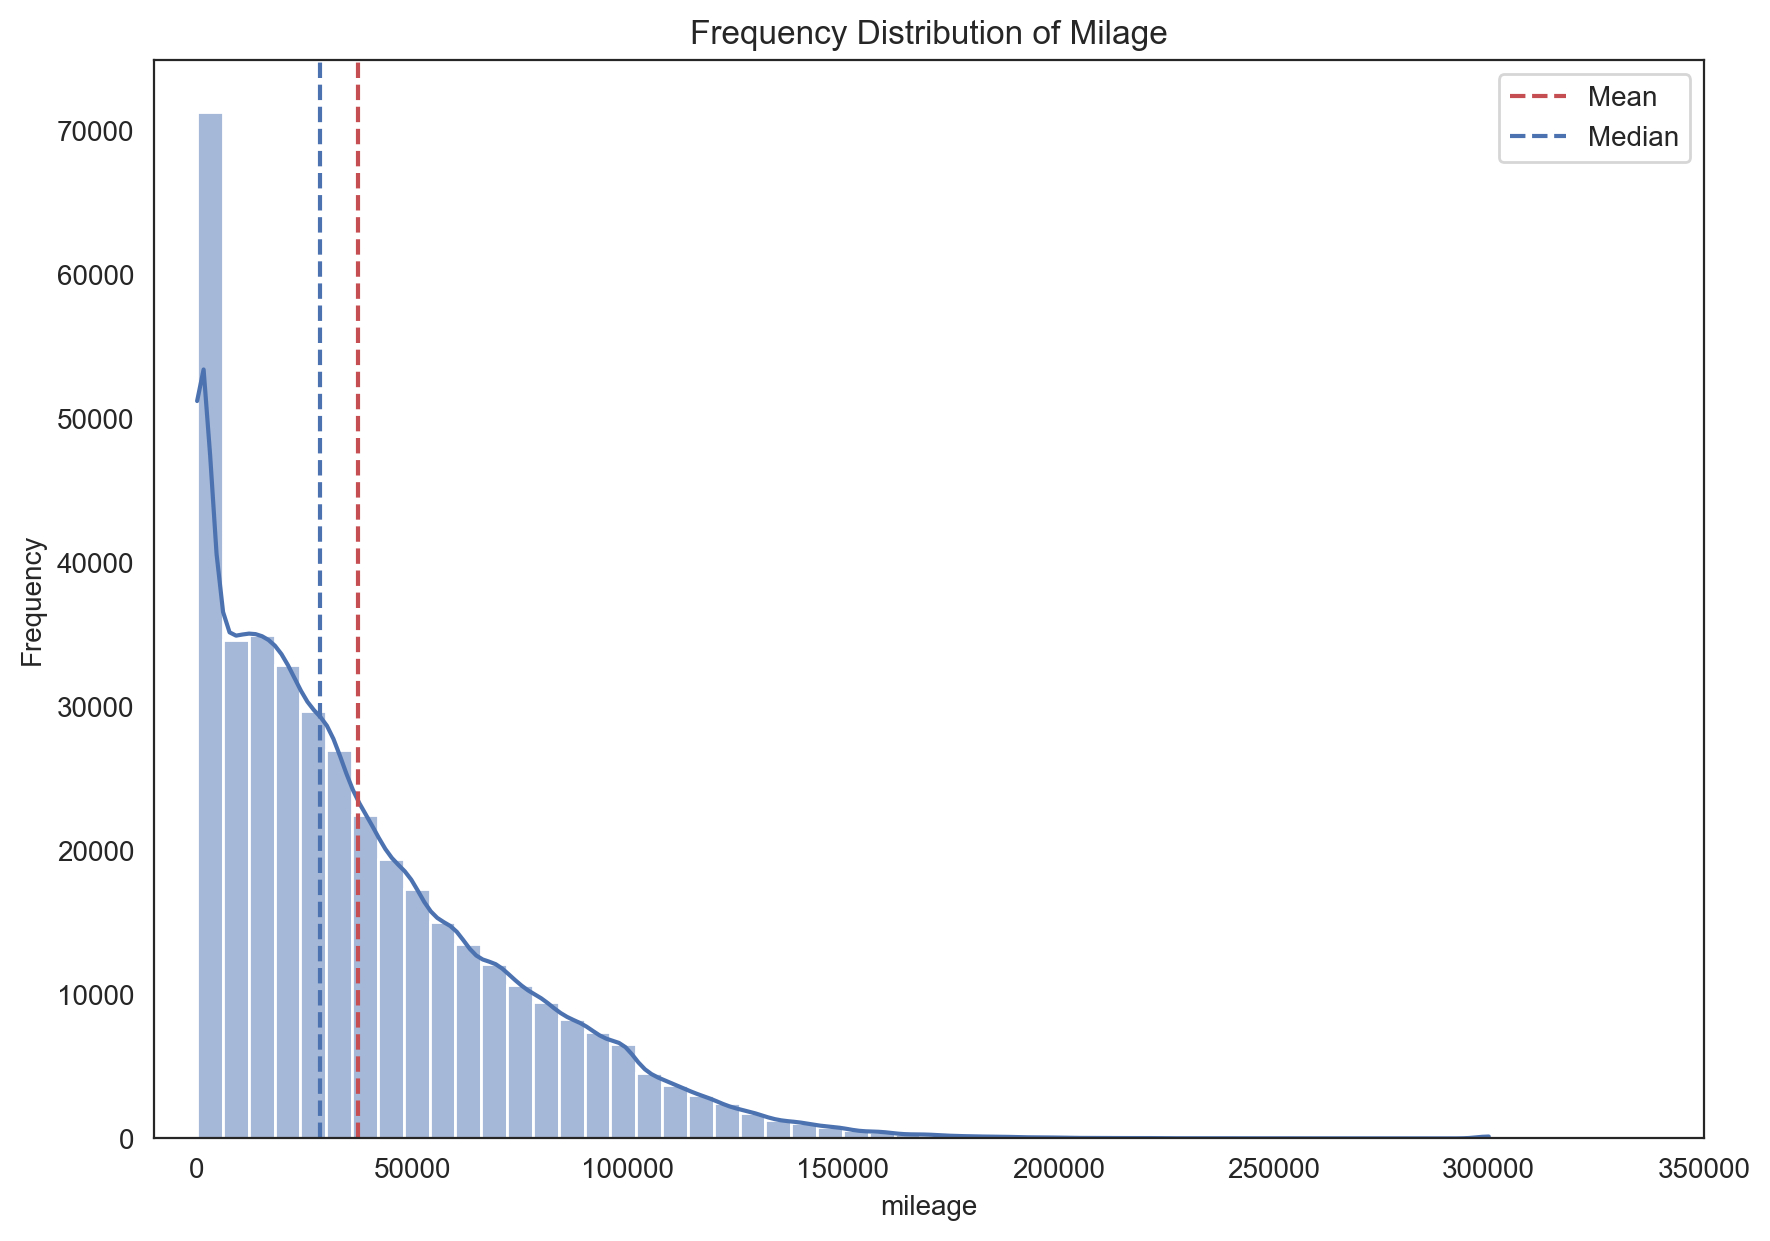

In [32]:
print(f"The average milage is {round(df['mileage'].mean())} miles, while the median mileage is {round(df['mileage'].median())} miles" )
sns.histplot(data=df, x='mileage', bins=50, kde=True)
plt.axvline(x=df['mileage'].mean(), linestyle='--', color='r', label='Mean')
plt.axvline(x =df['mileage'].median(), linestyle='--', color='b', label='Median')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Milage')
plt.xlim(-10000,350000)
plt.legend()
plt.show()

Observation: The frequency distribution of milage is signifcantly skewed to the right, signifying that the average mileage is very sensitive to to the direction of the skew.

In [33]:
# what is the percentage of new cars up for sale in relation to used cars
round(df['vehicle_condition'].value_counts()*100.0/ len(df),2)

vehicle_condition
USED    92.21
NEW      7.79
Name: count, dtype: float64

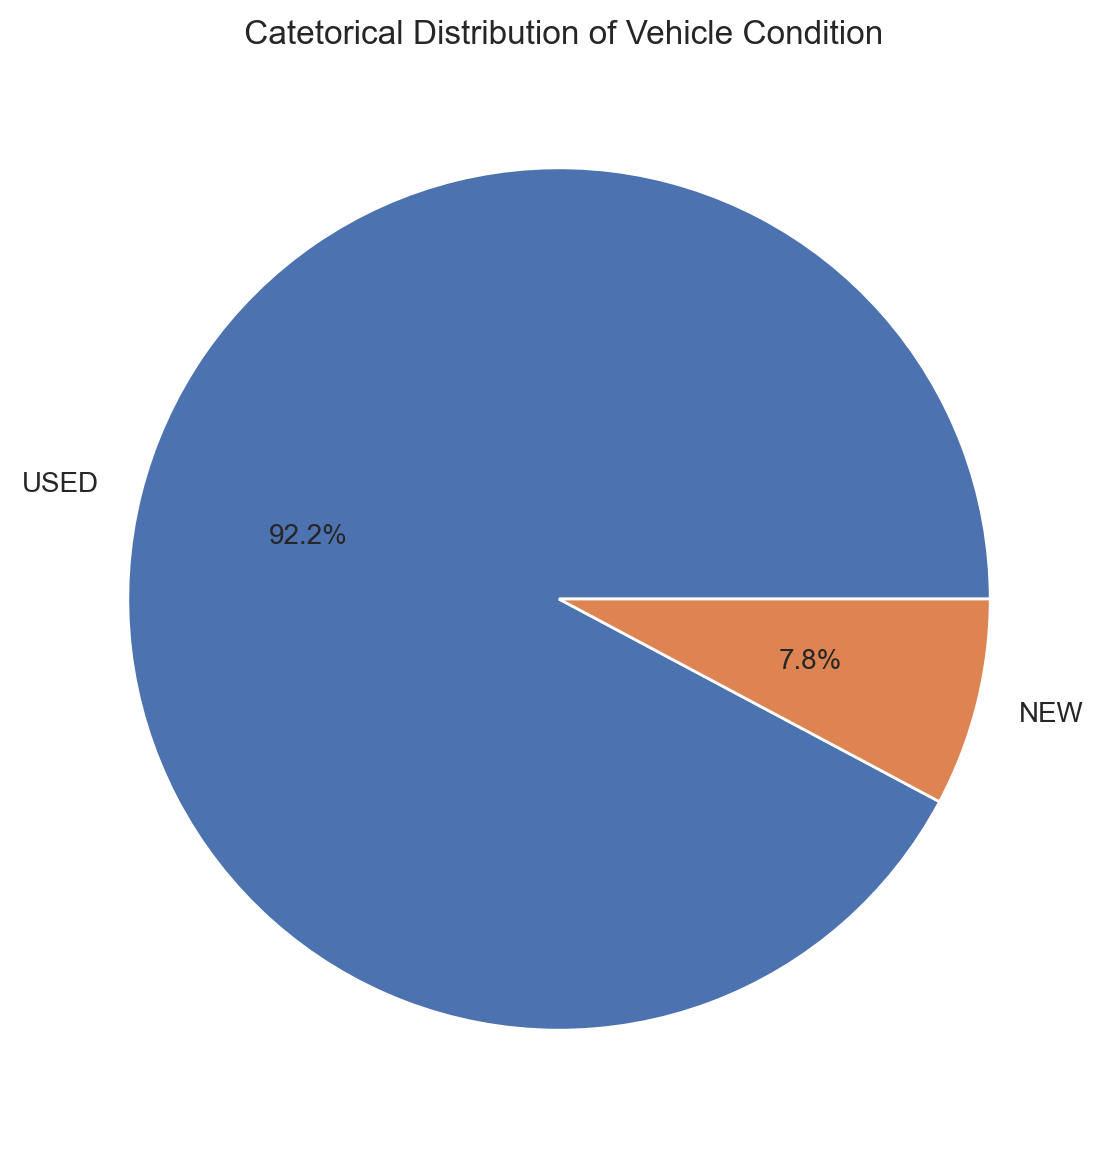

In [34]:
df['vehicle_condition'].value_counts().plot(kind='pie', autopct='%.1f%%',xlabel=' Vehicle Condition',ylabel='', title=' Catetorical Distribution of Vehicle Condition')
plt.show()

Observation : 92% of the cars advertised are used cars, while just only about 8% are new, how is this important to other features such as price and fuel_type?  

<Axes: xlabel='car_age'>

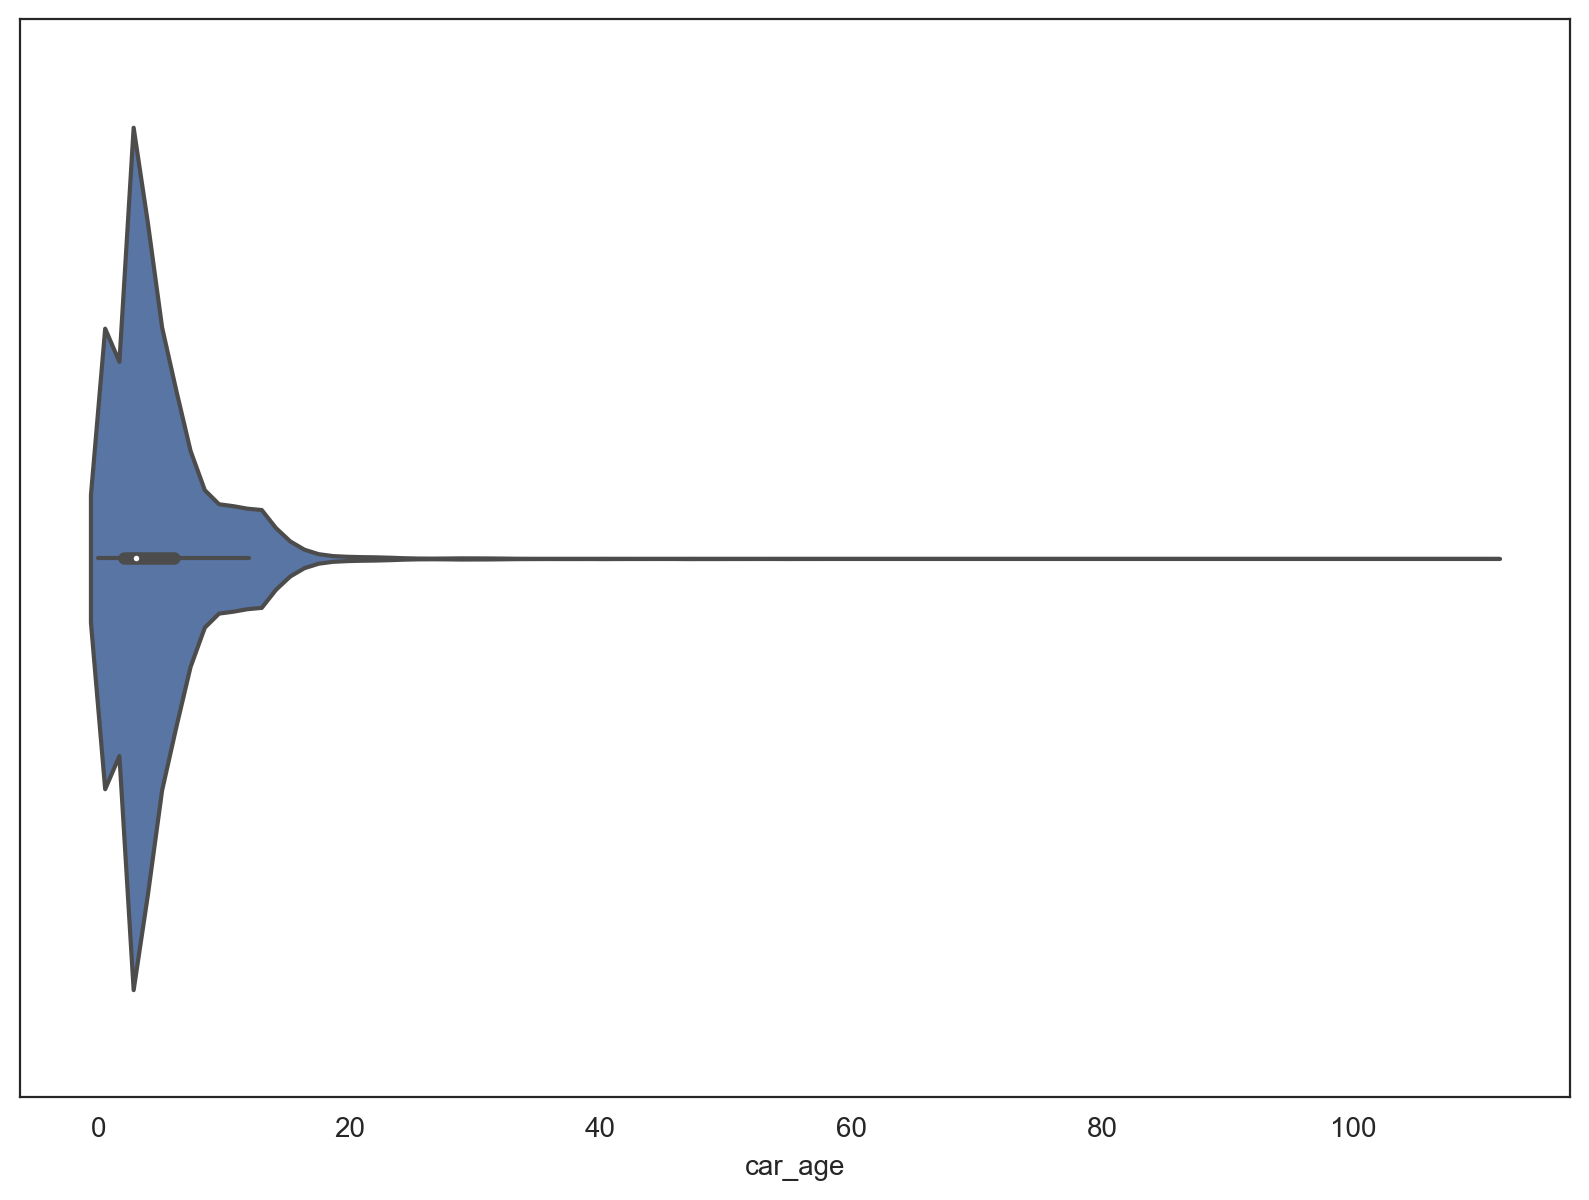

In [35]:
## distribution og car_age
sns.violinplot(data=df , x='car_age')

In [36]:
#determine the number of unique colours available in the dataset and also their counts
print(f"There are a total of {df['standard_colour'].nunique()} unique colours in the dataset")

#check the fraction of each colour in the dataset
df['standard_colour'].value_counts(normalize=True)

There are a total of 22 unique colours in the dataset


standard_colour
Black          0.227549
White          0.178029
Grey           0.170243
Blue           0.148314
Silver         0.121121
Red            0.104539
Green          0.010782
Orange         0.010152
Brown          0.005093
Yellow         0.005032
Multicolour    0.004656
Beige          0.003826
Bronze         0.003361
Purple         0.002983
Gold           0.001932
Pink           0.001031
Turquoise      0.000757
Maroon         0.000388
Burgundy       0.000157
Magenta        0.000038
Navy           0.000015
Indigo         0.000003
Name: proportion, dtype: float64

In [37]:
#for the sake of visualization and further analysis, assign all colours that have less than 1% frequency of the entire dataset to'Others'
colour_other = df['standard_colour'].value_counts(normalize=True).to_dict()
df['standard_colour'] = df['standard_colour'].apply(lambda x : x if colour_other[x] >0.01 else 'Other')

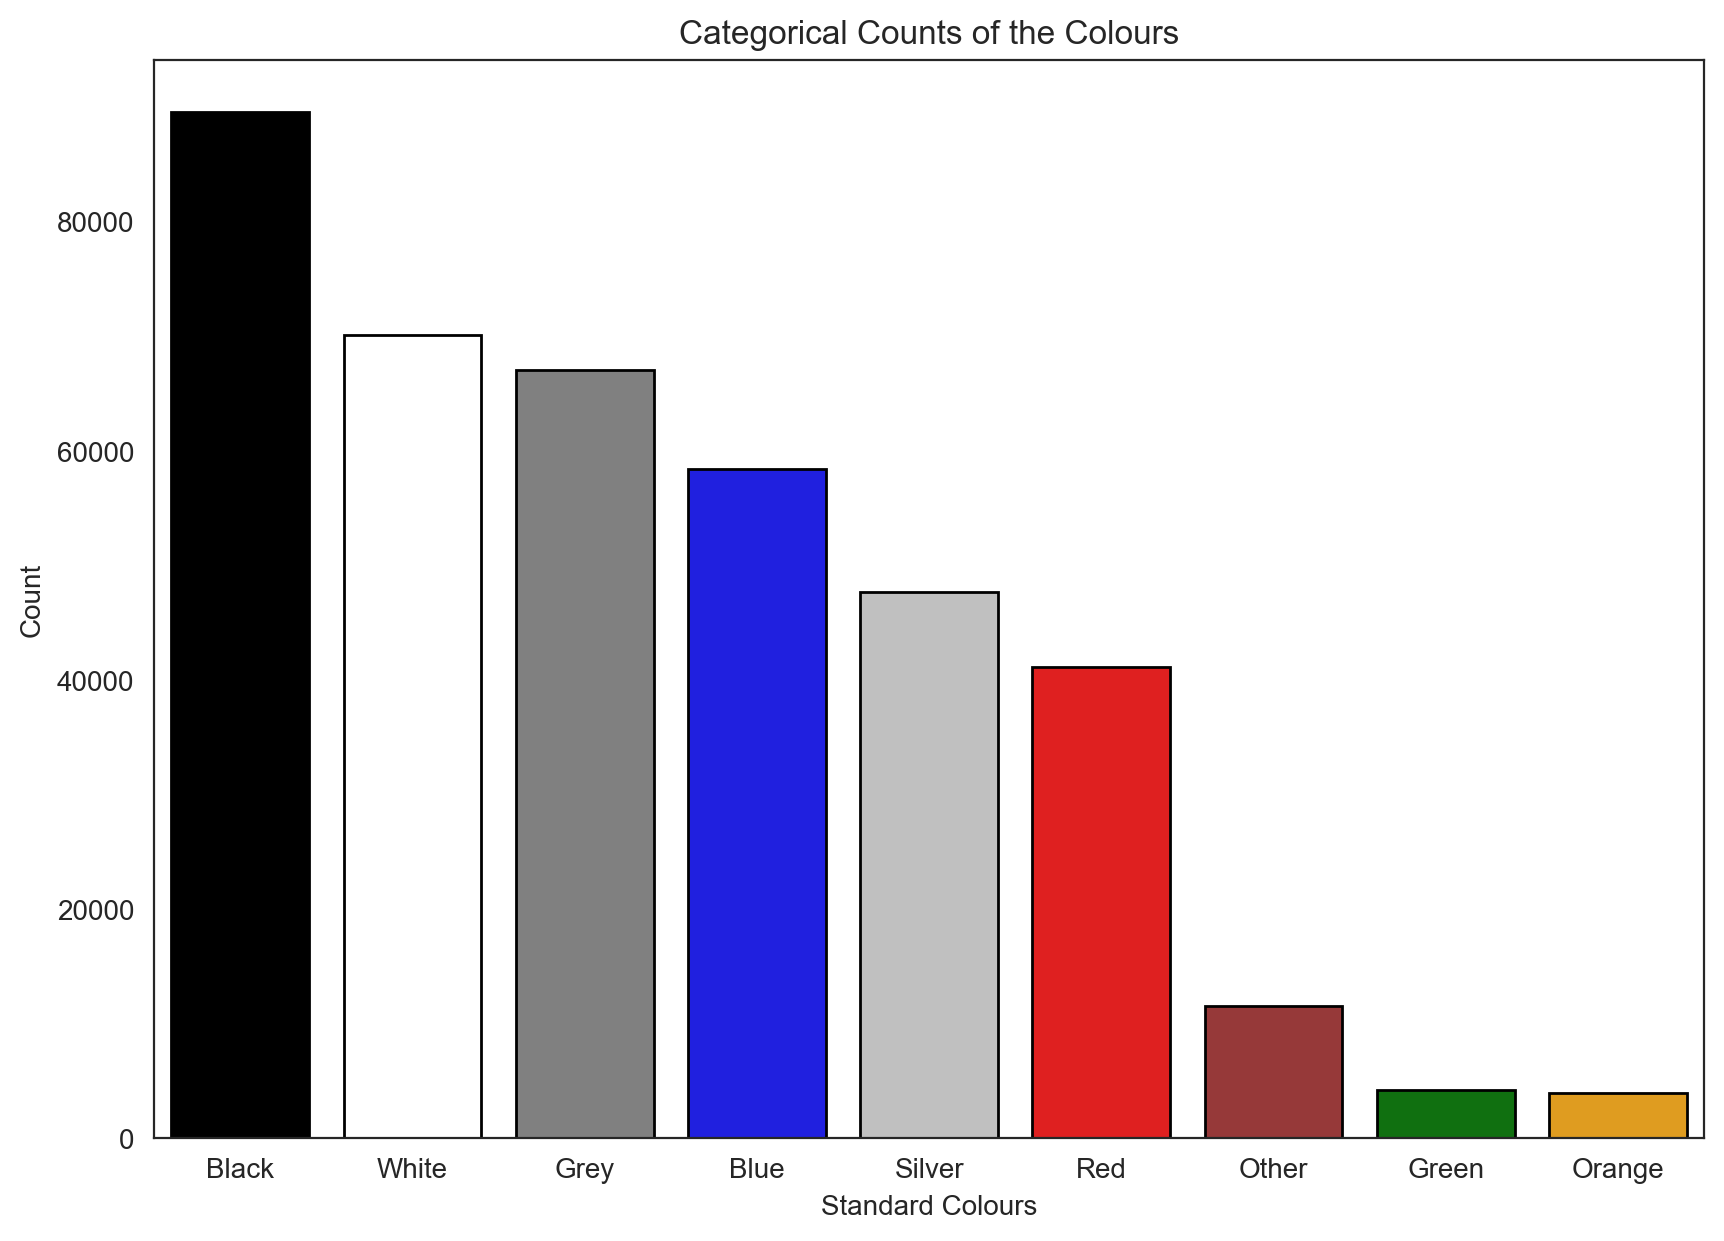

In [38]:
#plot a countplot to visualize the colours ad their frquency
fig, ax = plt.subplots()
palette = ['Black','White','Grey','Blue','Silver','Red','Brown','Green','Orange']
order=['Black','White','Grey','Blue','Silver','Red','Other','Green','Orange']
sns.countplot(data=df, x='standard_colour',order=order,palette = palette,edgecolor='black' )
plt.xlabel('Standard Colours')
plt.ylabel('Count')
plt.title('Categorical Counts of the Colours')
plt.show()

MULTIVARIATE 

In [39]:
range = [0, 20, 40, 60, df['car_age'].max()]  # Example value ranges

# Create labels for each group
labels = ['0-20', '21-40', '41-60', '60-above']

# Categorize data into groups based on value ranges
categories = pd.cut(df['car_age'], bins=range, labels=labels, right=False)

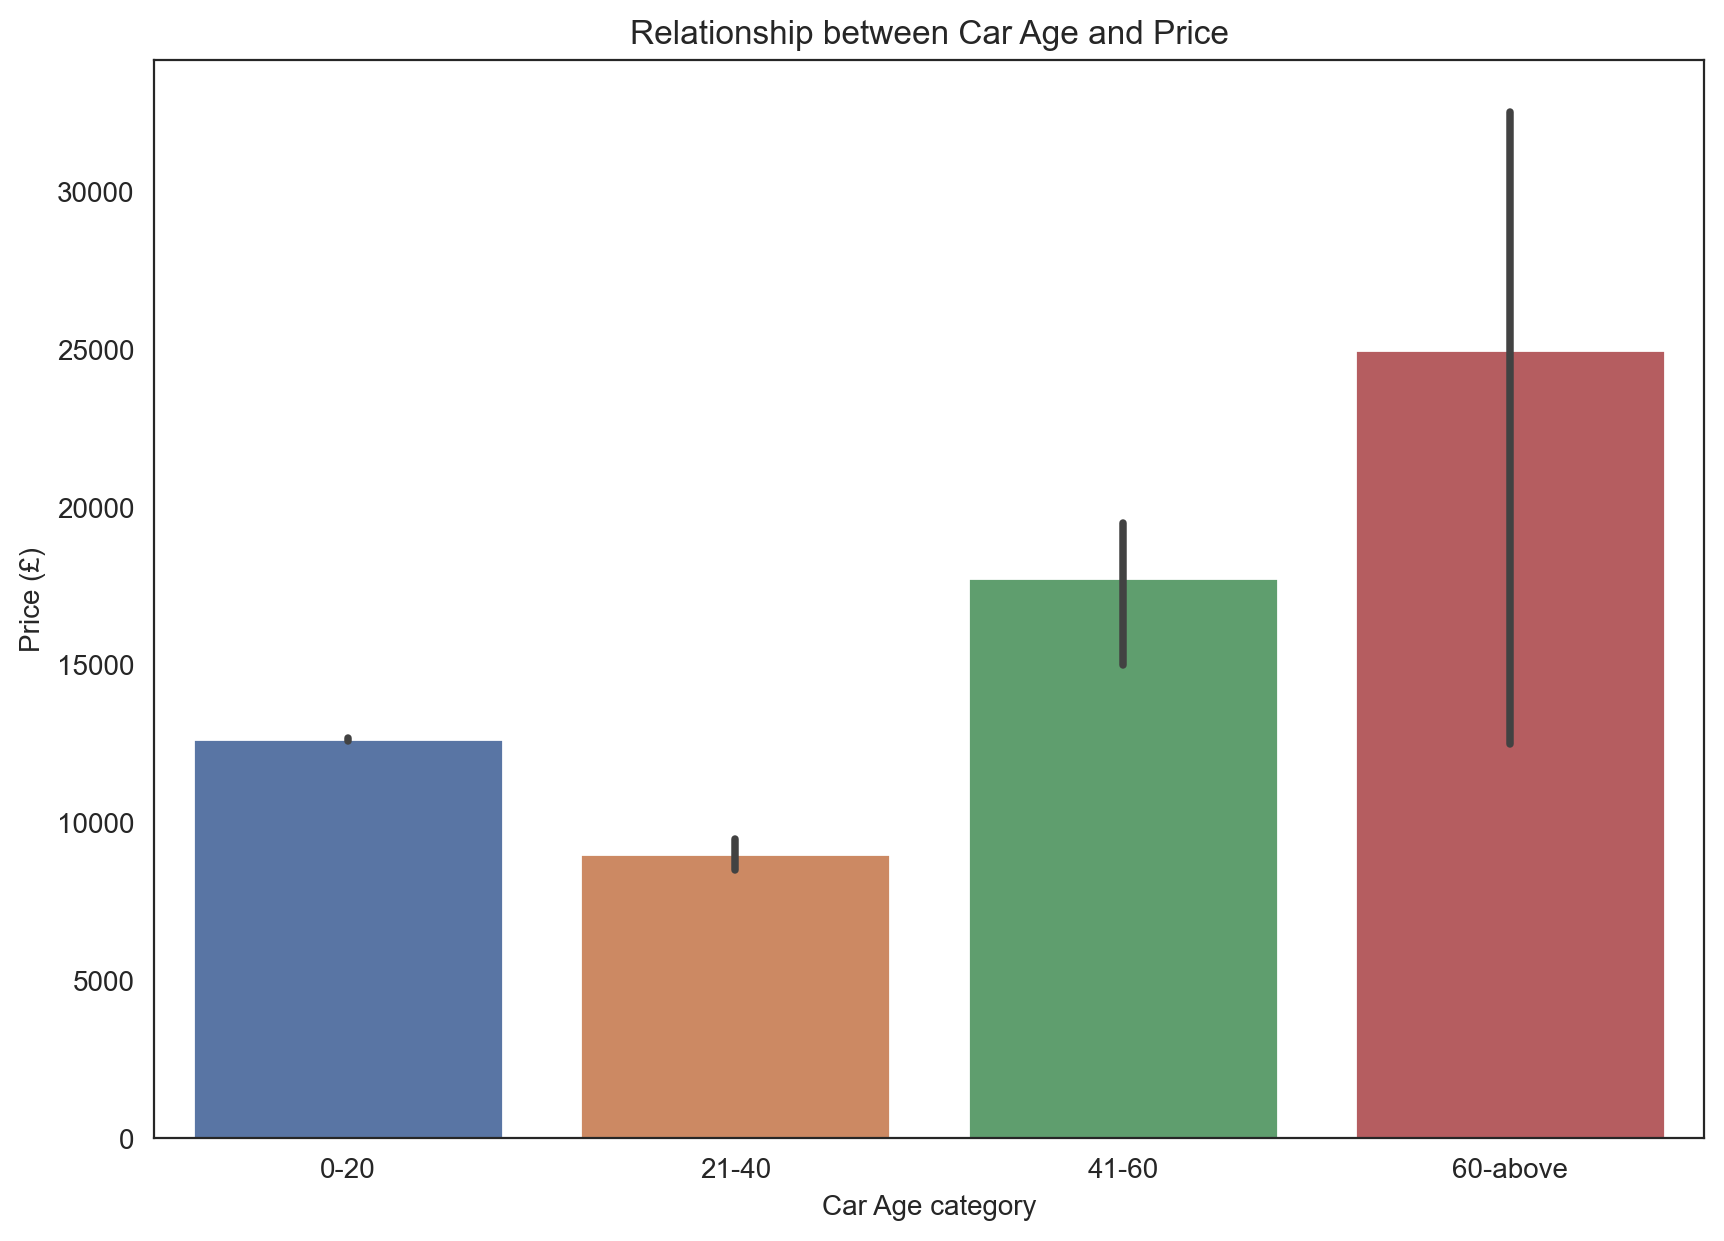

In [40]:
sns.barplot(x=categories, y= df['price'], estimator='median')
plt.xlabel('Car Age category')
plt.ylabel('Price (£)')
plt.title('Relationship between Car Age and Price')
plt.show()

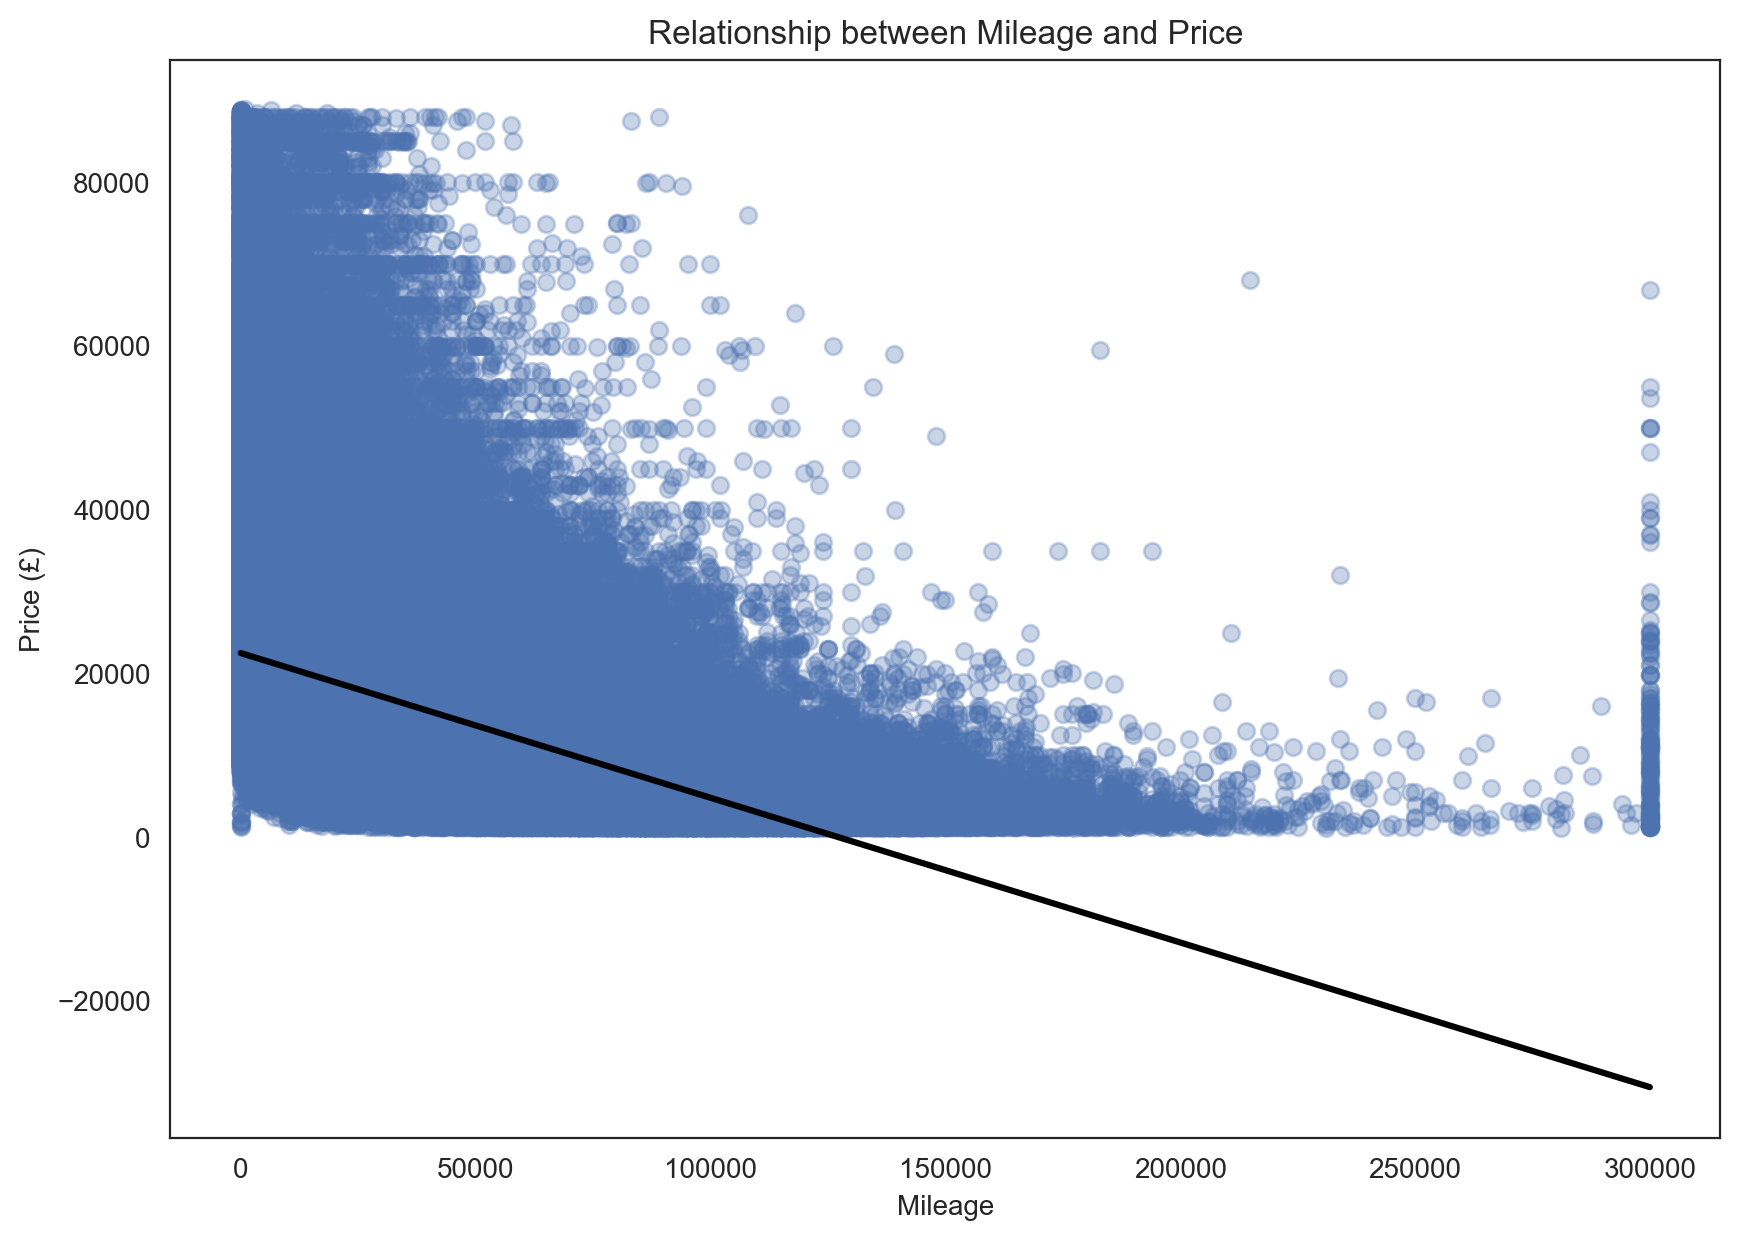

In [41]:
#relationship between price and milage
fig, ax =plt.subplots()
sns.regplot( x=df['mileage'], y=df['price'],scatter_kws=dict(alpha=0.3),line_kws={"color": "black"}, order =1)
plt.xlabel('Mileage')
plt.ylabel('Price (£)')
plt.title('Relationship between Mileage and Price')
plt.savefig('Relationship between Mileage and Price.png')
plt.show()




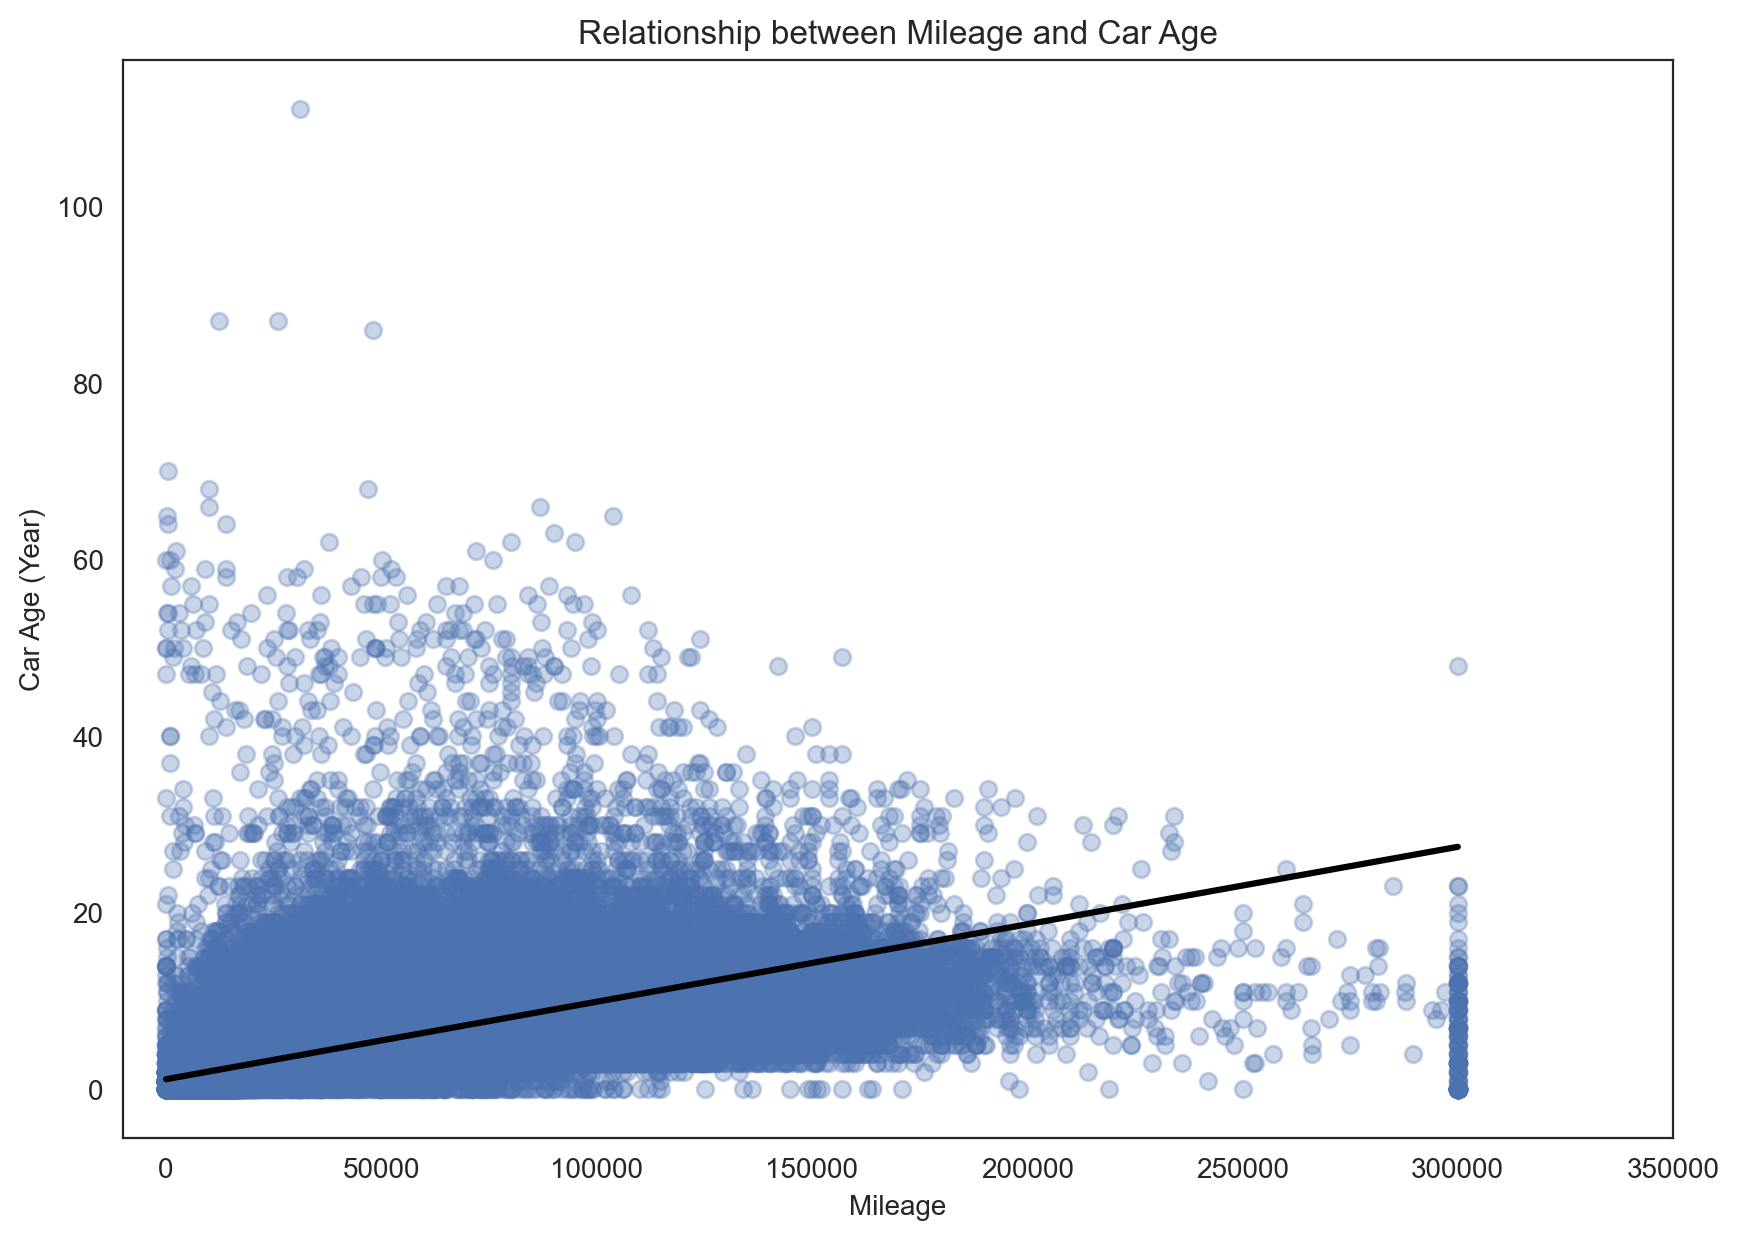

In [42]:
#relationship between price and milage
g =sns.regplot( data=df, x='mileage', y='car_age',scatter_kws=dict(alpha=0.3),line_kws={"color": "black"},)
plt.xlabel('Mileage')
plt.ylabel('Car Age (Year)')
plt.title('Relationship between Mileage and Car Age')
plt.xlim(-10000,350000)
plt.savefig('Relationship between Mileage and Price.png')
plt.show()

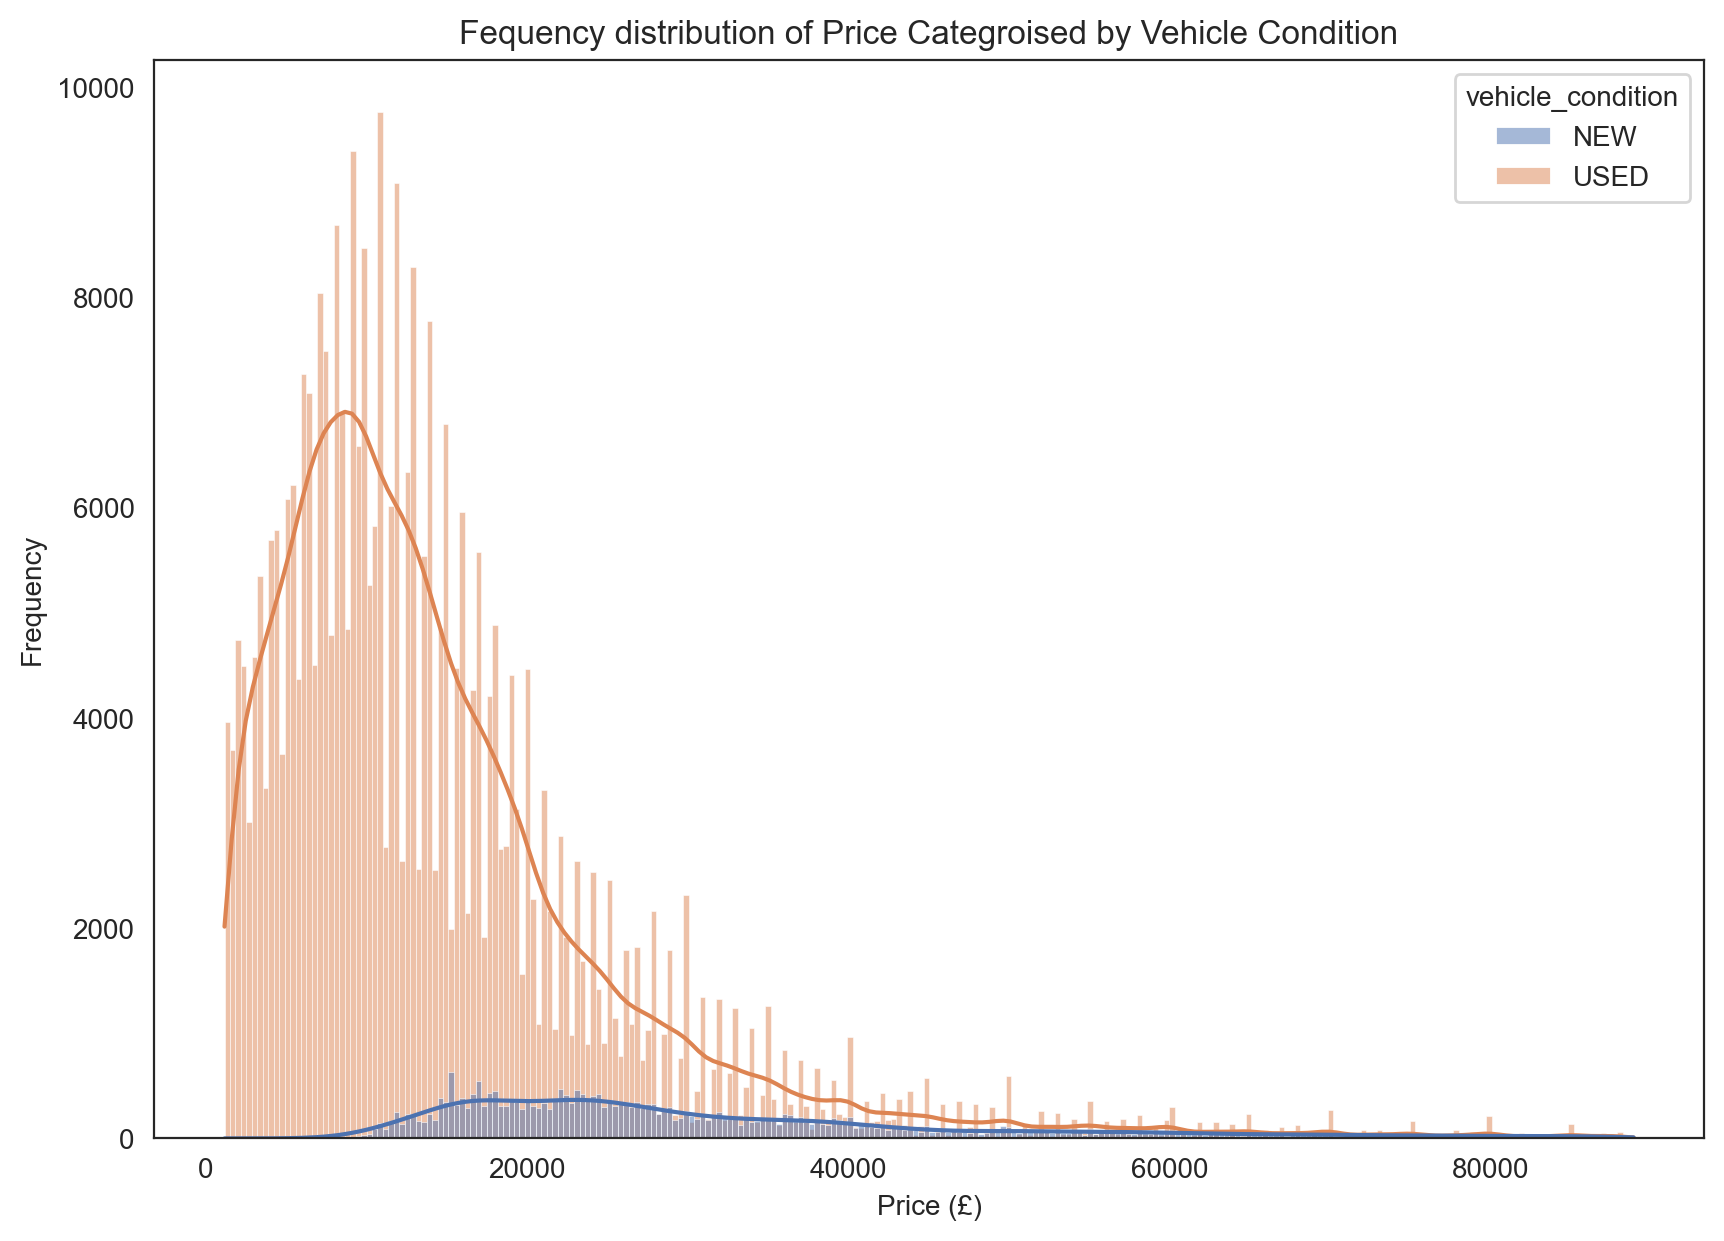

In [43]:
sns.histplot(data=df, x='price', hue='vehicle_condition',kde=True)
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.title('Fequency distribution of Price Categroised by Vehicle Condition')
plt.savefig('Relationship between Mileage and Price.png')
plt.show()

<Axes: xlabel='standard_colour', ylabel='price'>

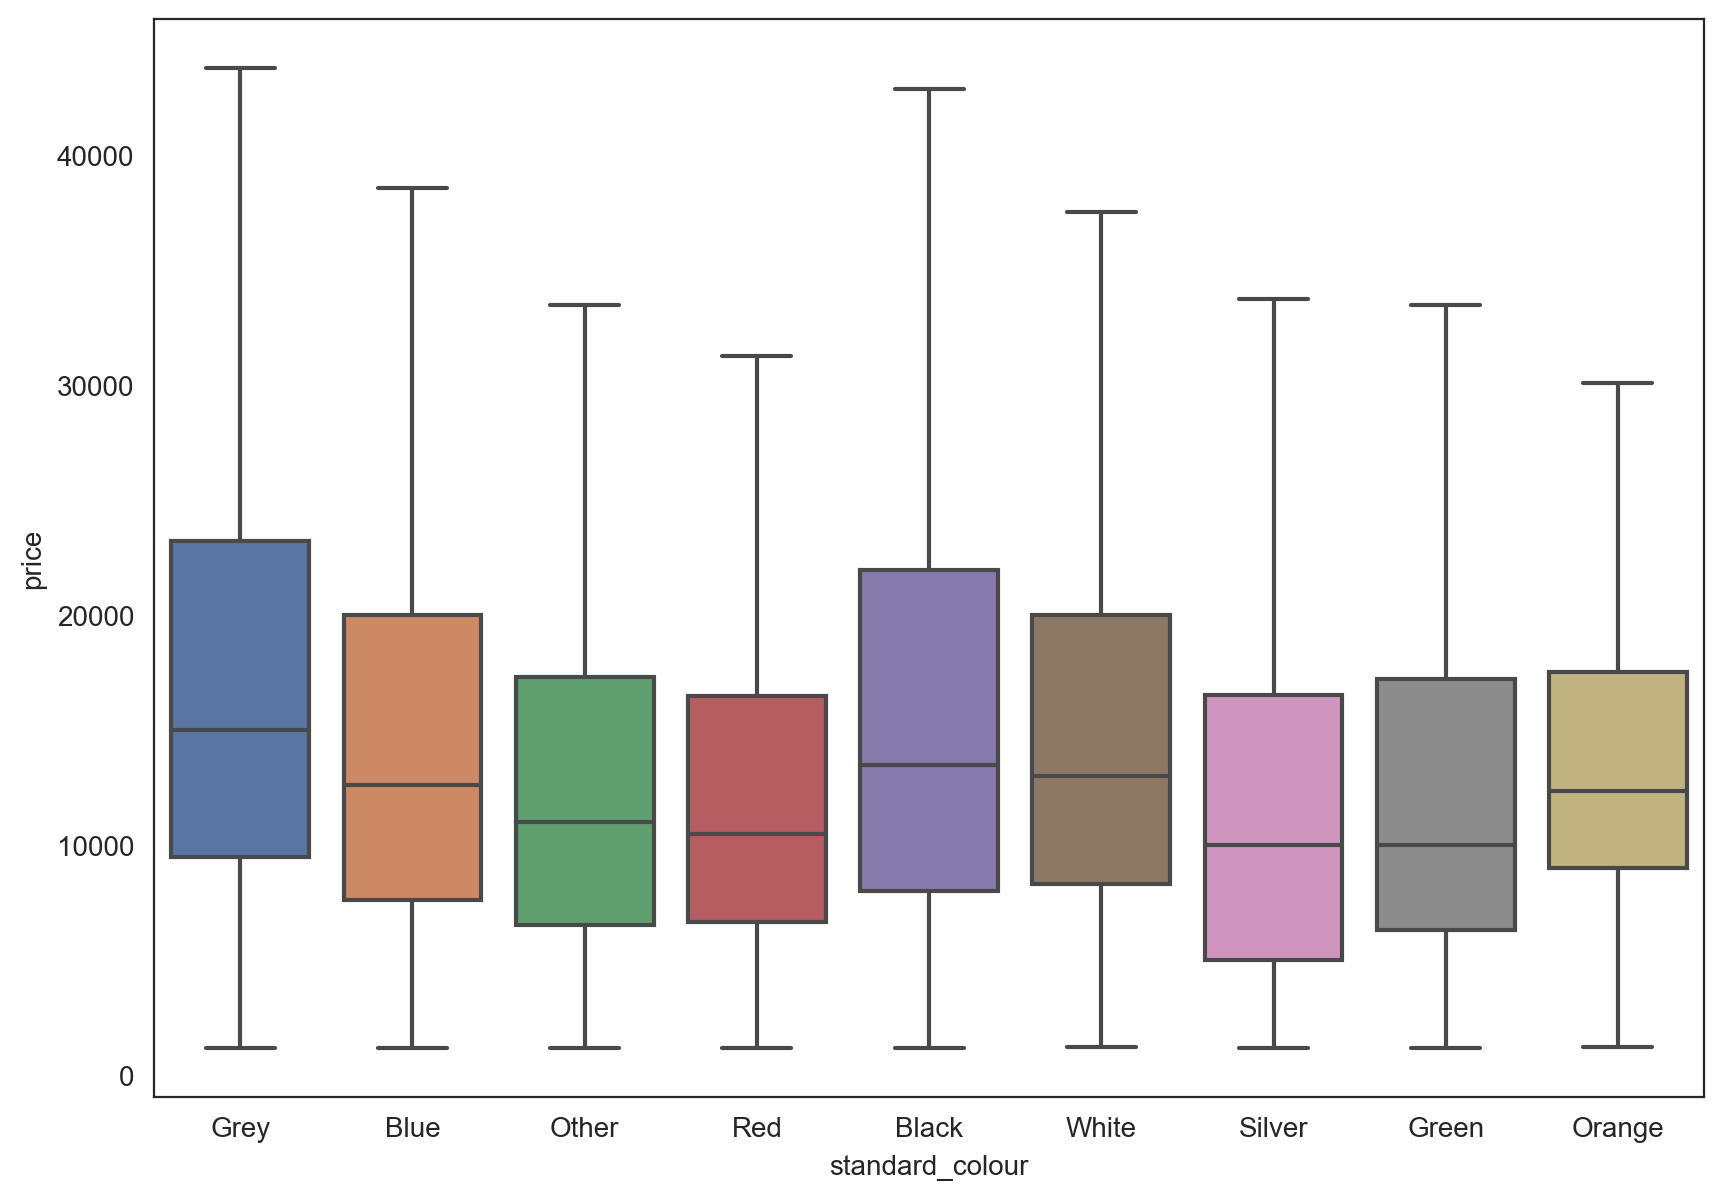

In [44]:
sns.boxplot(data=df, x='standard_colour', y='price', sym='')

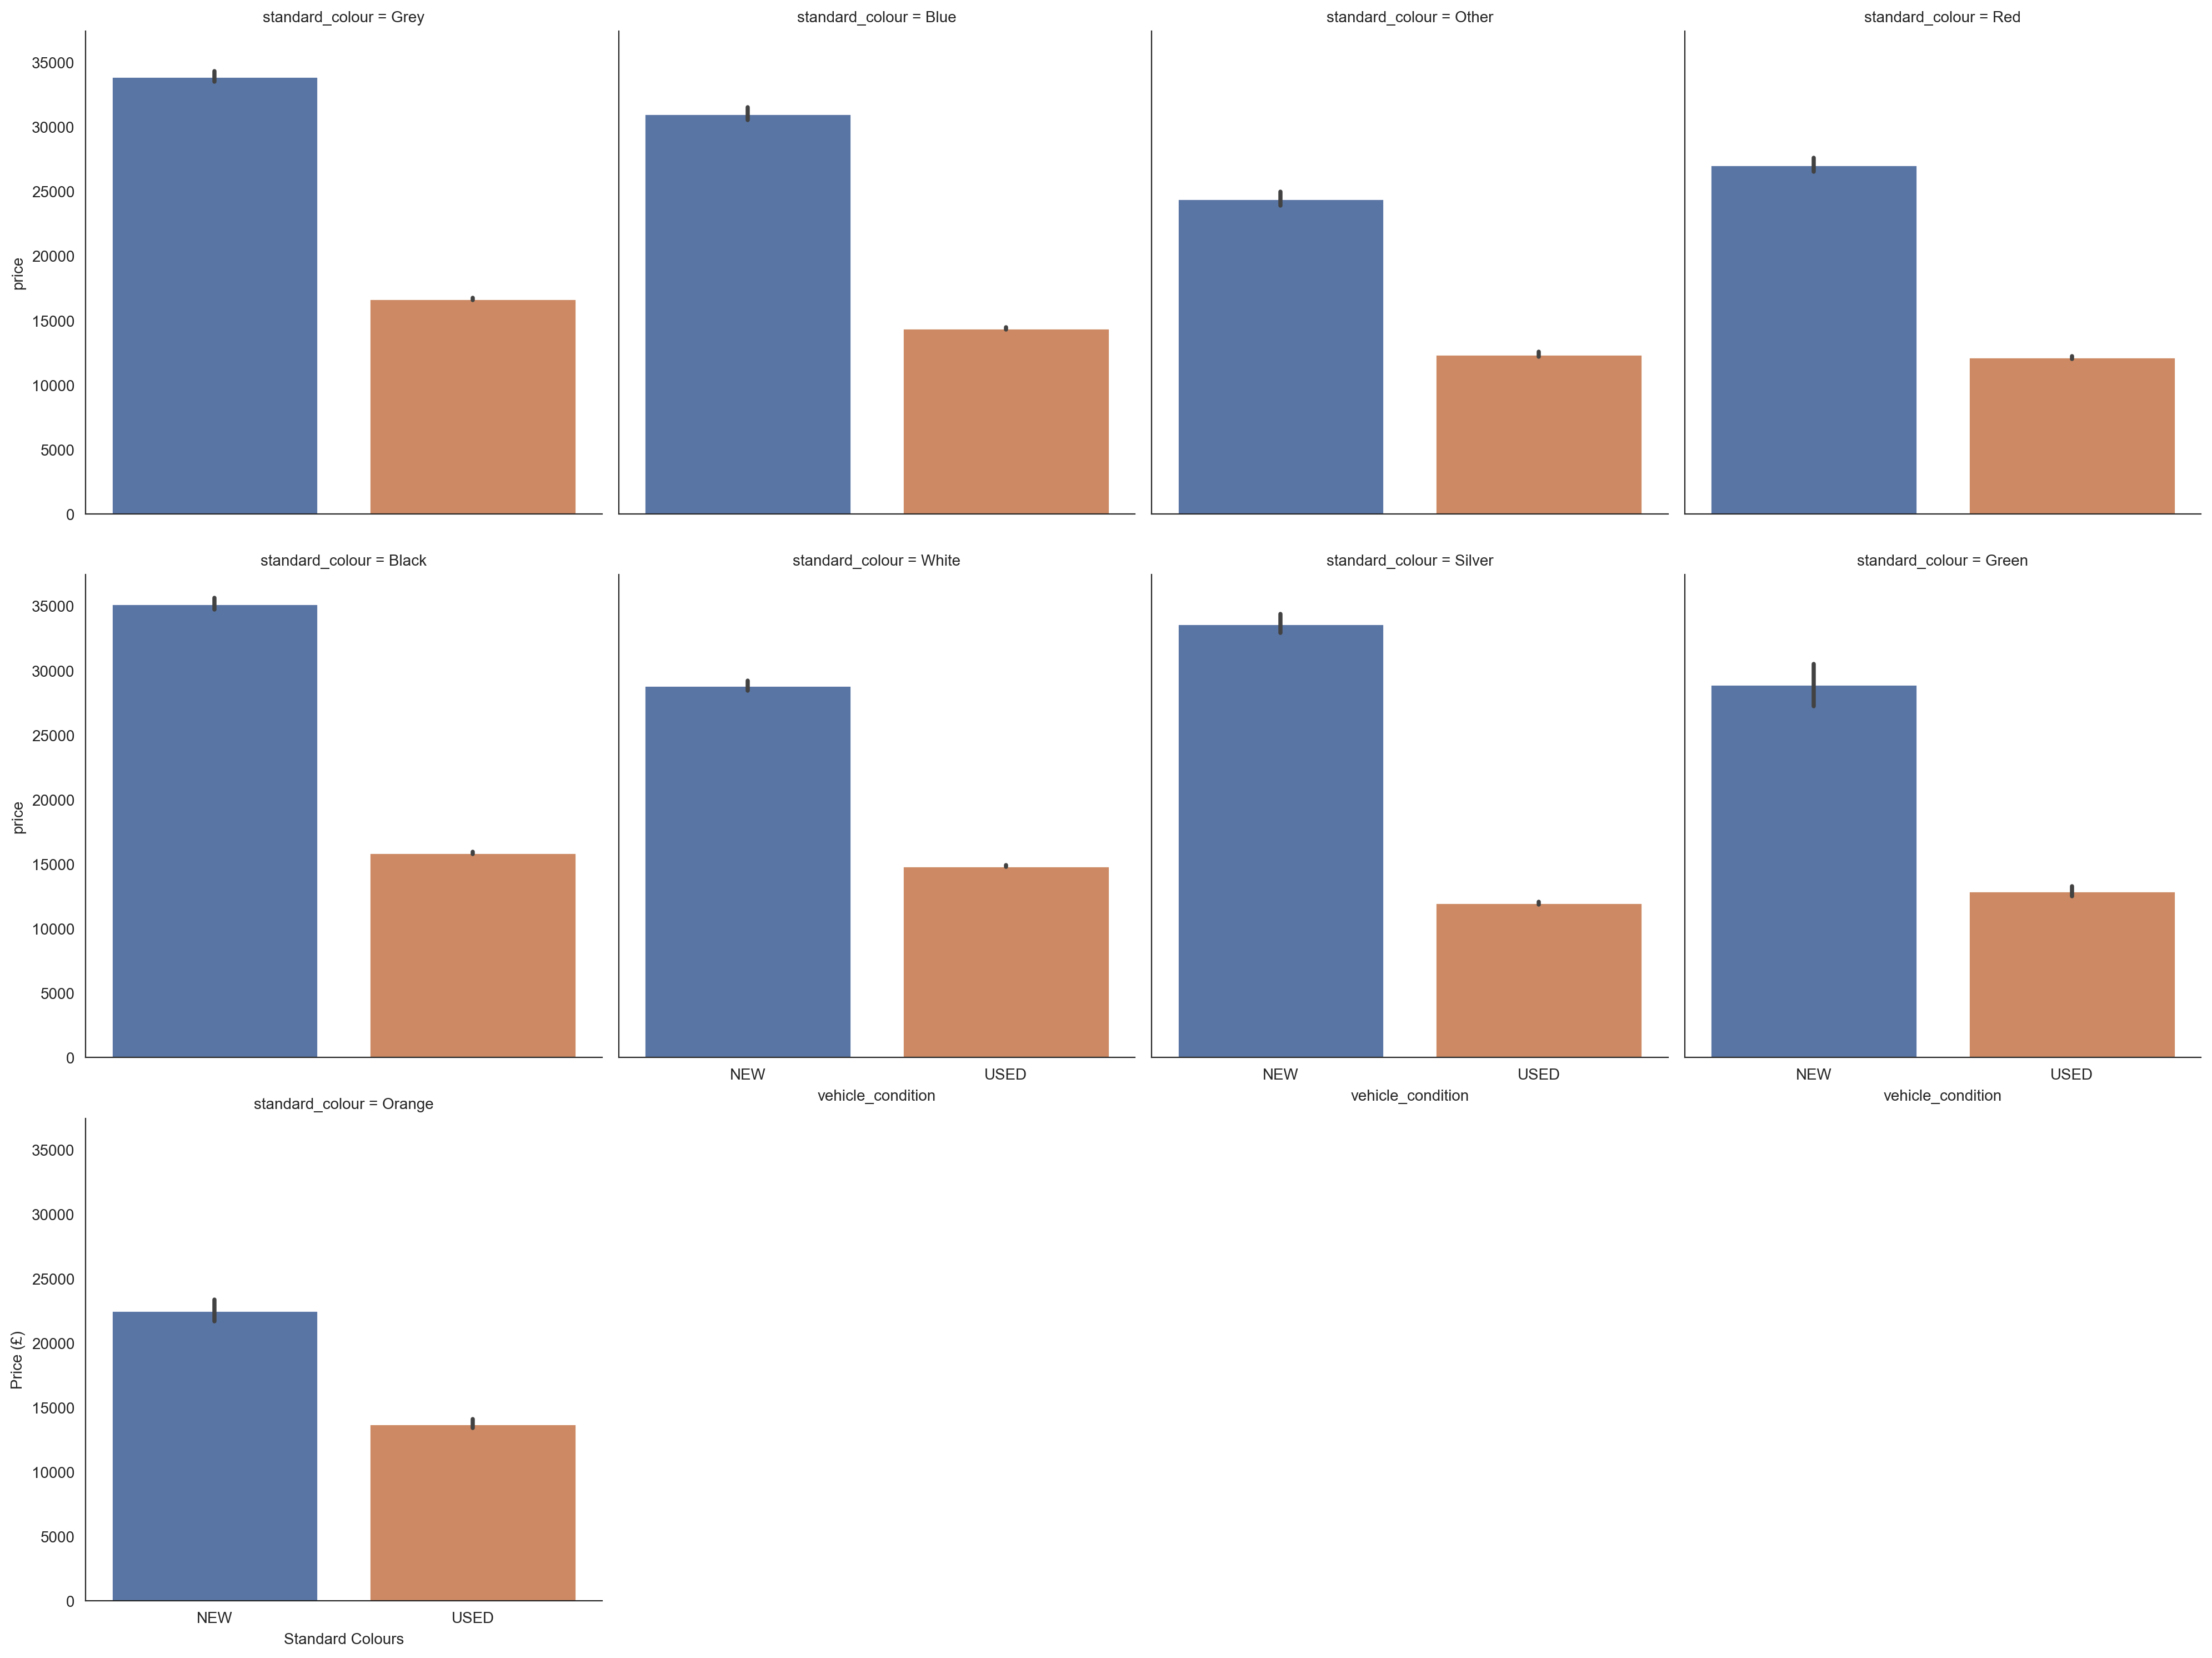

In [45]:
#relationship betwen standard colours and price
sns.catplot(data=df, x='vehicle_condition', y='price',col='standard_colour',col_wrap=4,kind='bar')
plt.xlabel('Standard Colours')
plt.ylabel('Price (£)')
plt.savefig('Colour and price.png')
plt.show()

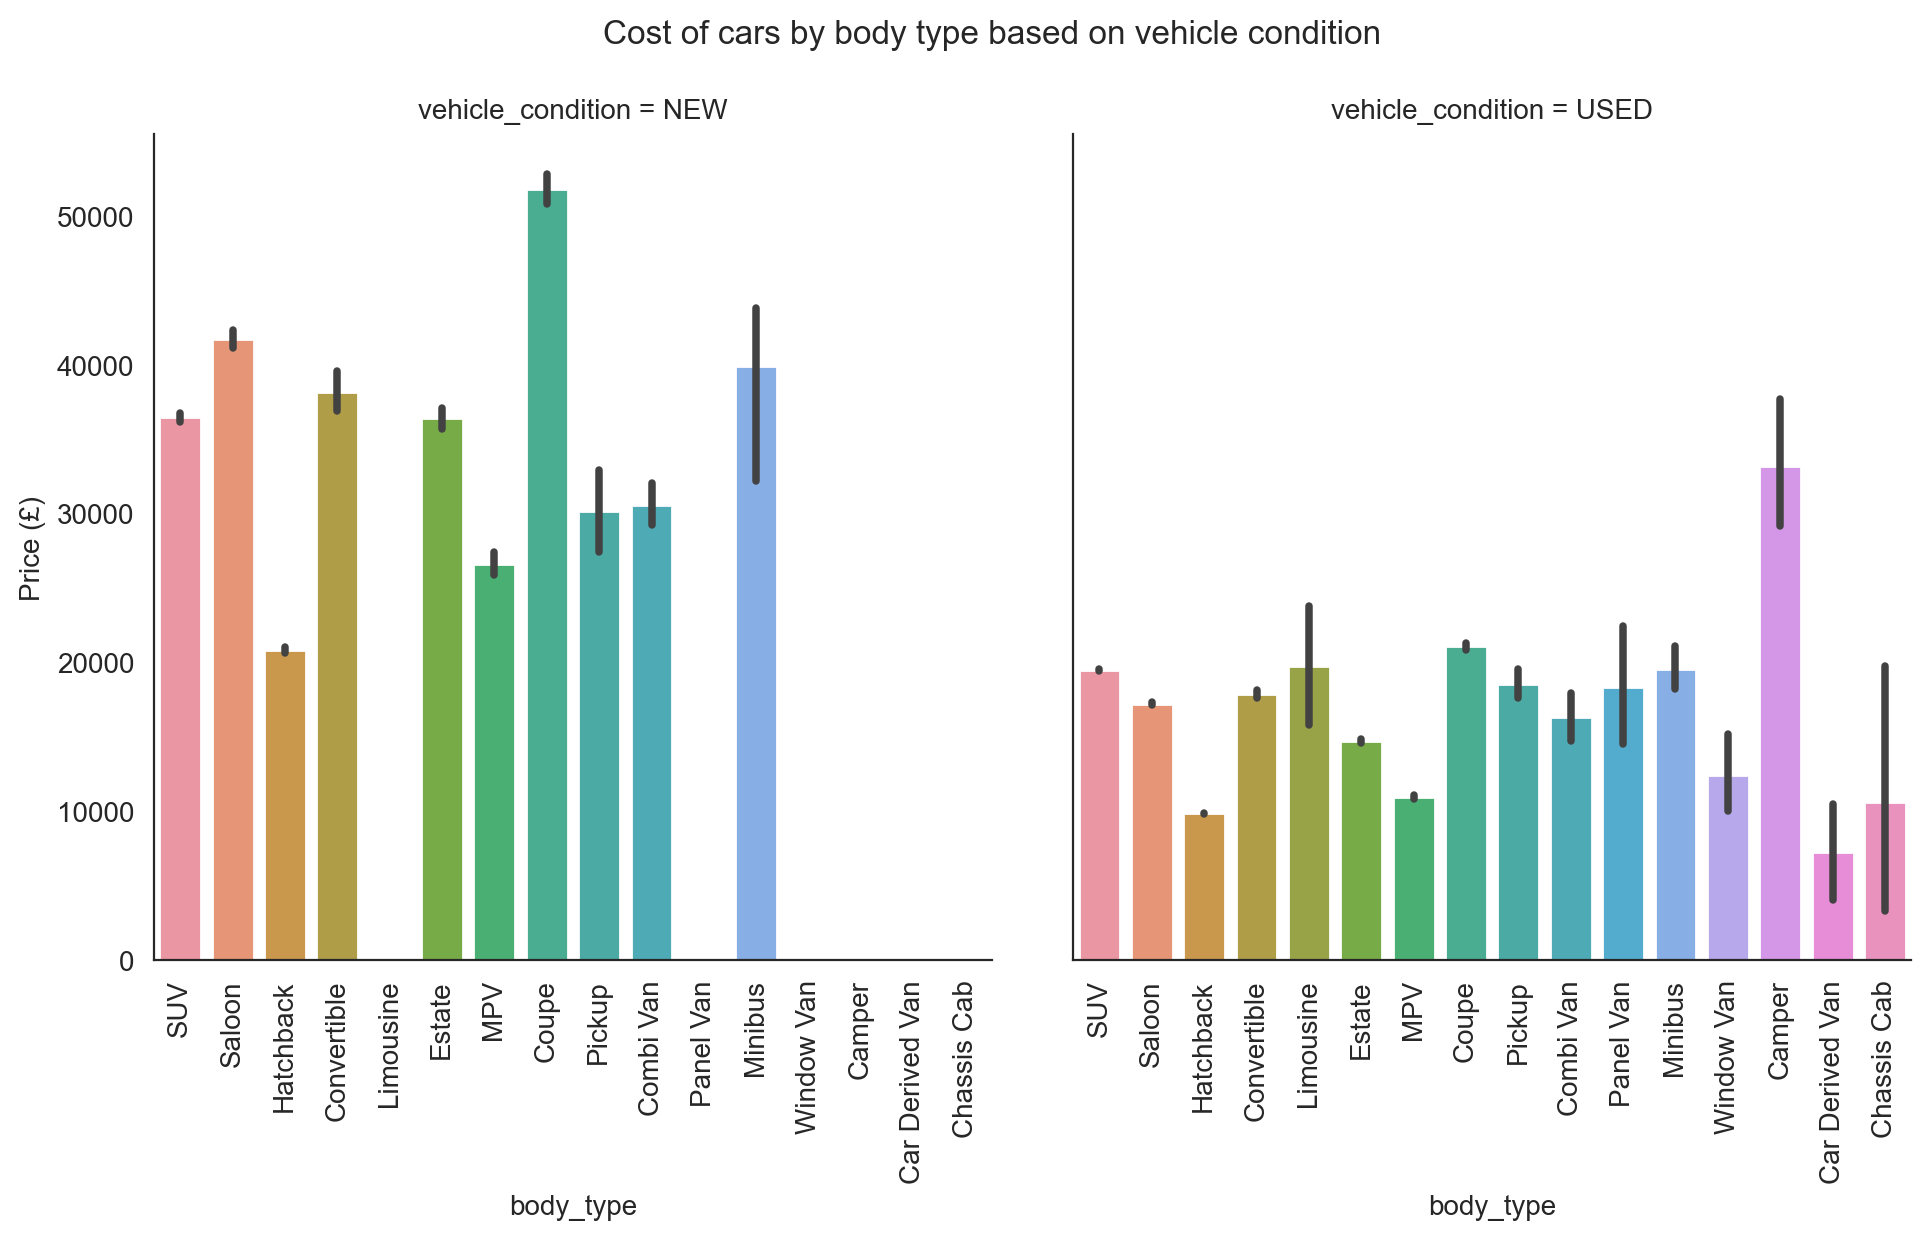

In [46]:
g= sns.catplot(data=df, x='body_type', y='price', col ='vehicle_condition', estimator= np.mean, kind='bar')
g.fig.suptitle("Cost of cars by body type based on vehicle condition", y=1.05)
g.set(ylabel= 'Price (£)')
g.set_xticklabels(rotation =90)
plt.savefig('Average car price by body type and vehicle condition')
plt.show()

In [47]:
#visualize pearson correlation coefficient for categorical variable
categorical = []
numerical=[]
for col in df.columns:
    if df[col].dtype =='object':
        categorical.append(col)
    else:
        numerical.append(col)

In [48]:
#instatiate the model
advert_te = TargetEncoder()

In [49]:
## fit and transform the feature
advert_te.fit(df[categorical], df['price'])
df_cat = advert_te.transform(df[categorical])

#concat the transformewd categorical data with price
df_cat = pd.concat([df_cat,df[numerical]], axis=1)

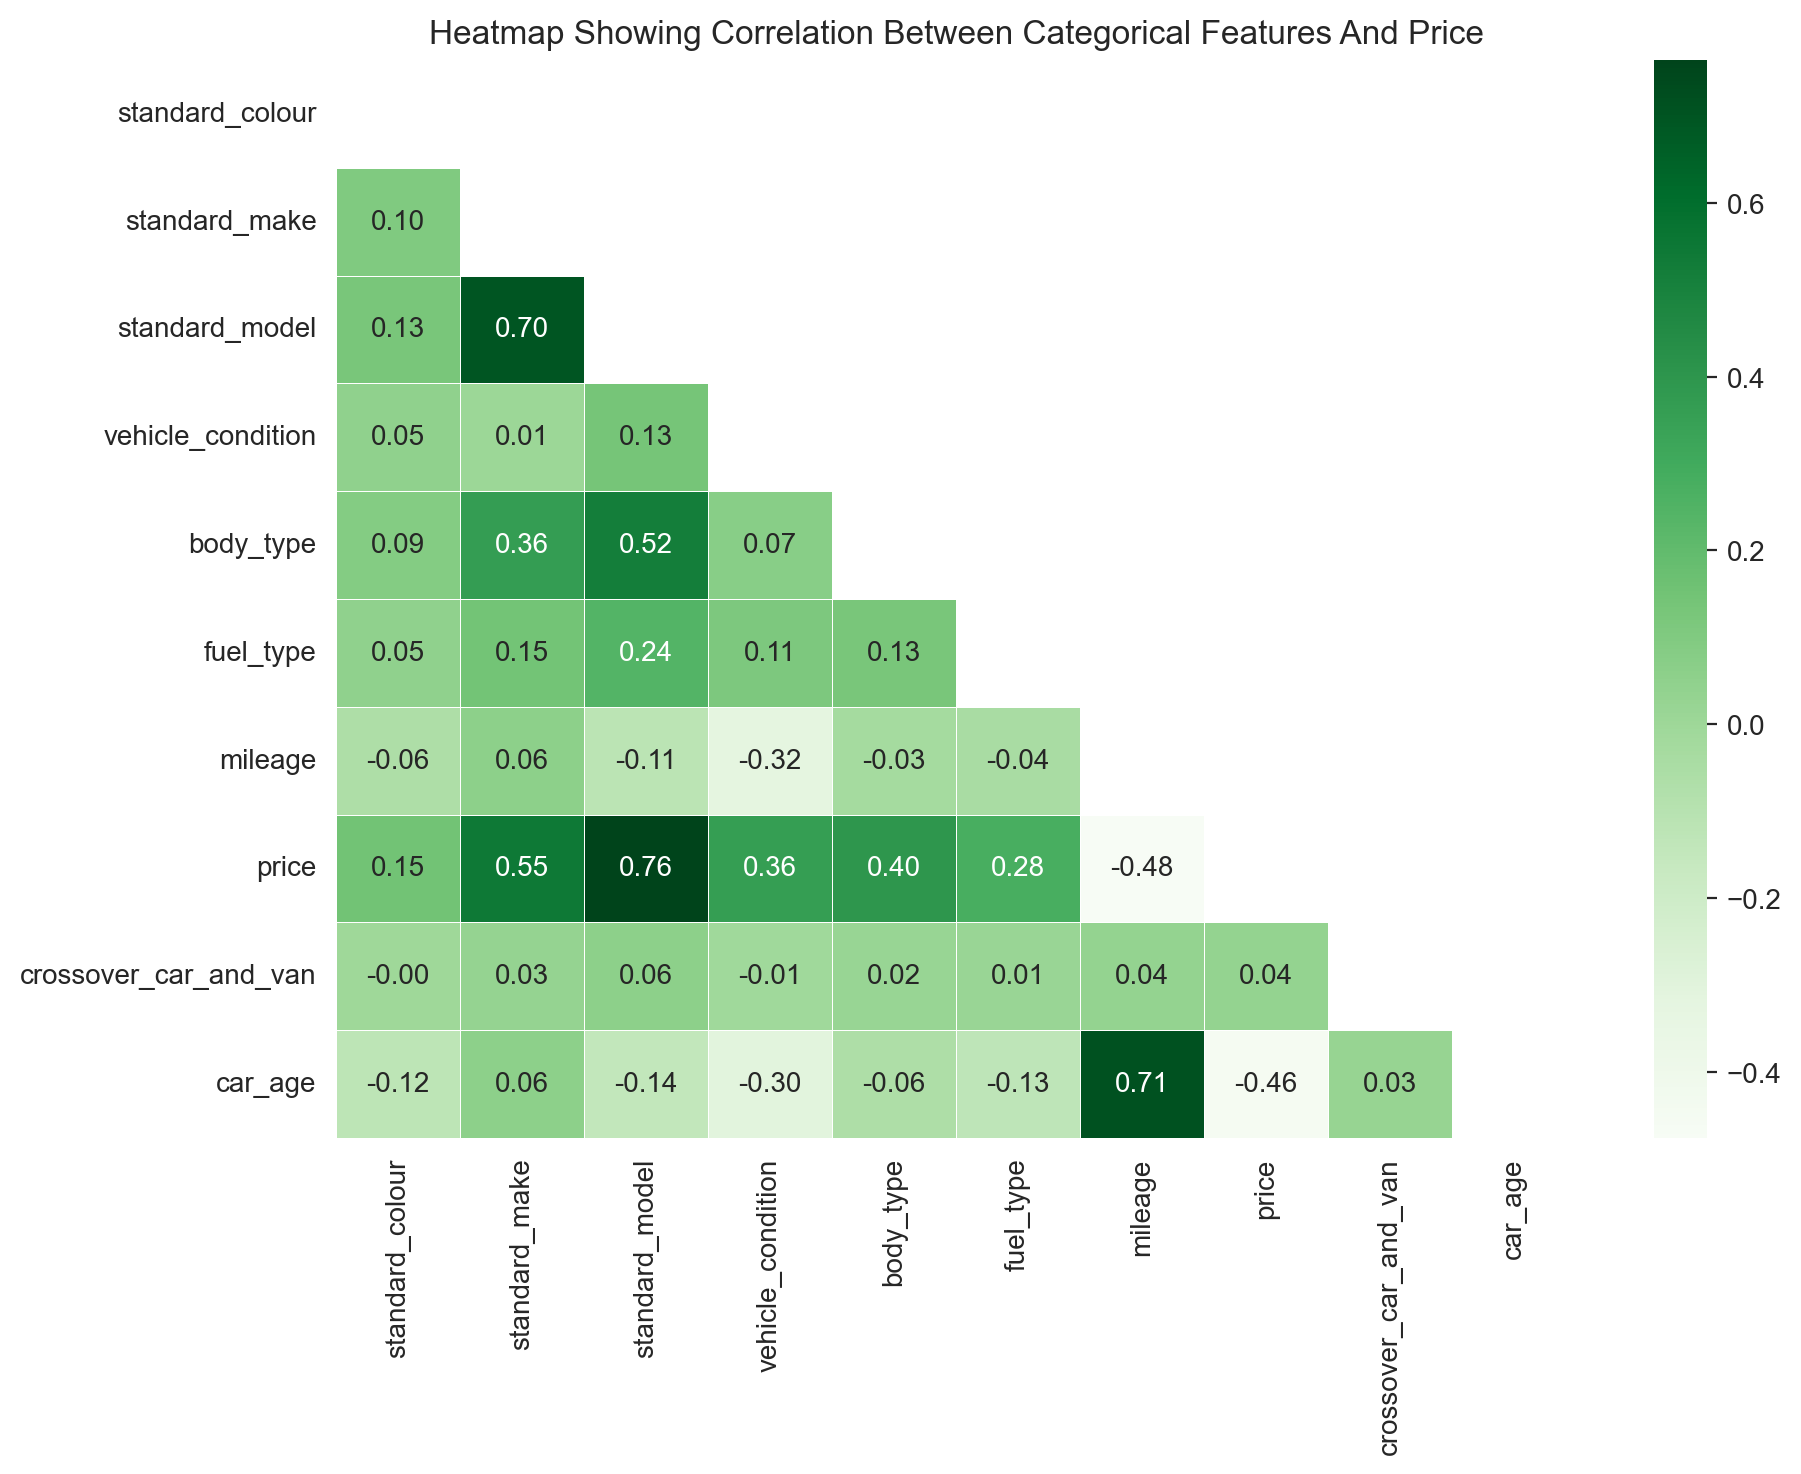

In [50]:
## sns plot pearson's correlation 
mask = np.triu(np.ones_like(df_cat.corr()))
sns.heatmap(df_cat.corr(), fmt='.2f',mask =mask, annot=True, cmap='Greens',linewidth=0.2)
plt.title('Heatmap Showing Correlation Between Categorical Features And Price')
plt.savefig('heatmap categorical.png')
plt.show()

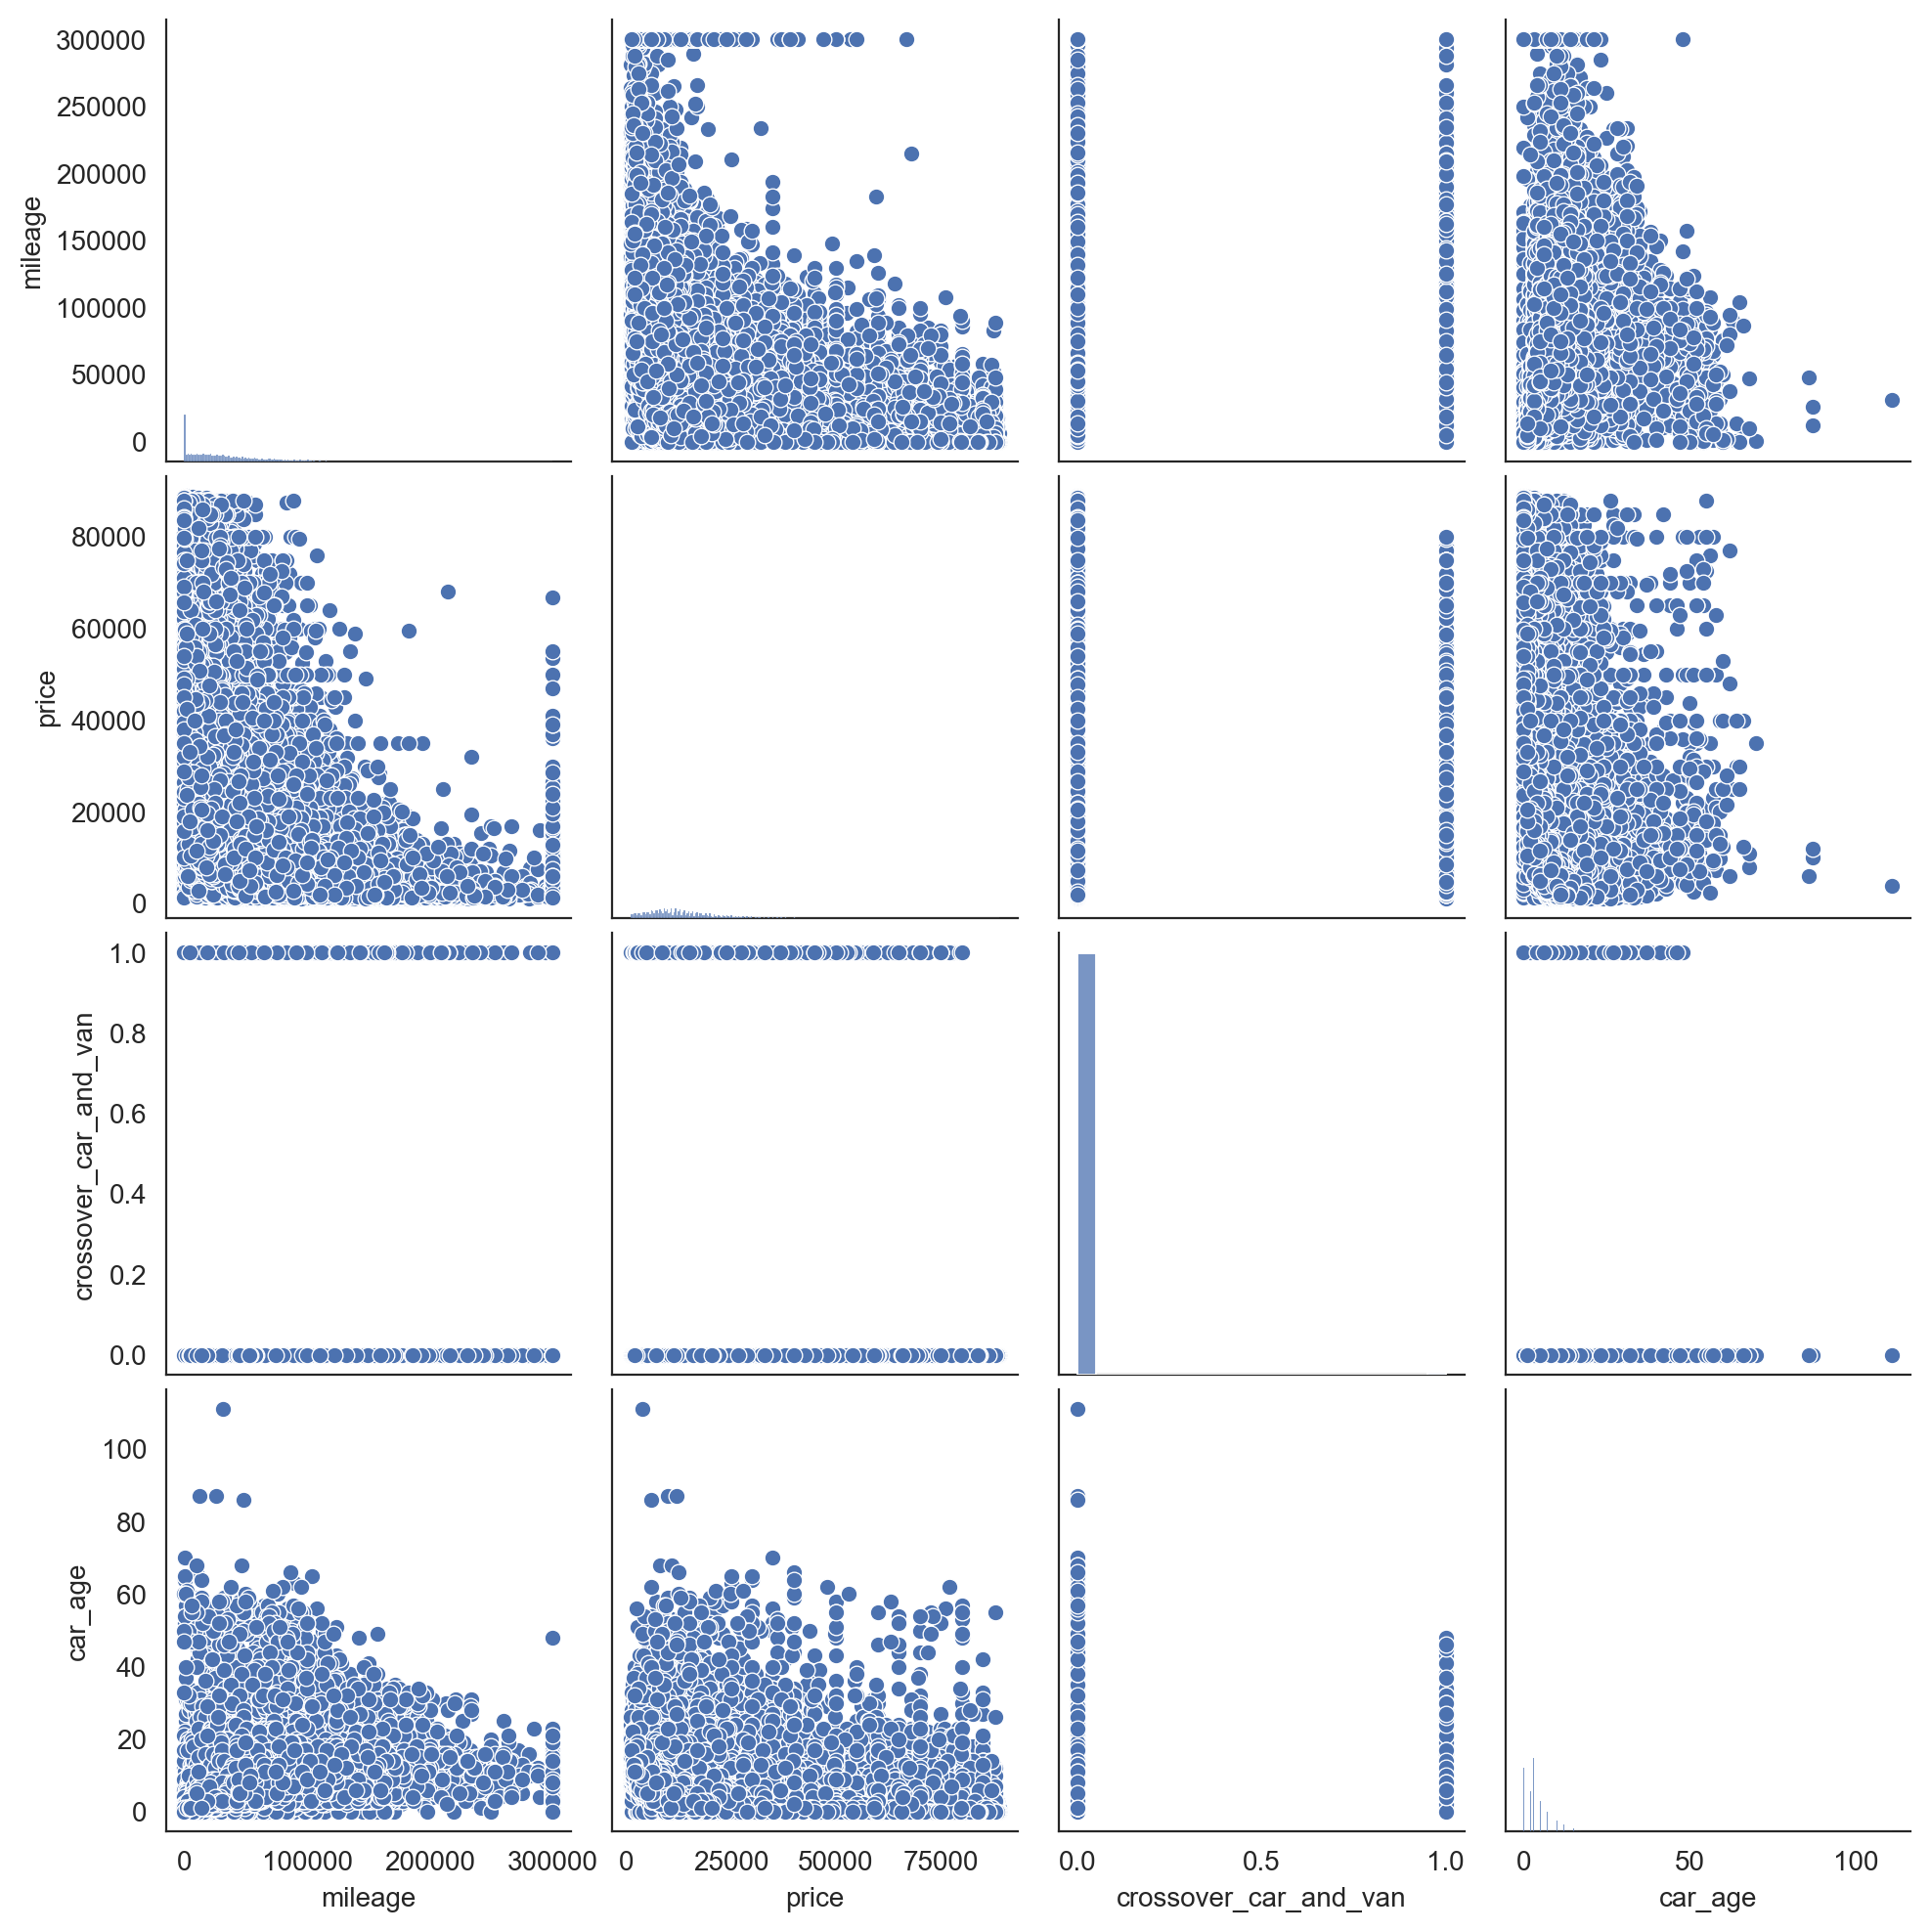

In [51]:
sns.pairplot(df)

### ML PREPROCESSING

In [52]:
df_pp = df[['mileage', 'standard_make', 'standard_model',
       'vehicle_condition', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type', 'car_age']]

In [53]:
df_pp.columns

Index(['mileage', 'standard_make', 'standard_model', 'vehicle_condition',
       'price', 'body_type', 'crossover_car_and_van', 'fuel_type', 'car_age'],
      dtype='object')

In [54]:
##split te data set into independent features and target features
X = df_pp.drop(['price'],axis=1)
y= df_pp['price']

###split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=36)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(315121, 8) (78781, 8) (315121,) (78781,)


In [55]:
### transform the columns 
num_feat= X.select_dtypes(exclude='object').columns.tolist()
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler()),
    ]
).set_output(transform='pandas')
print(num_feat)
numeric_transformer

['mileage', 'crossover_car_and_van', 'car_age']


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

In [56]:
### transform the columns 
num_feat= X.select_dtypes(exclude='object').columns.tolist()
numeric_transformer_poly = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler()),
        ('poly', PolynomialFeatures(degree =2, include_bias=False)),
    ]
).set_output(transform='pandas')
print(num_feat)
numeric_transformer_poly

['mileage', 'crossover_car_and_van', 'car_age']


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()),
                ('poly', PolynomialFeatures(include_bias=False))])

In [57]:
cat_feat = X.select_dtypes(include='object').columns.tolist()
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("te", TargetEncoder(cols=cat_feat)),
    ]
).set_output(transform='pandas')
print(cat_feat)
categorical_transformer

['standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('te',
                 TargetEncoder(cols=['standard_make', 'standard_model',
                                     'vehicle_condition', 'body_type',
                                     'fuel_type']))])

In [58]:
#combine both pipeline using column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_feat),
        ("cat", categorical_transformer, cat_feat),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['mileage', 'crossover_car_and_van',
                                  'car_age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('te',
                                                  TargetEncoder(cols=['standard_make',
                                                                      'standard_model',
                                                                      'vehicle_condition',
                                                                      'body_type',
                                                                      'fuel_type']))]),
                                 ['standard_make', 'standard_model',
                                  'vehicle_condition', 'body_type',
                                  'fuel_type'])],
                  verbose_feature_names_out=False)

In [59]:
#combine both pipeline using column transformer
preprocessor_poly = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_poly, num_feat),
        ("cat", categorical_transformer, cat_feat),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')
preprocessor_poly

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['mileage', 'crossover_car_and_van',
                                  'car_age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('te',
                                                  TargetEncoder(cols=['standard_make',
                                                                      'standard_model',
                                                                      'vehicle_condition',
                                                                      'body_type',
                                                                      'fuel_type']))]),
                                 ['standard_make', 'standard_model',
                                  'vehicle_condition', 'body_type',
                                  'fuel_type'])],
                  verbose_feature_names_out=False)

### Polynomial Features

In [60]:
X_train_car = pd.DataFrame(X_train['car_age'], columns =['car_age'])
X_test_car = pd.DataFrame(X_test['car_age'], columns =['car_age'])

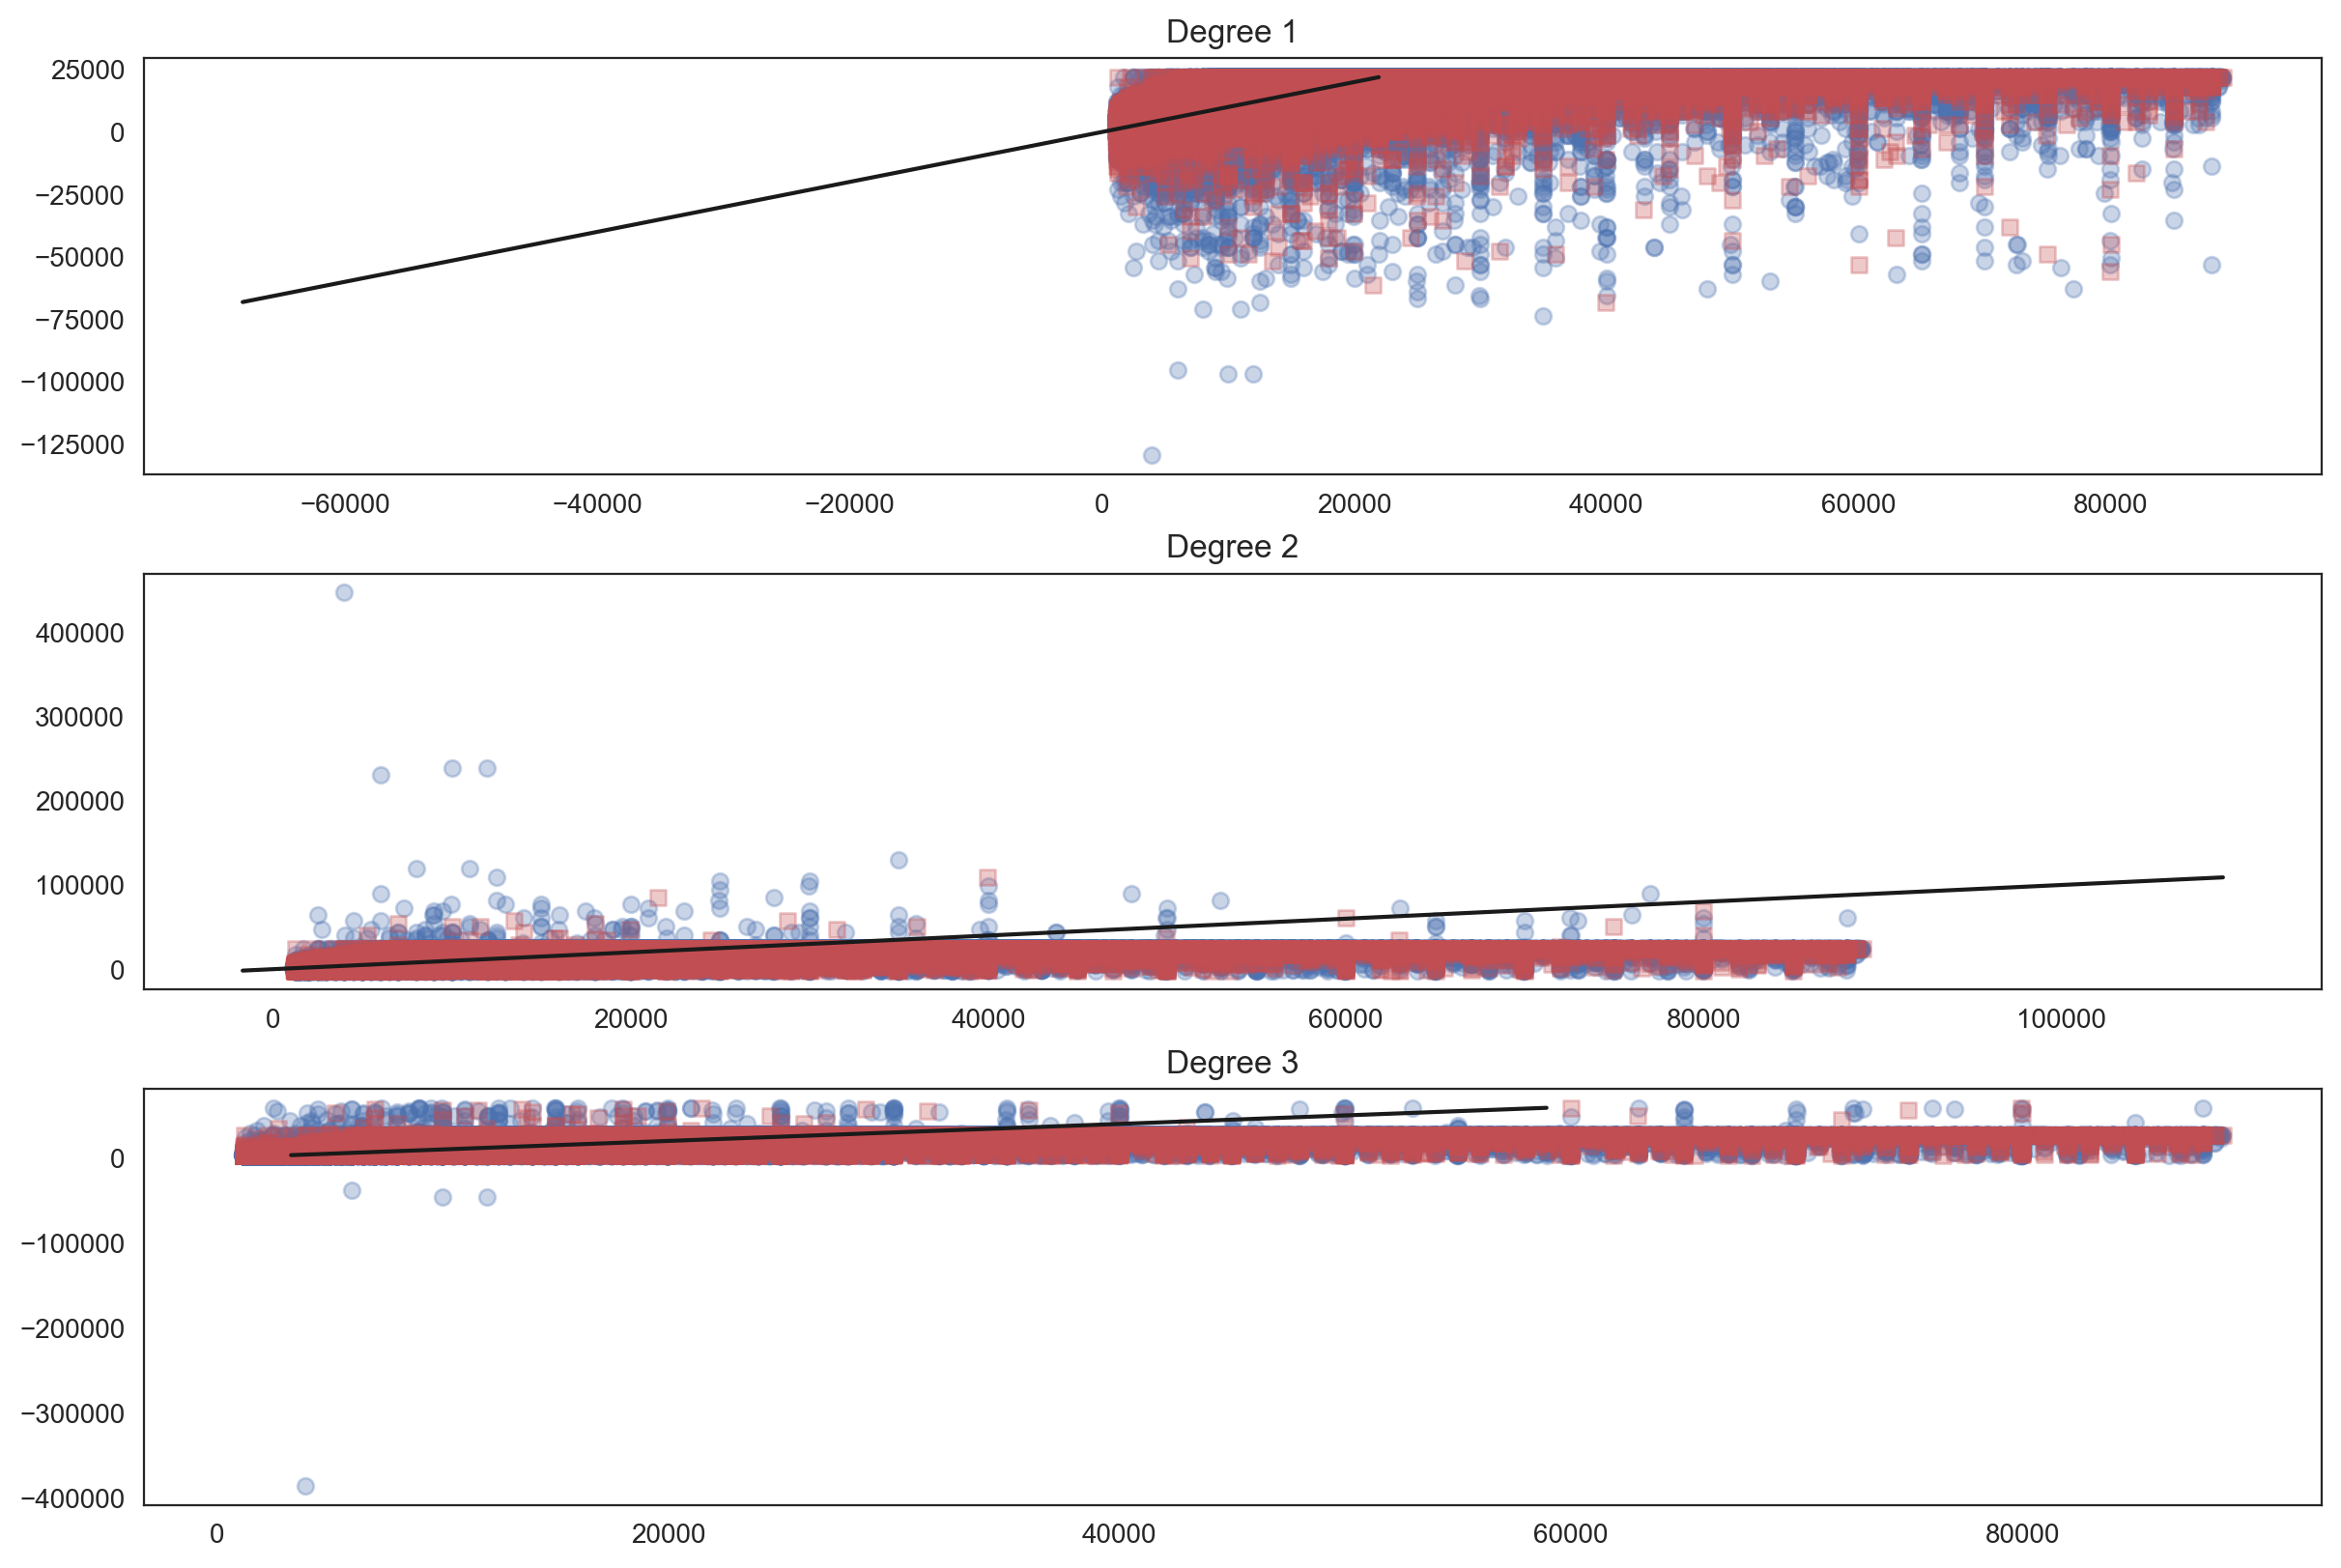

In [61]:
orders = [1,2,3]
fig, axs = plt.subplots(3, figsize=(12,8), constrained_layout=True)
lr_models = [ ]
for ax, order in zip(axs.ravel(), orders):
    model = make_pipeline(
        PolynomialFeatures(degree=order, include_bias=False),
        LinearRegression()
    )
    lr_models.append(
        model.fit(X_train_car, y_train)
    )
    y_pred = model.predict(X_test_car)
    y_pred_train =model.predict(X_train_car)
    
    ax.scatter(y_train, y_pred_train, alpha=0.3, marker='o', c='b')
    ax.scatter(y_test, y_pred, alpha=0.3, marker='s', c='r')
    ax.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='k')
    ax.set_title(f'Degree {order}')

In [62]:
poly_df = preprocessor_poly.fit_transform(X_train,y_train).head()
poly_df.columns

Index(['mileage', 'crossover_car_and_van', 'car_age', 'mileage^2',
       'mileage crossover_car_and_van', 'mileage car_age',
       'crossover_car_and_van^2', 'crossover_car_and_van car_age', 'car_age^2',
       'standard_make', 'standard_model', 'vehicle_condition', 'body_type',
       'fuel_type'],
      dtype='object')

In [63]:
poly_df.head()

mileage  crossover_car_and_van   car_age     mileage^2  \
361495  0.323167                    0.0  0.099099  1.044367e-01   
348576  0.000033                    0.0  0.000000  1.111111e-09   
248862  0.118877                    0.0  0.036036  1.413166e-02   
131021  0.000033                    0.0  0.000000  1.111111e-09   
206317  0.000000                    0.0  0.000000  0.000000e+00   

        mileage crossover_car_and_van  mileage car_age  \
361495                            0.0         0.032026   
348576                            0.0         0.000000   
248862                            0.0         0.004284   
131021                            0.0         0.000000   
206317                            0.0         0.000000   

        crossover_car_and_van^2  crossover_car_and_van car_age  car_age^2  \
361495                      0.0                            0.0   0.009821   
348576                      0.0                            0.0   0.000000   
248862                      0.0                            0.0   0.001299   
131021                      0.0                            0.0   0.000000   
206317                      0.0                            0.0   0.000000   

        standard_make  standard_model  vehicle_condition     body_type  \
361495   19606.193327    32623.051195       14569.132114  18492.611840   
348576   25160.452135    29105.657854       31524.971908  21672.216901   
248862   19606.193327    15472.187294       14569.132114  18492.611840   
131021   11735.901442    15606.643585       31524.971908  21672.216901   
206317   20312.915814    33081.744108       31524.971908  18492.611840   

           fuel_type  
361495  14216.594291  
348576  33211.268502  
248862  16426.791090  
131021  14216.594291  
206317  14216.594291

### Feature Selector

In [64]:
## def function for evaluation
def evaluation (y, prediction):
    r2_value = r2_score(y,prediction)
    mae = mean_absolute_error(y,prediction)
    print(f"R2 score : {r2_value:.3f} | MAE score : {mae:.3f}")

#### Regression Without Polyonomial

In [65]:
### test the performance of the features with all features
regr_1 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regr", LinearRegression())
    ]
)

In [66]:
regr_1.fit(X_train, y_train)

train_pred = regr_1.predict(X_train)
test_pred = regr_1.predict(X_test)


print("TRAIN EVALUATION")
evaluation(y_train, train_pred)
print("TEST EVALUATION")
evaluation(y_test, test_pred)

TRAIN EVALUATION
R2 score : 0.783 | MAE score : 3779.370
TEST EVALUATION
R2 score : 0.784 | MAE score : 3767.036


### Regression With Polynomial

In [67]:
### test the performance of the features with all features
regr_poly = Pipeline(
    steps=[
        ("preprocessor", preprocessor_poly),
        ("regr", LinearRegression())
    ]
)

In [68]:
regr_poly.fit(X_train, y_train)

train_pred = regr_poly.predict(X_train)
test_pred = regr_poly.predict(X_test)


print("TRAIN EVALUATION")
evaluation(y_train, train_pred)
print("TEST EVALUATION")
evaluation(y_test, test_pred)

TRAIN EVALUATION
R2 score : 0.799 | MAE score : 3674.145
TEST EVALUATION
R2 score : 0.798 | MAE score : 3675.086


In [69]:
print(len(regr_poly['preprocessor'].get_feature_names_out()))

regr_poly['preprocessor'].get_feature_names_out()
reg_features = regr_poly['preprocessor'].get_feature_names_out()

14


### Feature Selector

### RFE Linear Regression

In [70]:
regr_rfe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("featsel", RFECV(LinearRegression(), step=1, cv=5)),
        ("regr", LinearRegression())
    ]
).set_output(transform='pandas')

In [71]:
regr_rfe.fit(X_train, y_train)

train_pred = regr_rfe.predict(X_train)
test_pred = regr_rfe.predict(X_test)


print("TRAIN EVALUATION")
evaluation(y_train, train_pred)
print("TEST EVALUATION")
evaluation(y_test, test_pred)

TRAIN EVALUATION
R2 score : 0.783 | MAE score : 3779.370
TEST EVALUATION
R2 score : 0.784 | MAE score : 3767.036


In [72]:
print(len(regr_rfe['featsel'].get_feature_names_out()))
regr_rfe['featsel'].get_feature_names_out()

8


array(['mileage', 'crossover_car_and_van', 'car_age', 'standard_make',
       'standard_model', 'vehicle_condition', 'body_type', 'fuel_type'],
      dtype=object)

In [73]:
# should match the number of features
n_scores = len(regr_rfe['featsel'].cv_results_["mean_test_score"])
n_scores

8

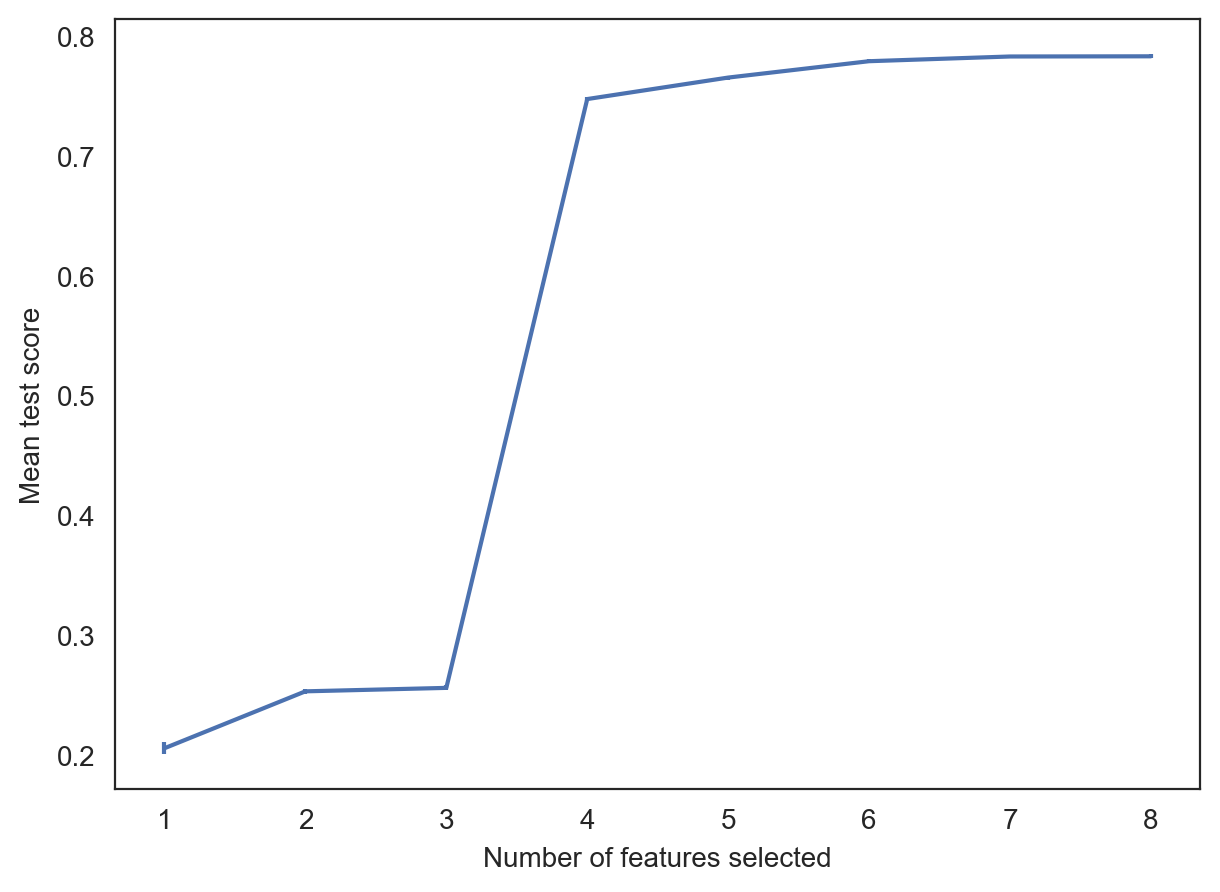

In [74]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    np.arange(1, 9),
    regr_rfe['featsel'].cv_results_["mean_test_score"],
    yerr=regr_rfe['featsel'].cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score")
plt.show()

## Model Building

I will be making use of the followinfg moels to build my algorithms;
-  Linear Regressor
-  Random Forest Regressor
-  Gradient Boosting Regressor
-  Voting Regressor

In [75]:
ml_df = df[['mileage', 'crossover_car_and_van', 'car_age', 'standard_make',
       'standard_model', 'vehicle_condition', 'body_type', 'fuel_type', 'price']]

ml_df.head()

mileage  crossover_car_and_van  car_age standard_make     standard_model  \
0       0.0                  False        0         Volvo               XC90   
1  108230.0                  False        9        Jaguar                 XF   
2    7800.0                  False        3         SKODA               Yeti   
3   45000.0                  False        4      Vauxhall              Mokka   
4   64000.0                  False        5    Land Rover  Range Rover Sport   

  vehicle_condition  body_type              fuel_type  price  
0               NEW        SUV  Petrol Plug-in Hybrid  73970  
1              USED     Saloon                 Diesel   7000  
2              USED        SUV                 Petrol  14000  
3              USED  Hatchback                 Diesel   7995  
4              USED        SUV                 Diesel  26995

In [76]:
### sample 20% of the dataset for model building and grid search
sample_df = ml_df.sample(frac=0.2, random_state=36)
sample_df.head()

mileage  crossover_car_and_van  car_age   standard_make  \
226016  18221.0                  False        4          Jaguar   
32502   10788.0                  False        1           Honda   
229295  55000.0                  False        8         Citroen   
390437  28000.0                  False        4  DS AUTOMOBILES   
89066   57000.0                  False        8         Citroen   

       standard_model vehicle_condition  body_type fuel_type  price  
226016             XE              USED     Saloon    Diesel  15990  
32502           Civic              USED  Hatchback    Petrol  18750  
229295            DS3              USED  Hatchback    Petrol   3995  
390437           DS 3              USED  Hatchback    Petrol   7495  
89066             DS3              USED  Hatchback    Petrol   4495

In [77]:
###Check whtwhwer the sample is a reflectin of the whole dataset using vehicle_condition and price
print(sample_df['vehicle_condition'].value_counts(normalize=True)*100.0)
print('--'*20)
print(sample_df['price'].mean().round(2))
print('--'*20)
print(sample_df['mileage'].mean().round(2))

vehicle_condition
USED    92.222645
NEW      7.777355
Name: proportion, dtype: float64
----------------------------------------
15849.81
----------------------------------------
37405.51


In [78]:
##split te data set into independent features and target features
#split the data intot the independent and target features


X = sample_df.drop(['price'],axis=1)
y= sample_df['price']

###split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=36)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(63024, 8) (15756, 8) (63024,) (15756,)


In [79]:
def preproc_pipeline(X, linear_model=False):
    """creates a default preprocessing pipeline for numeric and categorical data
    using simple imputers, scalers, and encoders. It relies on latest versions
    of sklearn so as to produce pandas outputs.

    X: the dataset with the features (needed for feature names)

    returns the Pipeline object
    """

    numeric_features = X.select_dtypes(exclude='object').columns.tolist()
    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="mean")),
        ]
    )
    # if we are dealing with a linear model I'll add scaling/polynomial features
    if linear_model:
        numeric_transformer.steps.extend([
            ("scaler", MinMaxScaler()),
        ])

    categorical_features = X.select_dtypes(include='object').columns.tolist()
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("te", TargetEncoder(cols=categorical_features)),
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    ).set_output(transform='pandas')

    return preprocessor

In [80]:
def reg_pipeline(est, X,linear_model =False):
    regr = Pipeline(steps=[("preprocessor", preproc_pipeline(X,linear_model)),
        ("estimator", est)])
    return regr

#### Linear Regression

In [81]:
lr = reg_pipeline(LinearRegression(),X, linear_model=True)
lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(cols=['standard_make',
                                                                                       'standard_model',
                                                                                       'vehicle_condition',
                                                                                       'body_type',
                                                                                       'fuel_type']))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('estimator', LinearRegression())])

In [82]:
y_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)
r2_lr = r2_score(y_test,y_pred_lr)
train_r2_lr = r2_score(y_train,y_train_pred_lr)

print('      Linear Regression     \n')
print("Train")
evaluation(y_train, y_train_pred_lr)
print("Test")
evaluation(y_test, y_pred_lr)

      Linear Regression     

Train
R2 score : 0.763 | MAE score : 3906.721
Test
R2 score : 0.760 | MAE score : 3853.319


#### Random Forest Regressor

In [83]:
rfr = reg_pipeline(RandomForestRegressor(),X, linear_model=False)
rfr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(cols=['standard_make',
                                                                                       'standard_model',
                                                                                       'vehicle_condition',
                                                                                       'body_type',
                                                                                       'fuel_type']))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('estimator', RandomForestRegressor())])

In [84]:
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
y_train_pred_rfr = rfr.predict(X_train)

print('      Random Forest Regressor     \n')
print("Train")
evaluation(y_train, y_train_pred_rfr)
print("Test")
evaluation(y_test, y_pred_rfr)

      Random Forest Regressor     

Train
R2 score : 0.986 | MAE score : 811.022
Test
R2 score : 0.923 | MAE score : 1914.498


#### Gradient Boost Regressor

In [85]:
gbr = reg_pipeline(GradientBoostingRegressor(), X, linear_model=False)
gbr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(cols=['standard_make',
                                                                                       'standard_model',
                                                                                       'vehicle_condition',
                                                                                       'body_type',
                                                                                       'fuel_type']))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('estimator', GradientBoostingRegressor())])

In [86]:
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)
y_train_pred_gbr = gbr.predict(X_train)

print('      Gradient Boosting Regressor     \n')
print("Train")
evaluation(y_train, y_train_pred_gbr)
print("Test")
evaluation(y_test, y_pred_gbr)

      Gradient Boosting Regressor     

Train
R2 score : 0.883 | MAE score : 2632.789
Test
R2 score : 0.870 | MAE score : 2665.599


#### Voting

In [87]:
ensemble = VotingRegressor(
    [
        ("gb", gbr),
        ("rf", rfr),
        ('lr', lr)
    ]
)
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['mileage',
                                                                                'crossover_car_and_van',
                                                                                'car_age']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('te',
                                                                                                TargetEncoder(cols=['standard_make',
                                                                                                                    'standard_m...
                                                                                'crossover_car_and_van',
                                                                                'car_age']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('te',
                                                                                                TargetEncoder(cols=['standard_make',
                                                                                                                    'standard_model',
                                                                                                                    'vehicle_condition',
                                                                                                                    'body_type',
                                                                                                                    'fuel_type']))]),
                                                                               ['standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type'])],
                                                                verbose_feature_names_out=False)),
                                             ('estimator',
                                              LinearRegression())]))])

In [88]:
ensemble.fit(X_train,y_train)
y_pred_ens = ensemble.predict(X_test)
y_train_pred_ens = ensemble.predict(X_train)

print('      Voting Regressor     \n')
print("Train")
evaluation(y_train, y_train_pred_ens)
print("Test")
evaluation(y_test, y_pred_ens)

      Voting Regressor     

Train
R2 score : 0.918 | MAE score : 2217.984
Test
R2 score : 0.888 | MAE score : 2481.754


### Grid Search : Hyperparameter Tuning

#### Linear Regression Grid Search 

In [89]:
kf = KFold(n_splits=6, shuffle= True, random_state=36)
param_grid = {'estimator__fit_intercept': [True, False]}
reg_cv = GridSearchCV(lr, param_grid, cv=kf, return_train_score=True)
reg_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=36, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['mileage',
                                                                          'crossover_car_and_van',
                                                                          'car_age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('te',
                                                                                          TargetEncoder(cols=['standard_make',
                                                                                                              'standard_model',
                                                                                                              'vehicle_condition',
                                                                                                              'body_type',
                                                                                                              'fuel_type']))]),
                                                                         ['standard_make',
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('estimator', LinearRegression())]),
             param_grid={'estimator__fit_intercept': [True, False]},
             return_train_score=True)

In [90]:
reg_cv_df = pd.DataFrame(reg_cv.cv_results_)
reg_cv_df[ ['param_estimator__fit_intercept','mean_train_score', 'std_train_score','mean_test_score',
            'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_estimator__fit_intercept  mean_train_score  std_train_score  \
0                           True          0.758272         0.001229   
1                          False          0.753266         0.001209   

   mean_test_score  std_test_score  rank_test_score  
0         0.751449        0.006847                1  
1         0.746090        0.006812                2

In [91]:
print(f'Best Parameters : {reg_cv.best_params_}')
print(f'Best Score : {reg_cv.best_score_}')
print(f'Best Estimator : {reg_cv.best_estimator_}')

Best Parameters : {'estimator__fit_intercept': True}
Best Score : 0.7514490539308487
Best Estimator : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(stra

#### Random Forest Regressor Grid Search 

In [92]:
rfr
kf = KFold(n_splits=6, shuffle= True, random_state=36)
param_grid = {'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7],'estimator__min_samples_leaf': [5, 15, 20, 25, 30]}
rfr_cv = GridSearchCV(rfr, param_grid, cv=kf, return_train_score=True)
rfr_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=36, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['mileage',
                                                                          'crossover_car_and_van',
                                                                          'car_age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('te',
                                                                                          TargetEn..._make',
                                                                                                              'standard_model',
                                                                                                              'vehicle_condition',
                                                                                                              'body_type',
                                                                                                              'fuel_type']))]),
                                                                         ['standard_make',
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('estimator', RandomForestRegressor())]),
             param_grid={'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'estimator__min_samples_leaf': [5, 15, 20, 25, 30]},
             return_train_score=True)

In [93]:
rfr_cv_df = pd.DataFrame(rfr_cv.cv_results_)
rfr_cv_df[['param_estimator__max_depth', 'param_estimator__min_samples_leaf', 'mean_train_score', 'std_train_score',
                  'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score').head()

param_estimator__max_depth param_estimator__min_samples_leaf  \
30                          7                                 5   
31                          7                                15   
32                          7                                20   
33                          7                                25   
34                          7                                30   

    mean_train_score  std_train_score  mean_test_score  std_test_score  \
30          0.875544         0.001879         0.860229        0.005135   
31          0.871917         0.002131         0.857198        0.005615   
32          0.870117         0.002376         0.855621        0.005519   
33          0.868552         0.002329         0.854288        0.005552   
34          0.866668         0.002089         0.852943        0.004986   

    rank_test_score  
30                1  
31                2  
32                3  
33                4  
34                5

In [94]:
print(f'RF Best Parameters : {rfr_cv.best_params_}')
print(f'RF Best Score : {rfr_cv.best_score_}')
print(f'RF Best Estimator : {rfr_cv.best_estimator_}')

RF Best Parameters : {'estimator__max_depth': 7, 'estimator__min_samples_leaf': 5}
RF Best Score : 0.8602287029864856
RF Best Estimator : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                            

In [95]:
kf = KFold(n_splits=6, shuffle= True, random_state=36)
param_grid = {
    'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7],
    'estimator__min_samples_leaf': [5, 15, 20, 25, 30]
}
gbr_cv = GridSearchCV(gbr, param_grid, cv=kf, return_train_score=True)
gbr_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=36, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['mileage',
                                                                          'crossover_car_and_van',
                                                                          'car_age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('te',
                                                                                          TargetEn...e',
                                                                                                              'standard_model',
                                                                                                              'vehicle_condition',
                                                                                                              'body_type',
                                                                                                              'fuel_type']))]),
                                                                         ['standard_make',
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('estimator',
                                        GradientBoostingRegressor())]),
             param_grid={'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'estimator__min_samples_leaf': [5, 15, 20, 25, 30]},
             return_train_score=True)

In [96]:
gbr_cv_df = pd.DataFrame(gbr_cv.cv_results_)
gbr_cv_df[['param_estimator__max_depth', 'param_estimator__min_samples_leaf', 'mean_train_score', 'std_train_score',
                  'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score').head()

param_estimator__max_depth param_estimator__min_samples_leaf  \
30                          7                                 5   
31                          7                                15   
32                          7                                20   
33                          7                                25   
34                          7                                30   

    mean_train_score  std_train_score  mean_test_score  std_test_score  \
30          0.949606         0.000792         0.927933        0.003905   
31          0.943719         0.001335         0.925171        0.003387   
32          0.942091         0.001118         0.924004        0.003355   
33          0.940220         0.001368         0.922946        0.003689   
34          0.938999         0.001127         0.922211        0.003780   

    rank_test_score  
30                1  
31                2  
32                3  
33                4  
34                5

In [97]:
print(f'RF Best Parameters : {gbr_cv.best_params_}')
print(f'RF Best Score : {gbr_cv.best_score_}')
print(f'RF Best Estimator : {gbr_cv.best_estimator_}')

RF Best Parameters : {'estimator__max_depth': 7, 'estimator__min_samples_leaf': 5}
RF Best Score : 0.9279331773756422
RF Best Estimator : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage',
                                                   'crossover_car_and_van',
                                                   'car_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                            

In [98]:
ensemble_cv = VotingRegressor(
    [
        ("gb", gbr_cv.best_estimator_),
        ("rf", rfr_cv.best_estimator_),
        ('lr', reg_cv.best_estimator_)
    ]
)
ensemble_cv.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['mileage',
                                                                                'crossover_car_and_van',
                                                                                'car_age']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('te',
                                                                                                TargetEncoder(cols=['standard_make',
                                                                                                                    'standard_m...
                                                                                'crossover_car_and_van',
                                                                                'car_age']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('te',
                                                                                                TargetEncoder(cols=['standard_make',
                                                                                                                    'standard_model',
                                                                                                                    'vehicle_condition',
                                                                                                                    'body_type',
                                                                                                                    'fuel_type']))]),
                                                                               ['standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type'])],
                                                                verbose_feature_names_out=False)),
                                             ('estimator',
                                              LinearRegression())]))])

In [99]:
y_pred_ens = ensemble_cv.predict(X_test)
y_train_pred_ens = ensemble_cv.predict(X_train)

print('      Voting Regressor     \n')
print("Train")
evaluation(y_train, y_train_pred_ens)
print("Test")
evaluation(y_test, y_pred_ens)

      Voting Regressor     

Train
R2 score : 0.899 | MAE score : 2487.859
Test
R2 score : 0.884 | MAE score : 2539.244


### Model Evaluation

In [100]:
###split the entire dataset into dependent and independent features, X and y
X= ml_df.drop('price', axis=1)
y= ml_df['price']

#split the features into train and test set
X_train,X_test, y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=36)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(315121, 8) (78781, 8) (315121,) (78781,)


In [101]:
###instatiate the best estimator hyperparameters 
reg = reg_cv.best_estimator_

## Fit the model
reg.fit(X_train,y_train)
# Metrics Evaluation
y_pred_lr = reg.predict(X_test)
y_train_pred_lr = reg.predict(X_train)
r2_lr = r2_score(y_test,y_pred_lr)
train_r2_lr = r2_score(y_train,y_train_pred_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)
rmse_lr =np.sqrt(mean_squared_error(y_test,y_pred_lr))


print('     LINEAR REGRESSION    \n')
print('Train R2 Score: {:.2}'.format(train_r2_lr))
print('-'*40)
print('Test R2 Score: {:.2}'.format(r2_lr))
print('-'*40)
print('Mean Absolute Error: {}'.format(mae_lr.round(2)))
print('-'*40)
print('Root Mean Squared Error : {}'.format(rmse_lr.round(2)))

     LINEAR REGRESSION    

Train R2 Score: 0.78
----------------------------------------
Test R2 Score: 0.78
----------------------------------------
Mean Absolute Error: 3767.04
----------------------------------------
Root Mean Squared Error : 5888.86


In [102]:
###instatiate the best estimator hyperparameters 
rfr = rfr_cv.best_estimator_
## Fit the model
rfr.fit(X_train,y_train)
# Metrics Evaluation
y_pred_rfr = rfr.predict(X_test)
y_train_pred_rfr = rfr.predict(X_train)
r2_rfr = r2_score(y_test,y_pred_rfr)
train_r2_rfr = r2_score(y_train,y_train_pred_rfr)
mae_rfr = mean_absolute_error(y_test,y_pred_rfr)
rmse_rfr =np.sqrt(mean_squared_error(y_test,y_pred_rfr))


print('     RANDOM FOREST REGRESSOR    \n')
print('Train R2 Score: {:.2}'.format(train_r2_rfr))
print('-'*40)
print('Test R2 Score: {:.2}'.format(r2_rfr))
print('-'*40)
print('Mean Absolute Error: {}'.format(mae_rfr.round(2)))
print('-'*40)
print('Root Mean Squared Error : {}'.format(rmse_rfr.round(2)))

     RANDOM FOREST REGRESSOR    

Train R2 Score: 0.88
----------------------------------------
Test R2 Score: 0.87
----------------------------------------
Mean Absolute Error: 2835.27
----------------------------------------
Root Mean Squared Error : 4521.33


In [103]:
###instatiate the best estimator hyperparameters 
gbr = gbr_cv.best_estimator_
## Fit the model
gbr.fit(X_train,y_train)
# Metrics Evaluation
y_pred_gbr = gbr.predict(X_test)
y_train_pred_gbr = gbr.predict(X_train)
r2_gbr = r2_score(y_test,y_pred_gbr)
train_r2_gbr = r2_score(y_train,y_train_pred_gbr)
mae_gbr = mean_absolute_error(y_test,y_pred_gbr)
rmse_gbr =np.sqrt(mean_squared_error(y_test,y_pred_gbr))


print('     GRADIENT BOOSTING REGRESSSOR   \n')
print('Train R2 Score: {:.2}'.format(train_r2_gbr))
print('-'*40)
print('Test R2 Score: {:.2}'.format(r2_gbr))
print('-'*40)
print('Mean Absolute Error: {}'.format(mae_gbr.round(2)))
print('-'*40)
print('Root Mean Squared Error : {}'.format(rmse_gbr.round(2)))

     GRADIENT BOOSTING REGRESSSOR   

Train R2 Score: 0.94
----------------------------------------
Test R2 Score: 0.94
----------------------------------------
Mean Absolute Error: 1887.93
----------------------------------------
Root Mean Squared Error : 3146.87


In [104]:
###instatiate the best estimator hyperparameters 
voting = ensemble
## Fit the model
voting.fit(X_train,y_train)
# Metrics Evaluation
y_pred_vot= voting.predict(X_test)
y_train_pred_vot = voting.predict(X_train)
r2_vot = r2_score(y_test,y_pred_vot)
train_r2_vot = r2_score(y_train,y_train_pred_vot)
mae_vot = mean_absolute_error(y_test,y_pred_vot)
rmse_vot =np.sqrt(mean_squared_error(y_test,y_pred_vot))


print('     VOTING REGRESSOR   \n')
print('Train R2 Score: {:.2}'.format(train_r2_vot))
print('-'*40)
print('Test R2 Score: {:.2}'.format(r2_vot))
print('-'*40)
print('Mean Absolute Error: {}'.format(mae_vot.round(2)))
print('-'*40)
print('Root Mean Squared Error : {}'.format(rmse_vot.round(2)))

     VOTING REGRESSOR   

Train R2 Score: 0.92
----------------------------------------
Test R2 Score: 0.91
----------------------------------------
Mean Absolute Error: 2370.09
----------------------------------------
Root Mean Squared Error : 3877.34


### Coarse Grain Evaluation

In [105]:
# create a pandas dataframe tcompare model performance; model_comp
#Model_Comp contains the MOdel, test score, train Score, Mae and rmse
model_comp = pd.DataFrame({'Model':['Linear Regression','Random Forest Regresor', 'Gradient Boosting Regressor', 'Voting Regressor'],
                           'Test R2 Score':[r2_lr,r2_rfr,r2_gbr,r2_vot],
                          'Train R2 Score': [train_r2_lr,train_r2_rfr,train_r2_gbr, train_r2_vot],
                          'Mean Absolute Error': [mae_lr,mae_rfr,mae_gbr,mae_vot],
                          'Root Mean Squared Error': [rmse_lr,rmse_rfr,rmse_gbr,rmse_vot]}).round(3)
model_comp.sort_values(['Test R2 Score','Root Mean Squared Error'], ascending=[False,True])

Model  Test R2 Score  Train R2 Score  \
2  Gradient Boosting Regressor          0.938           0.944   
3             Voting Regressor          0.906           0.924   
1       Random Forest Regresor          0.873           0.877   
0            Linear Regression          0.784           0.783   

   Mean Absolute Error  Root Mean Squared Error  
2             1887.927                 3146.874  
3             2370.090                 3877.341  
1             2835.266                 4521.330  
0             3767.036                 5888.859

In [106]:
models ={'Linear Regression':reg,'Random Forest Regresor': rfr, 'Gradient Boosting Regressor': gbr, 'Voting Regressor':voting}
results =[]
for model_name, model in models.items():
    kf = KFold(n_splits=6, random_state=36, shuffle=True)
    cv = cross_validate(model, X_train, y_train, cv=kf, scoring='r2', return_train_score=True)
    results.append(
        (cv['test_score'].mean(), cv['test_score'].std(),
         cv['train_score'].mean(), cv['train_score'].std())
    )

In [107]:
results = pd.DataFrame(
    results,
    columns=['test_score_mean', 'test_score_std', 'train_score_mean', 'train_score_std'],
    index=['Linear Regression','Random Forest Regresor', 'Gradient Boosting Regressor', 'Voting Regressor']
)

results

test_score_mean  test_score_std  \
Linear Regression                   0.780026        0.002431   
Random Forest Regresor              0.874450        0.001889   
Gradient Boosting Regressor         0.937776        0.001515   
Voting Regressor                    0.904860        0.001695   

                             train_score_mean  train_score_std  
Linear Regression                    0.781933         0.000397  
Random Forest Regresor               0.878316         0.001179  
Gradient Boosting Regressor          0.944048         0.000426  
Voting Regressor                     0.923829         0.000135

In [108]:
xt = X.head(20)
yt = y.head(20)
pred_gbr = gbr.predict(xt)
pred_rfr = rfr.predict(xt)
pred_lr = reg.predict(xt)
pred_ens = voting.predict(xt)

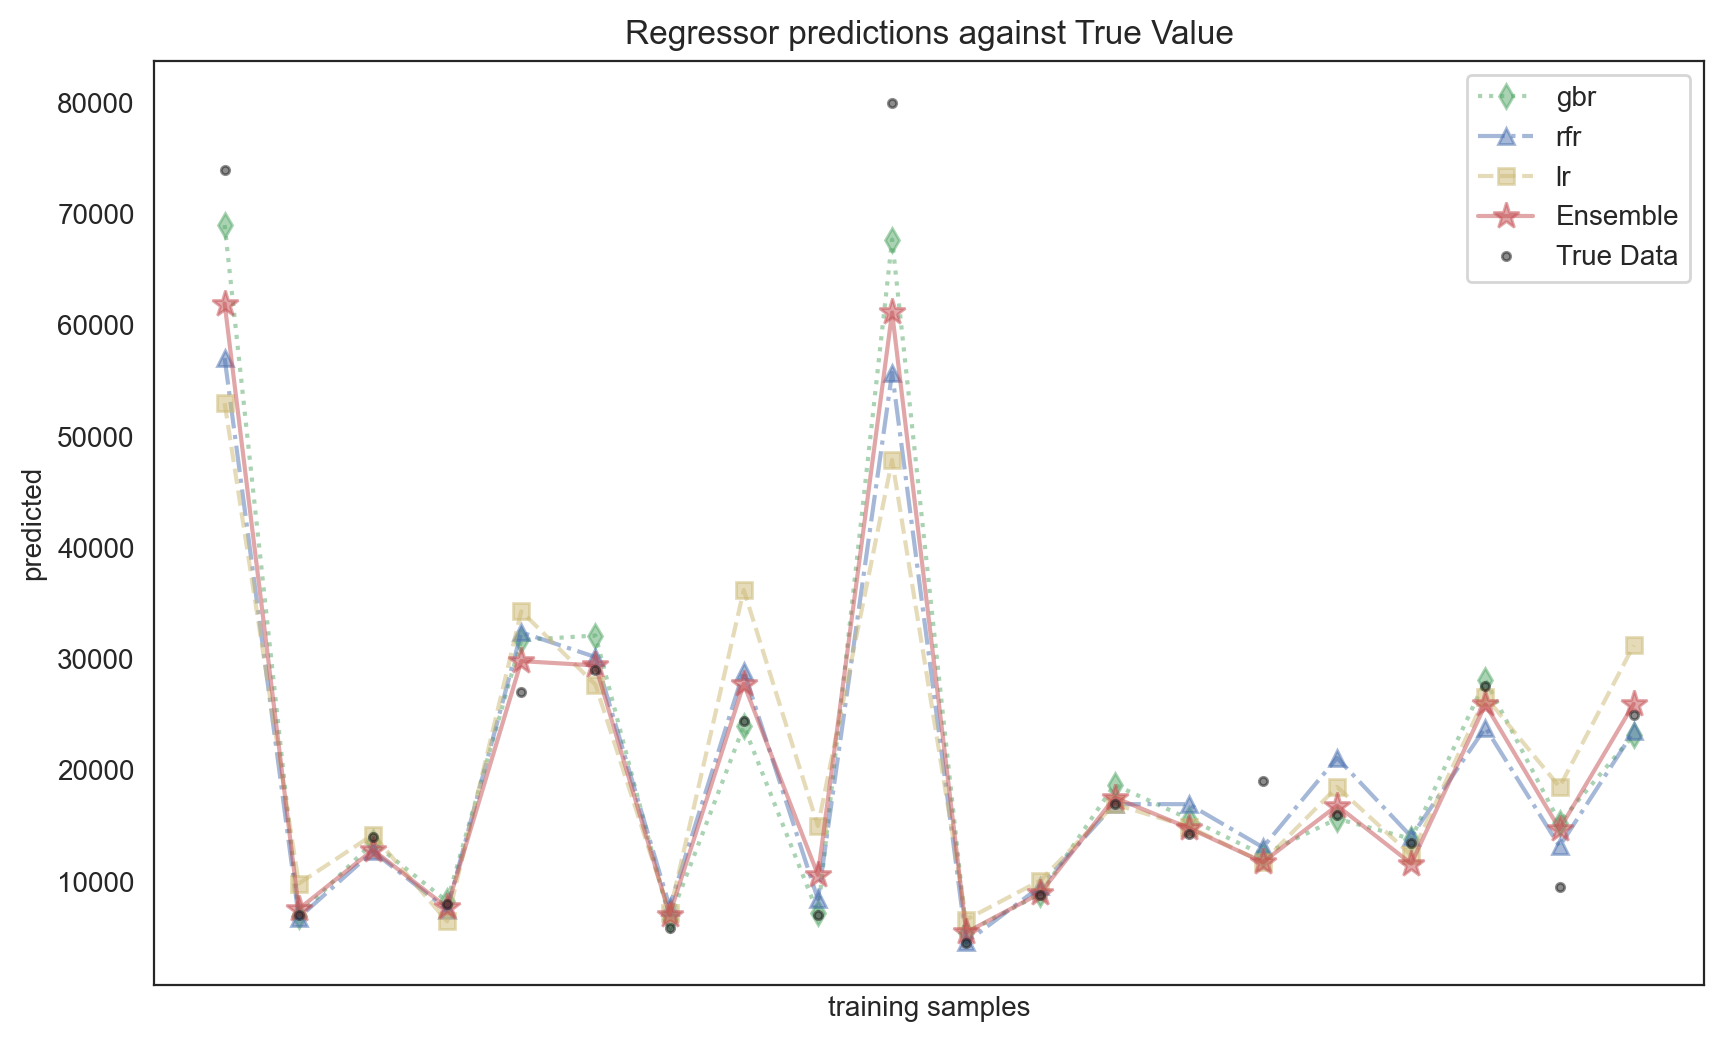

In [109]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gbr, "gd:", alpha=0.5, label="gbr")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="rfr")
ax.plot(pred_lr, "ys--", alpha=0.5, label="lr")
ax.plot(pred_ens, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions against True Value");

### Fine Grained Evaluation
Since the average price of cars in the datset is £17300, a model should give a predctive error in the range of +/- £500 from it's original price

Minimum difference : 0.13
Maximum difference : 81938.9
The Linear Regression model predicted 10.79 % of the car prices within the range of +/- £500 of its actual price


Text(0.5, 1.0, 'Linear Regression True vs Predicted')

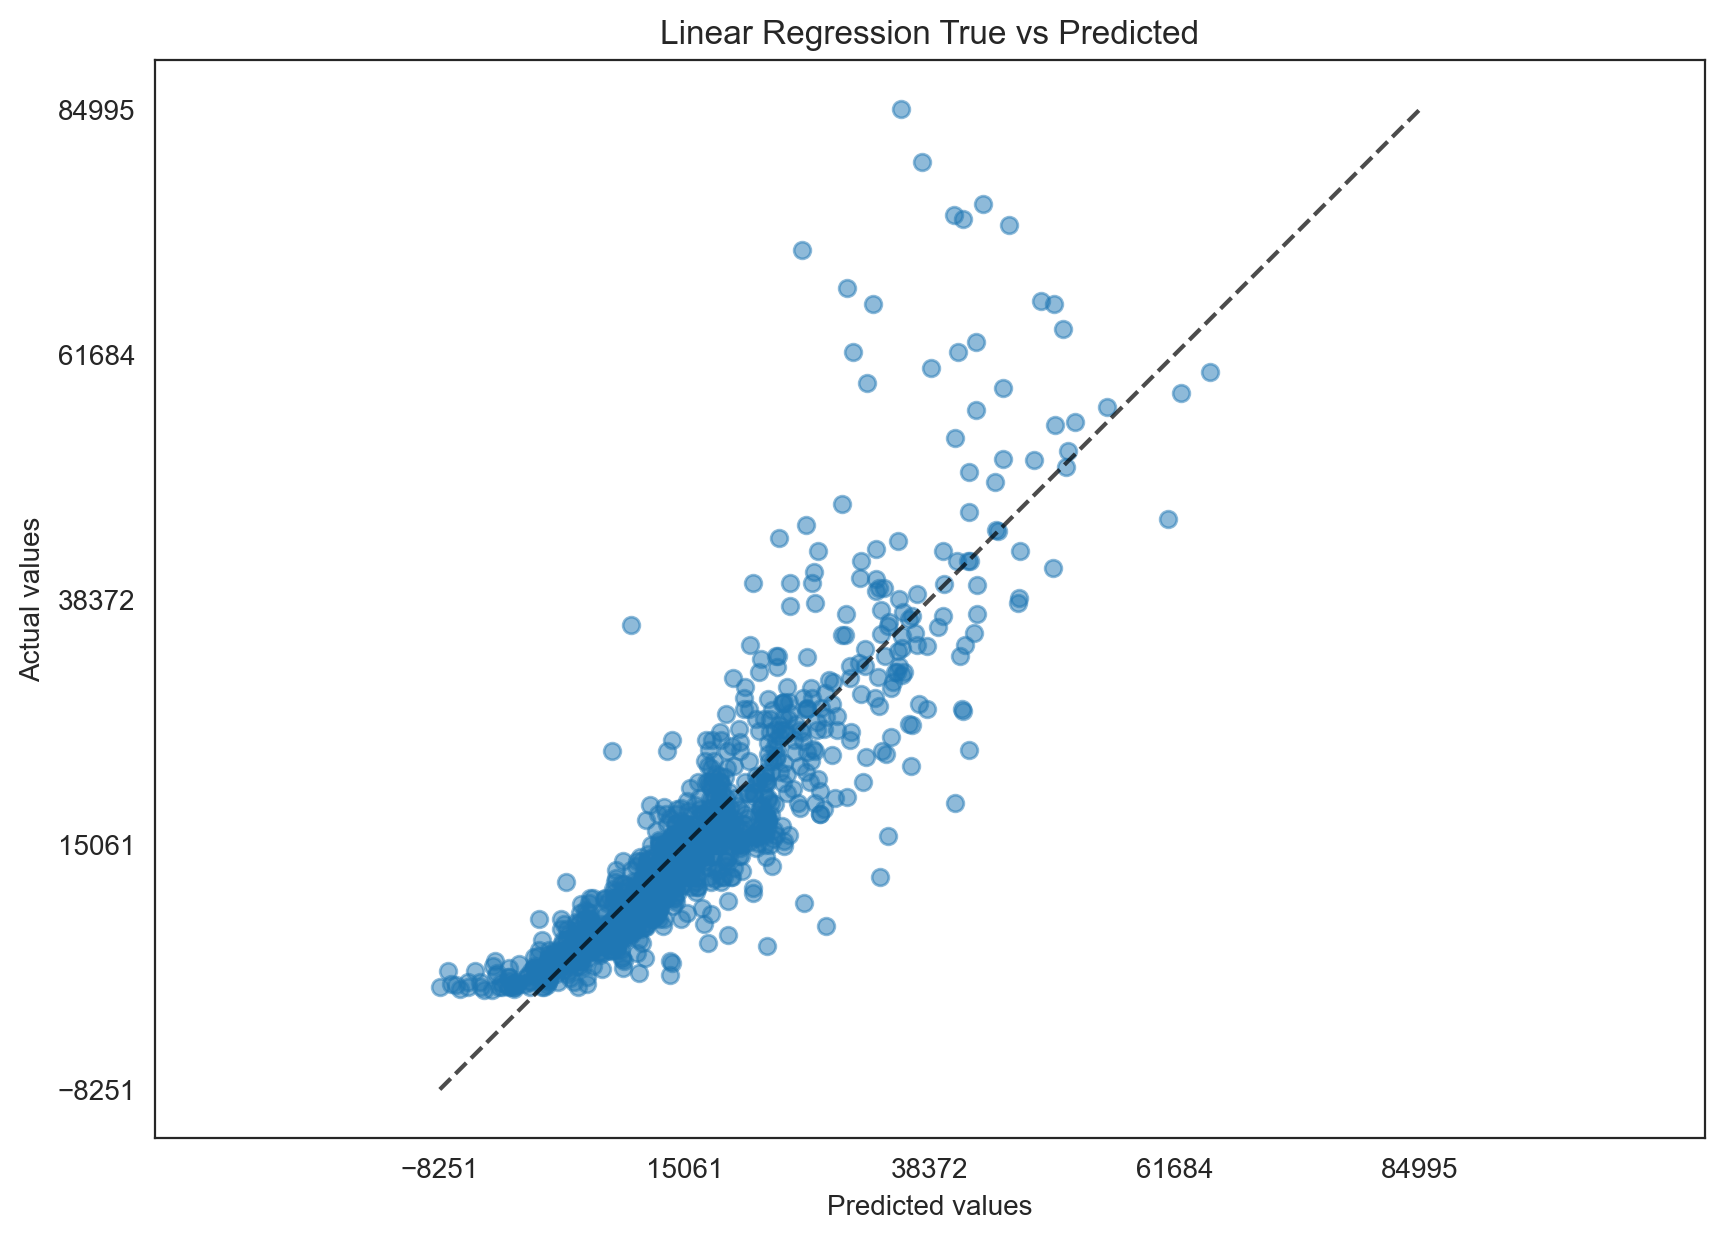

In [110]:
###Linear Regression
reg_resid = abs(y_test -y_pred_lr)

print('Minimum difference : {}'.format(round(reg_resid.min(),2)))
print('Maximum difference : {}'.format(round(reg_resid.max(),2)))

##percenatge of cars predicted with an error range of 500
reg_less_500 = reg_resid[reg_resid <=500]
reg_perc_error = round(len(reg_less_500)*100.0/ len(y_test), 2)
print('The Linear Regression model predicted {} % of the car prices within the range of +/- £500 of its actual price'.format(reg_perc_error))

PredictionErrorDisplay.from_estimator(
    lr, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);
plt.title("Linear Regression True vs Predicted")

Minimum difference : 0.12
Maximum difference : 66876.24
The Random Forest Regressor model predicted 15.35 % of the car prices within the range of +/- £500 of its actual price


Text(0.5, 1.0, 'Random Forest Regressor True vs Predicted')

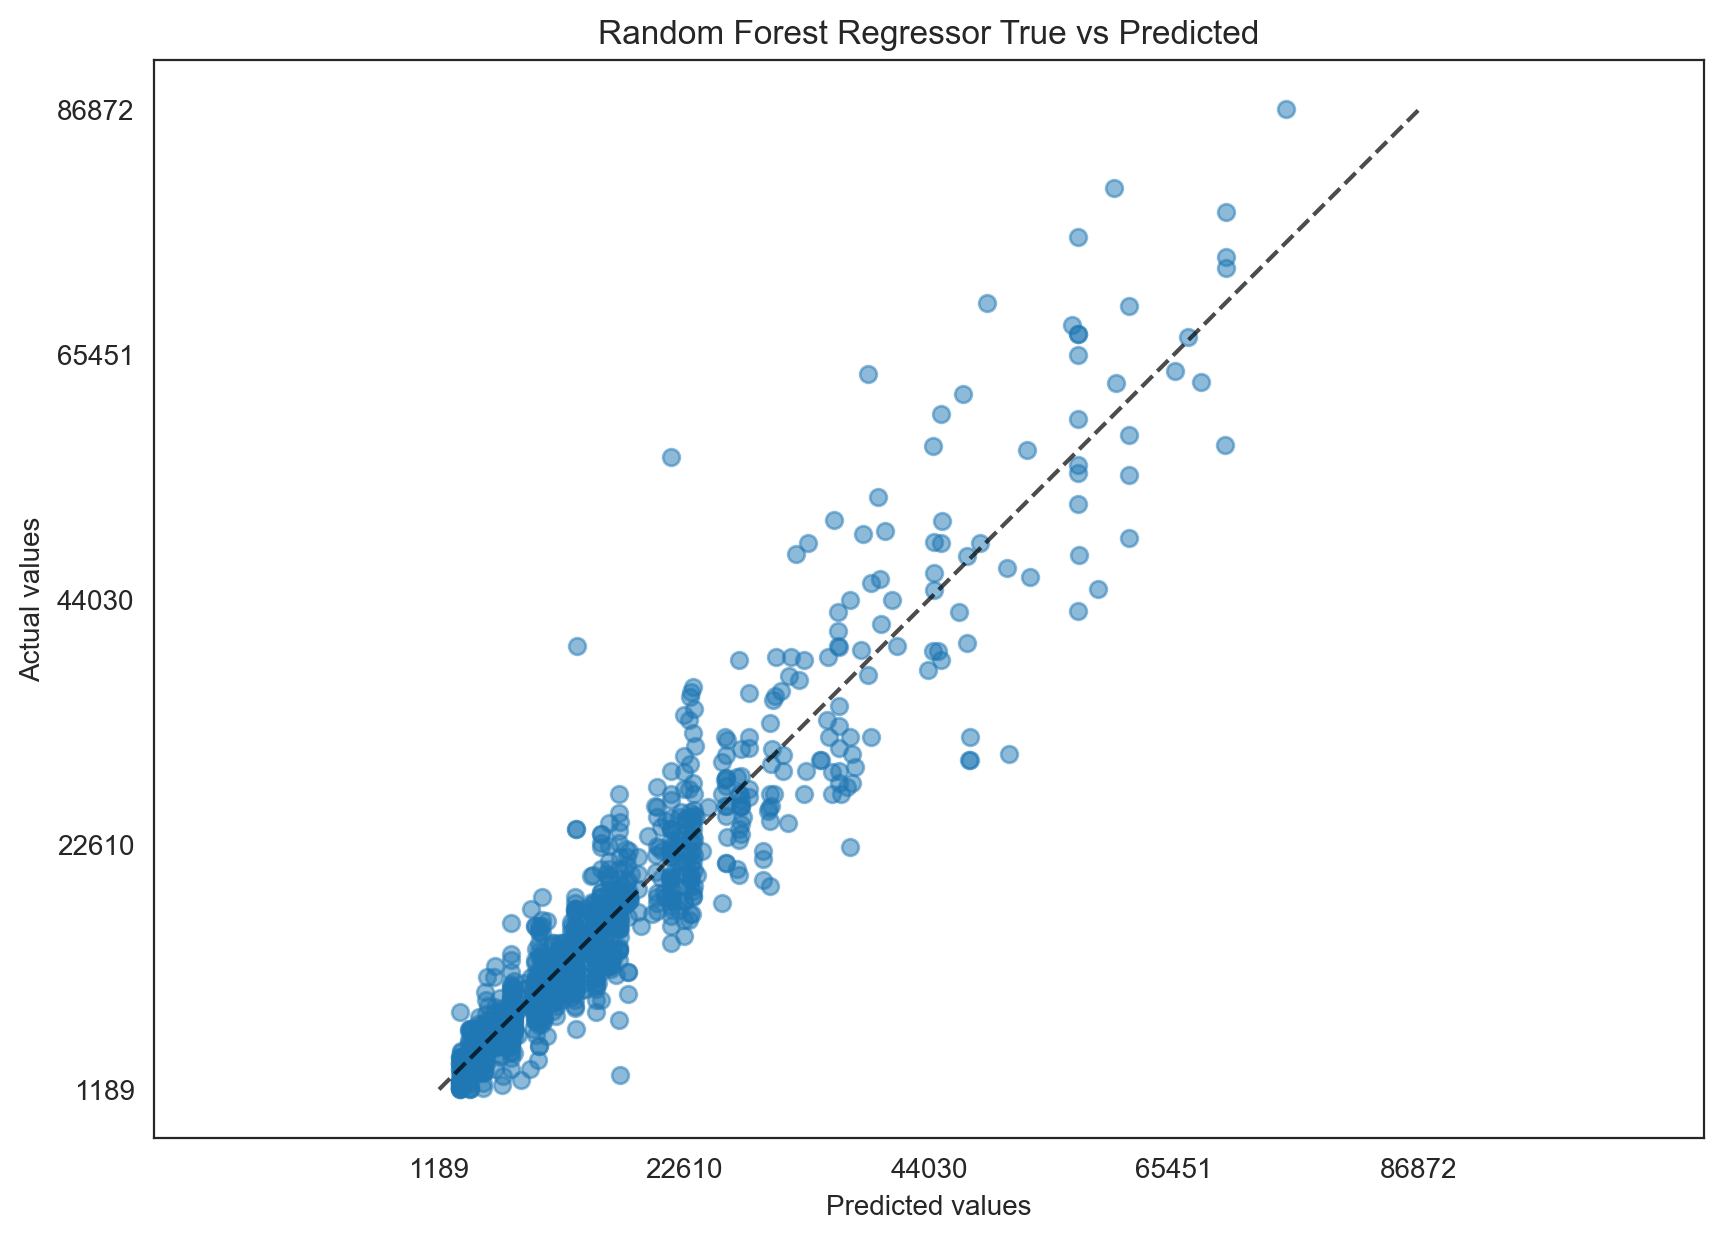

In [111]:
###Random Forest Regression
rfr_resid = abs(y_test -y_pred_rfr)

print('Minimum difference : {}'.format(round(rfr_resid.min(),2)))
print('Maximum difference : {}'.format(round(rfr_resid.max(),2)))

##percenatge of cars predicted with an error range of 500
rfr_less_500 = rfr_resid[rfr_resid <=500]
rfr_perc_error = round(len(rfr_less_500)*100.0/ len(y_test), 2)
print('The Random Forest Regressor model predicted {} % of the car prices within the range of +/- £500 of its actual price'.format(rfr_perc_error))

PredictionErrorDisplay.from_estimator(
    rfr, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);
plt.title("Random Forest Regressor True vs Predicted")

Minimum difference : 0.04
Maximum difference : 65381.71
The Random Forest Regressor model predicted 24.87 % of the car prices within the range of +/- £500 of its actual price


Text(0.5, 1.0, 'Gradient Boosting Regressor True vs Predicted')

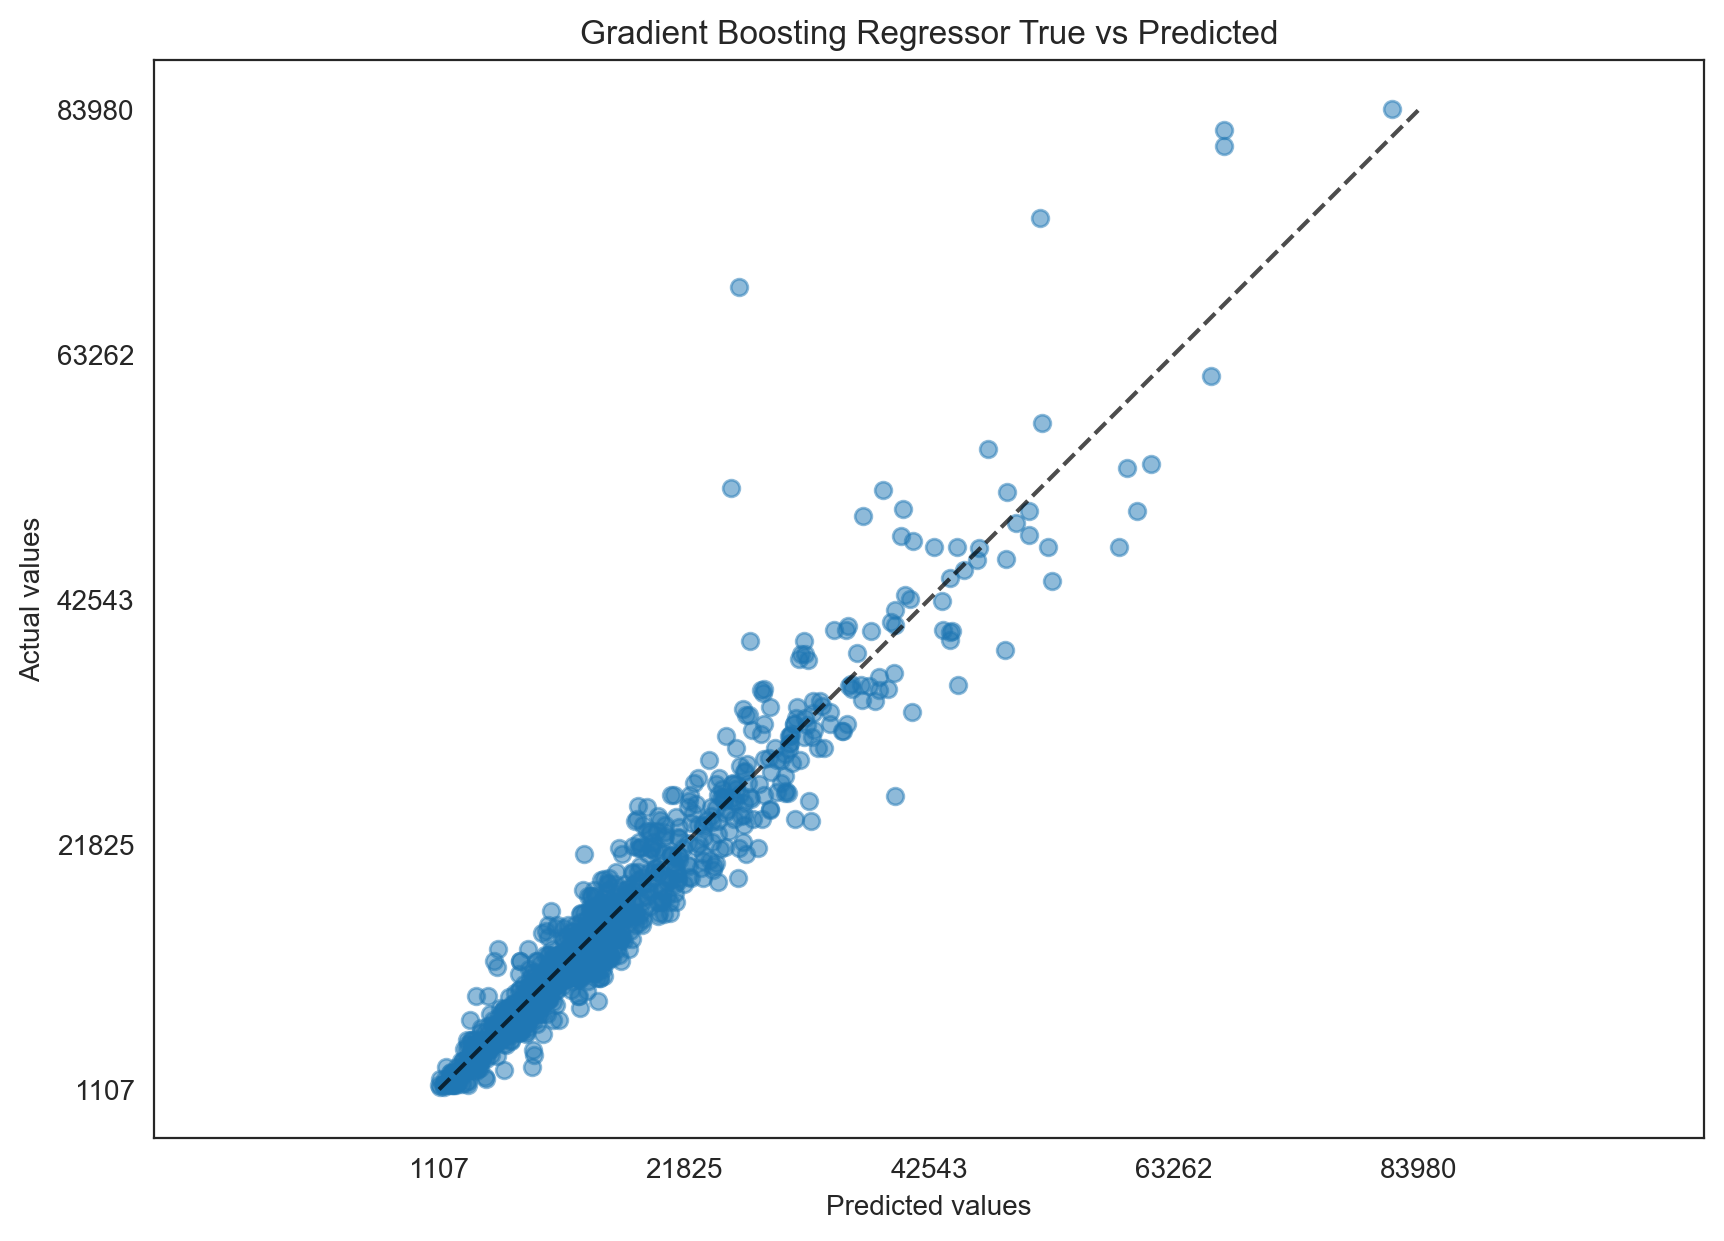

In [112]:
###Gradient Boosting Regression
gbr_resid = abs(y_test -y_pred_gbr)

print('Minimum difference : {}'.format(round(gbr_resid.min(),2)))
print('Maximum difference : {}'.format(round(gbr_resid.max(),2)))

##percenatge of cars predicted with an error range of 500
gbr_less_500 = gbr_resid[gbr_resid <=500]
gbr_perc_error = round(len(gbr_less_500)*100.0/ len(y_test), 2)
print('The Random Forest Regressor model predicted {} % of the car prices within the range of +/- £500 of its actual price'.format(gbr_perc_error))

PredictionErrorDisplay.from_estimator(
    gbr, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);
plt.title("Gradient Boosting Regressor True vs Predicted")

Minimum difference : 0.01
Maximum difference : 66627.89
The Voting Regressor model predicted 18.61 % of the car prices within the range of +/- £500 of its actual price


Text(0.5, 1.0, 'Voting Regressor True vs Predicted')

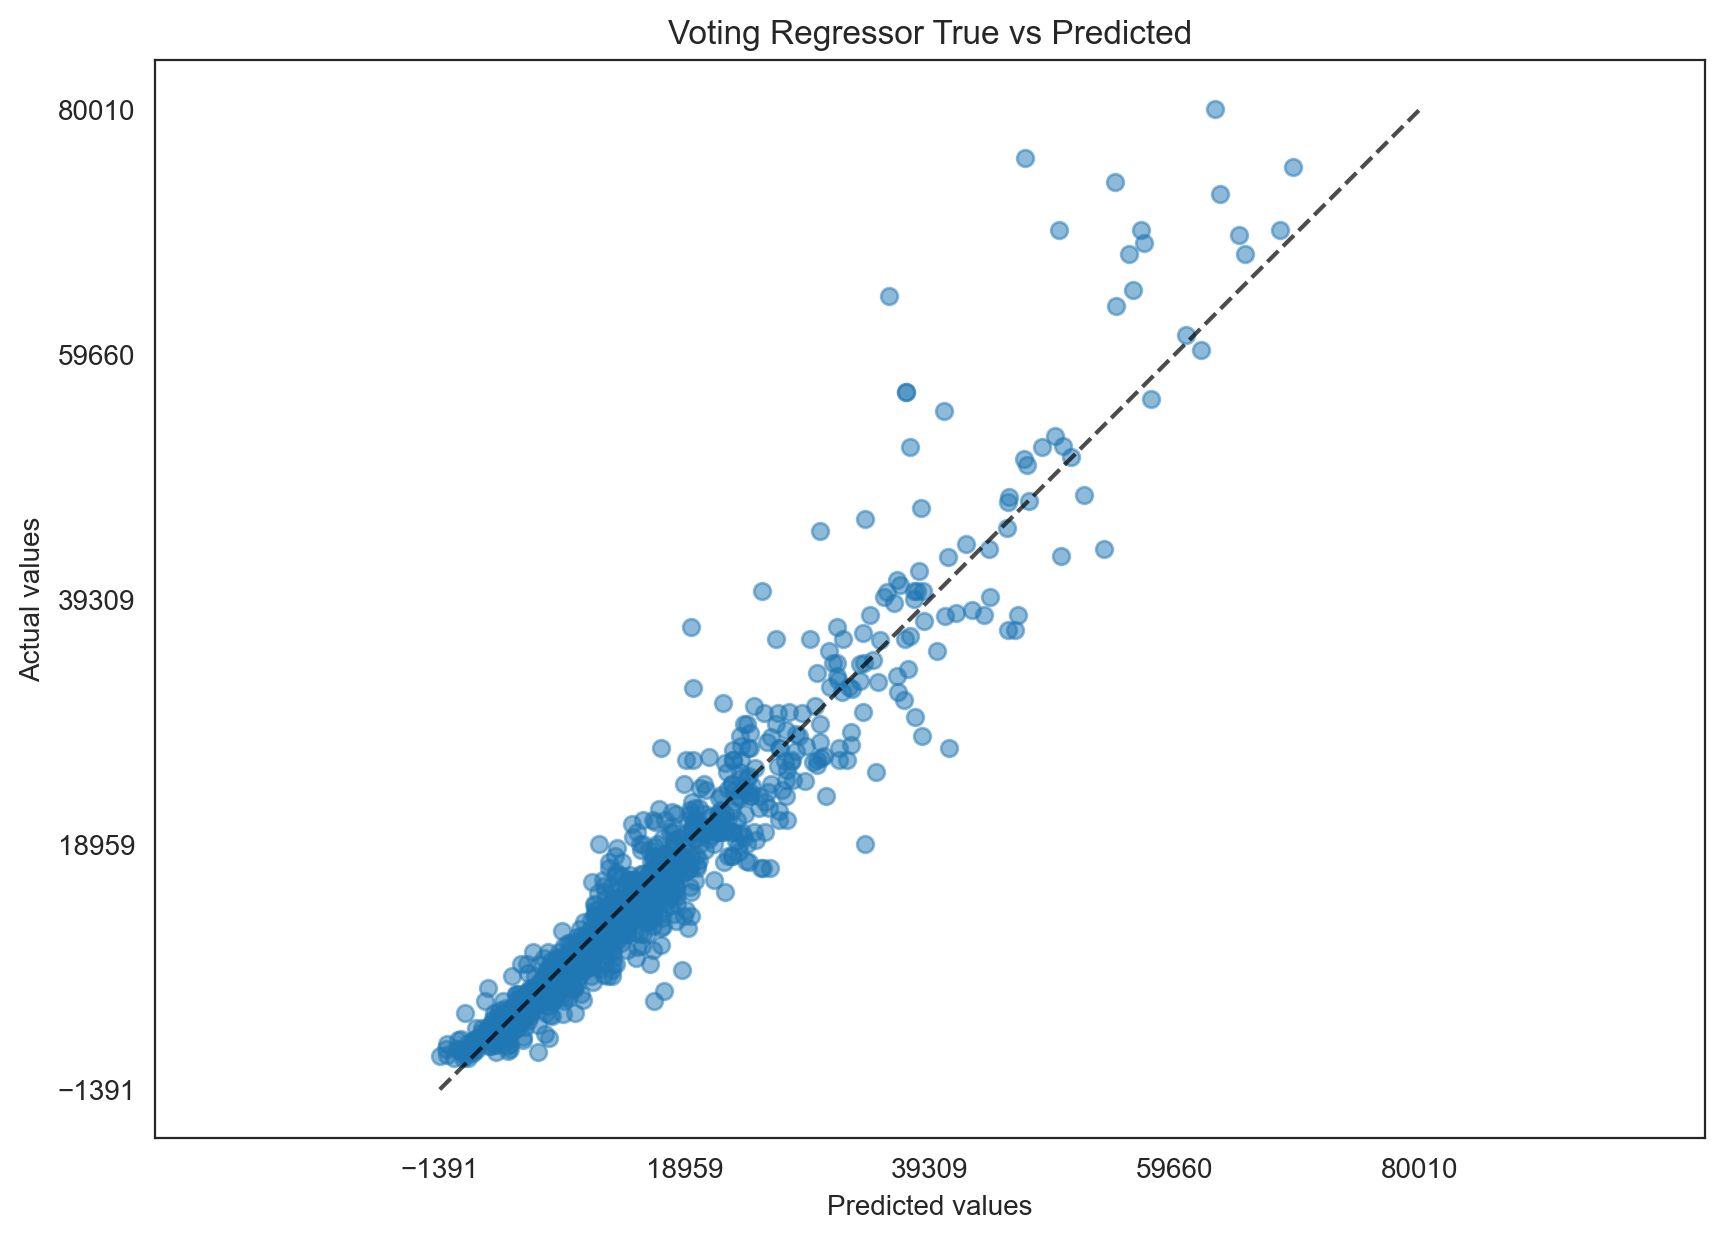

In [113]:
###Gradient Boosting Regression
vot_resid = abs(y_test -y_pred_vot)

print('Minimum difference : {}'.format(round(vot_resid.min(),2)))
print('Maximum difference : {}'.format(round(vot_resid.max(),2)))

##percenatge of cars predicted with an error range of 500
vot_less_500 = gbr_resid[vot_resid <=500]
vot_perc_error = round(len(vot_less_500)*100.0/ len(y_test), 2)
print('The Voting Regressor model predicted {} % of the car prices within the range of +/- £500 of its actual price'.format(vot_perc_error))

PredictionErrorDisplay.from_estimator(
    voting, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);
plt.title("Voting Regressor True vs Predicted")

### Feature Importance

In [114]:
def plot_est_feat_imp_barh(est, feat_names, ax=None, style_kws={}, linear_model=False):
    """ """
    if ax is None:
        fig, ax = plt.subplots()
    if linear_model:
        return pd.Series(est.coef_,index=feat_names).sort_values().plot.barh(**style_kws)
    else:
        return pd.Series(est.feature_importances_,index=feat_names).sort_values().plot.barh(**style_kws)

### Linear Regression 

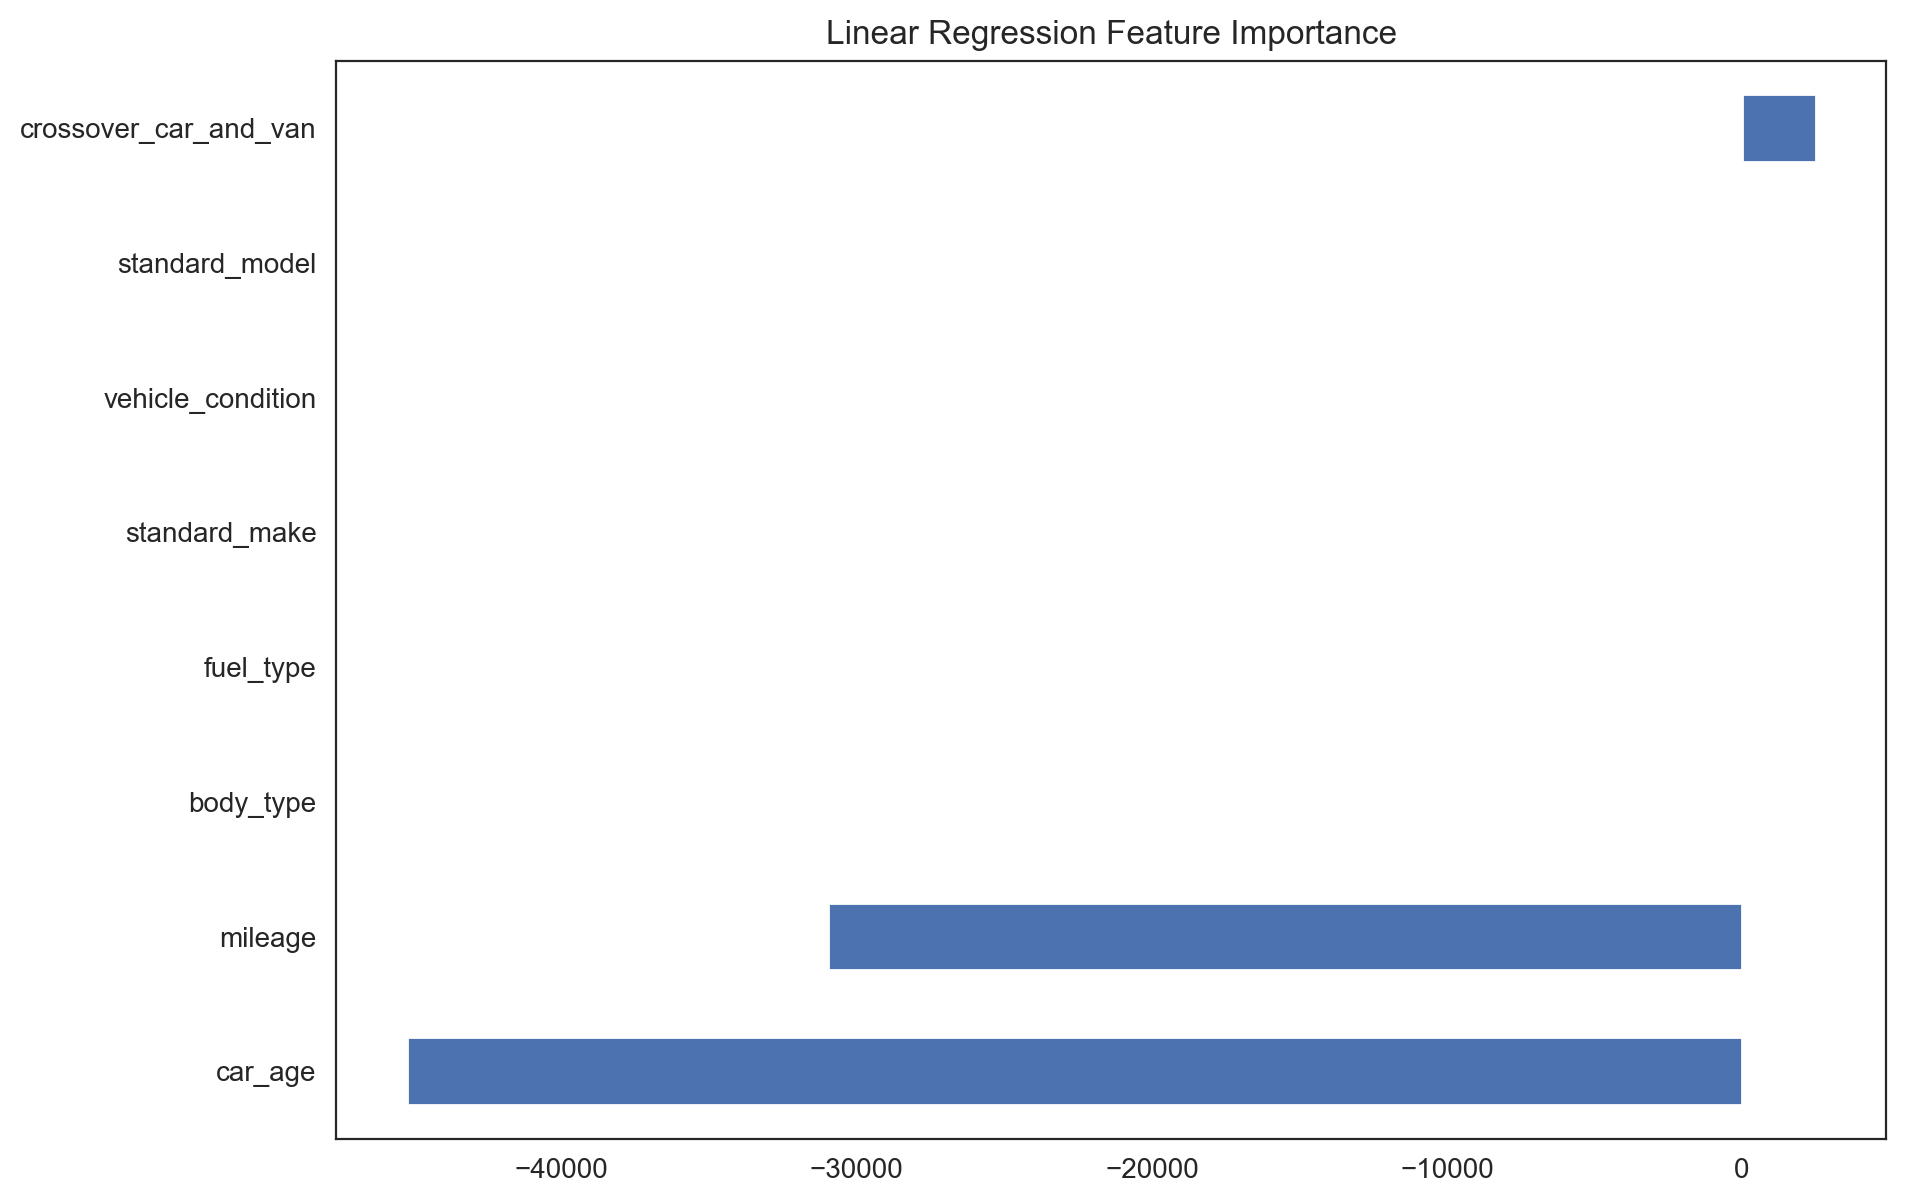

In [115]:
plot_est_feat_imp_barh(reg['estimator'], reg['preprocessor'].get_feature_names_out(), linear_model=True);
plt.title('Linear Regression Feature Importance')
plt.show()

### Random Forest Regressor

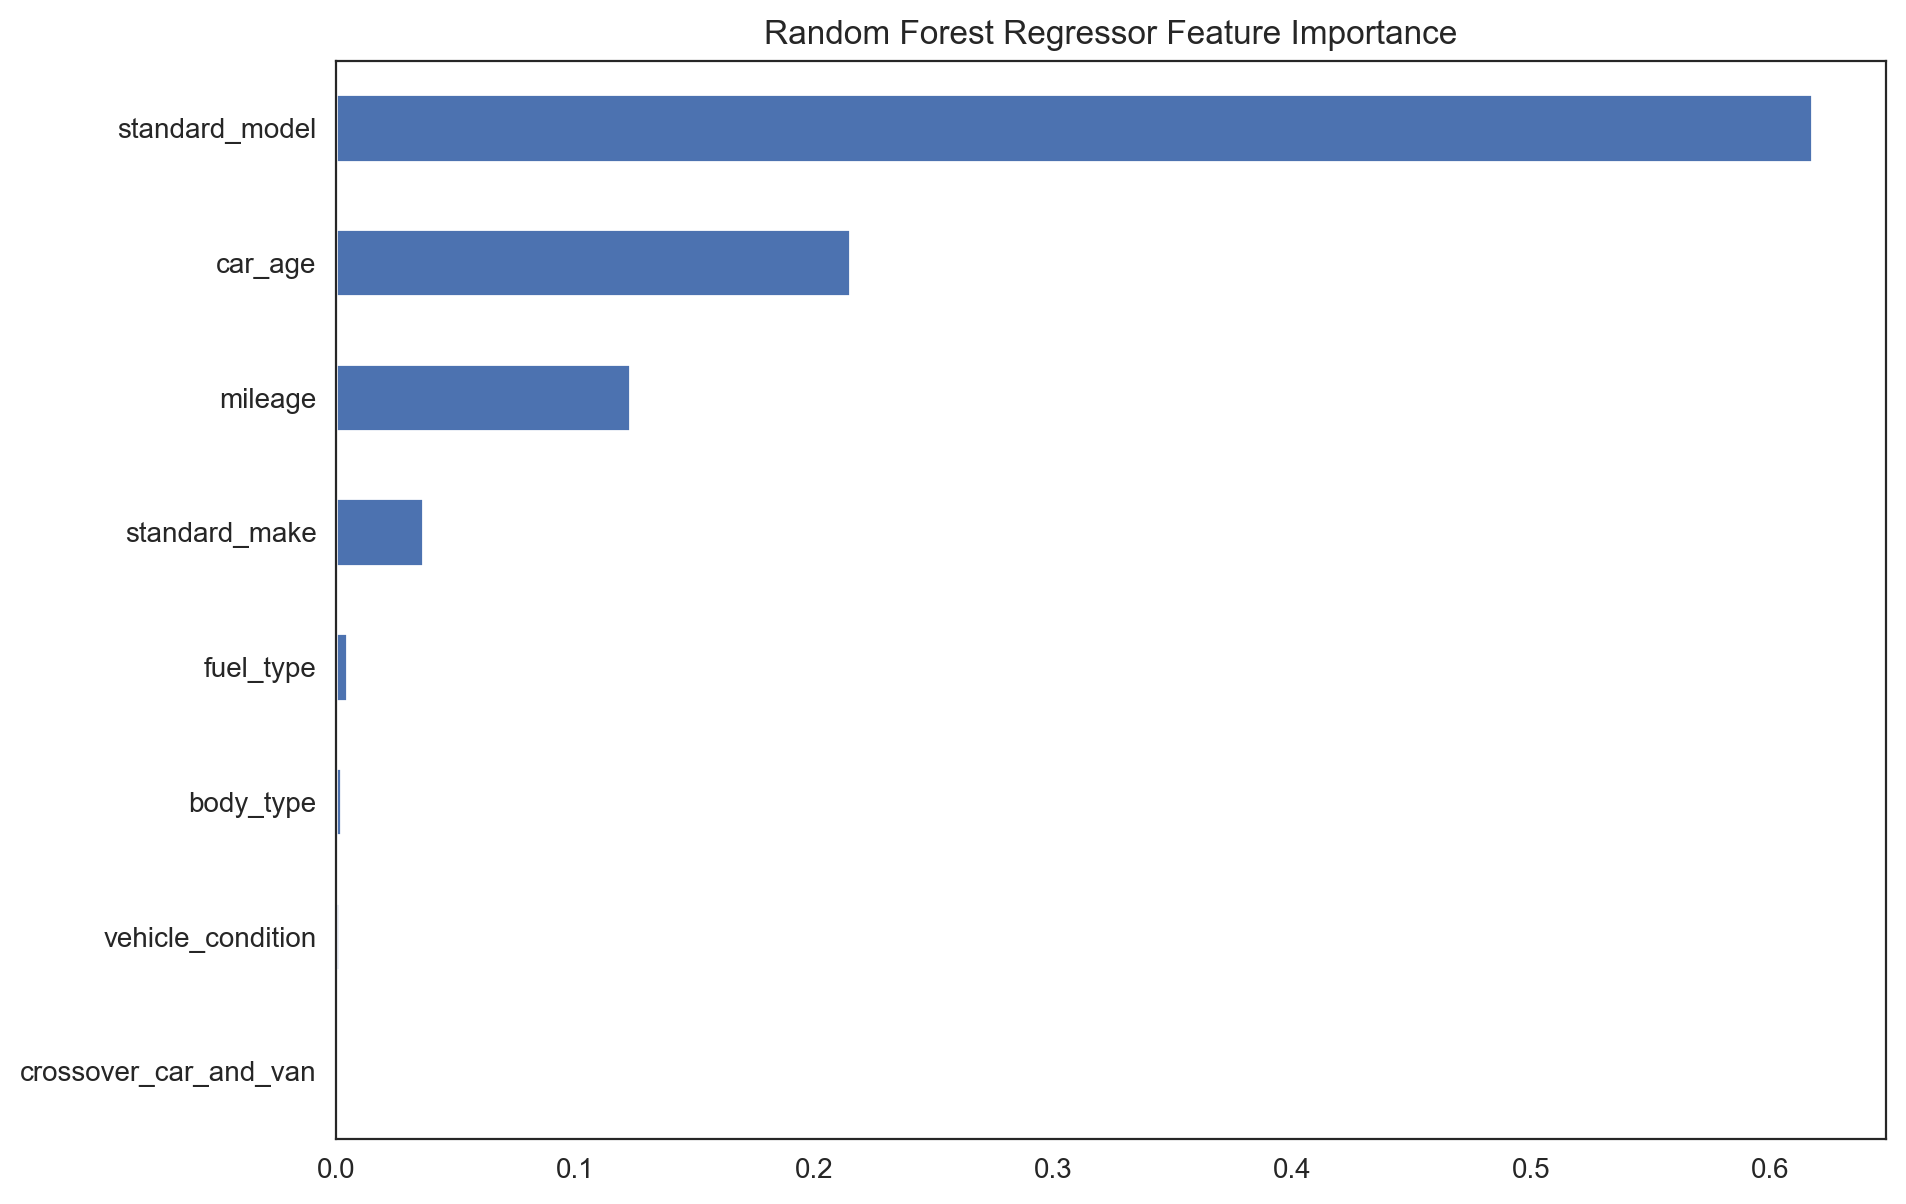

In [116]:
plot_est_feat_imp_barh(rfr['estimator'], rfr['preprocessor'].get_feature_names_out());
plt.title('Random Forest Regressor Feature Importance')
plt.show()

### Gradient Boost Regressor

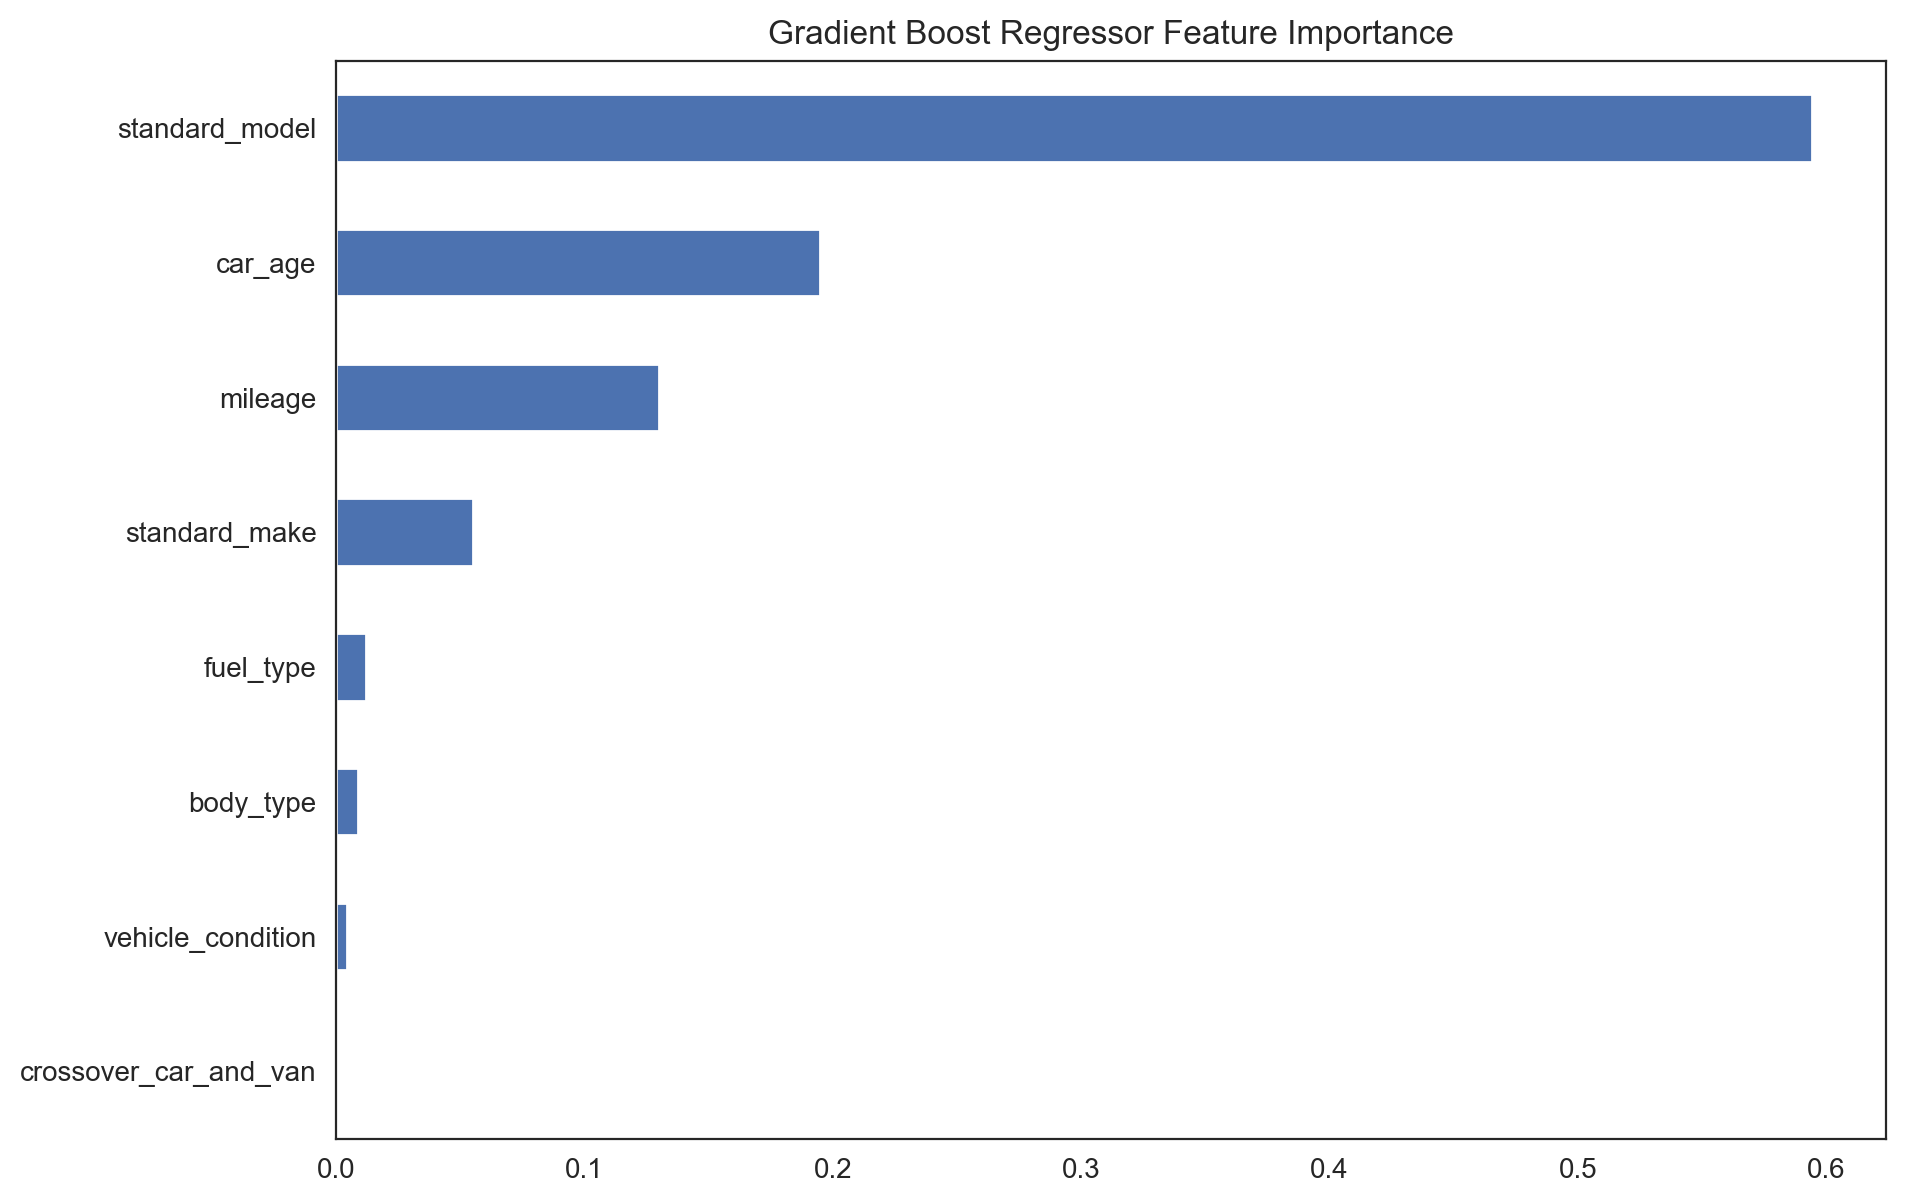

In [117]:
plot_est_feat_imp_barh(gbr['estimator'], gbr['preprocessor'].get_feature_names_out());
plt.title('Gradient Boost Regressor Feature Importance')
plt.show()

### SHAP
##### Local and Global Explanation

### Shap Linear Regressor

In [118]:
X_train_linear = reg['preprocessor'].transform(X_train)
column_names = X_train_linear.columns
X_test_linear  = reg['preprocessor'].transform(X_test)

In [119]:
explainer = shap.Explainer(reg['estimator'], X_train_linear)

In [120]:
explanations = explainer(X_test_linear)

In [121]:
explanations.shape

(78781, 8)

In [122]:
y_test.iloc[245]

7959

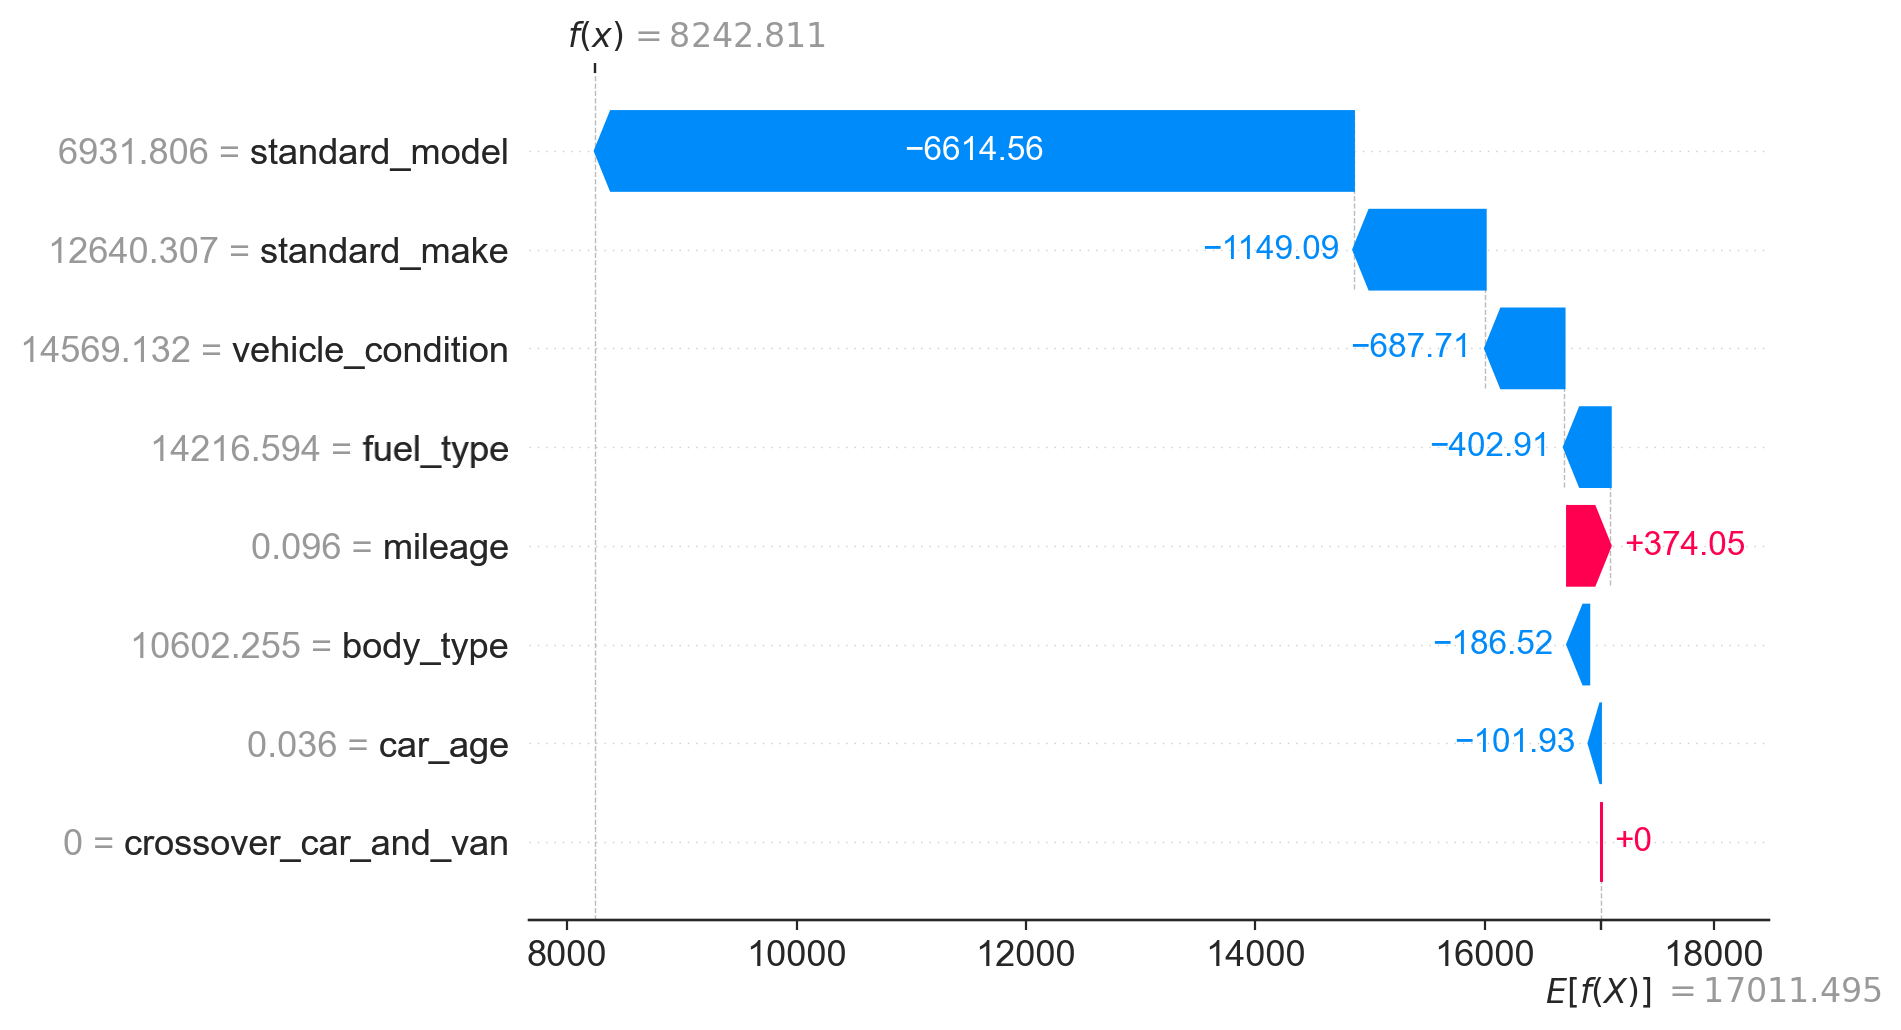

In [123]:
# for a random instance
shap.plots.waterfall(explanations[245])

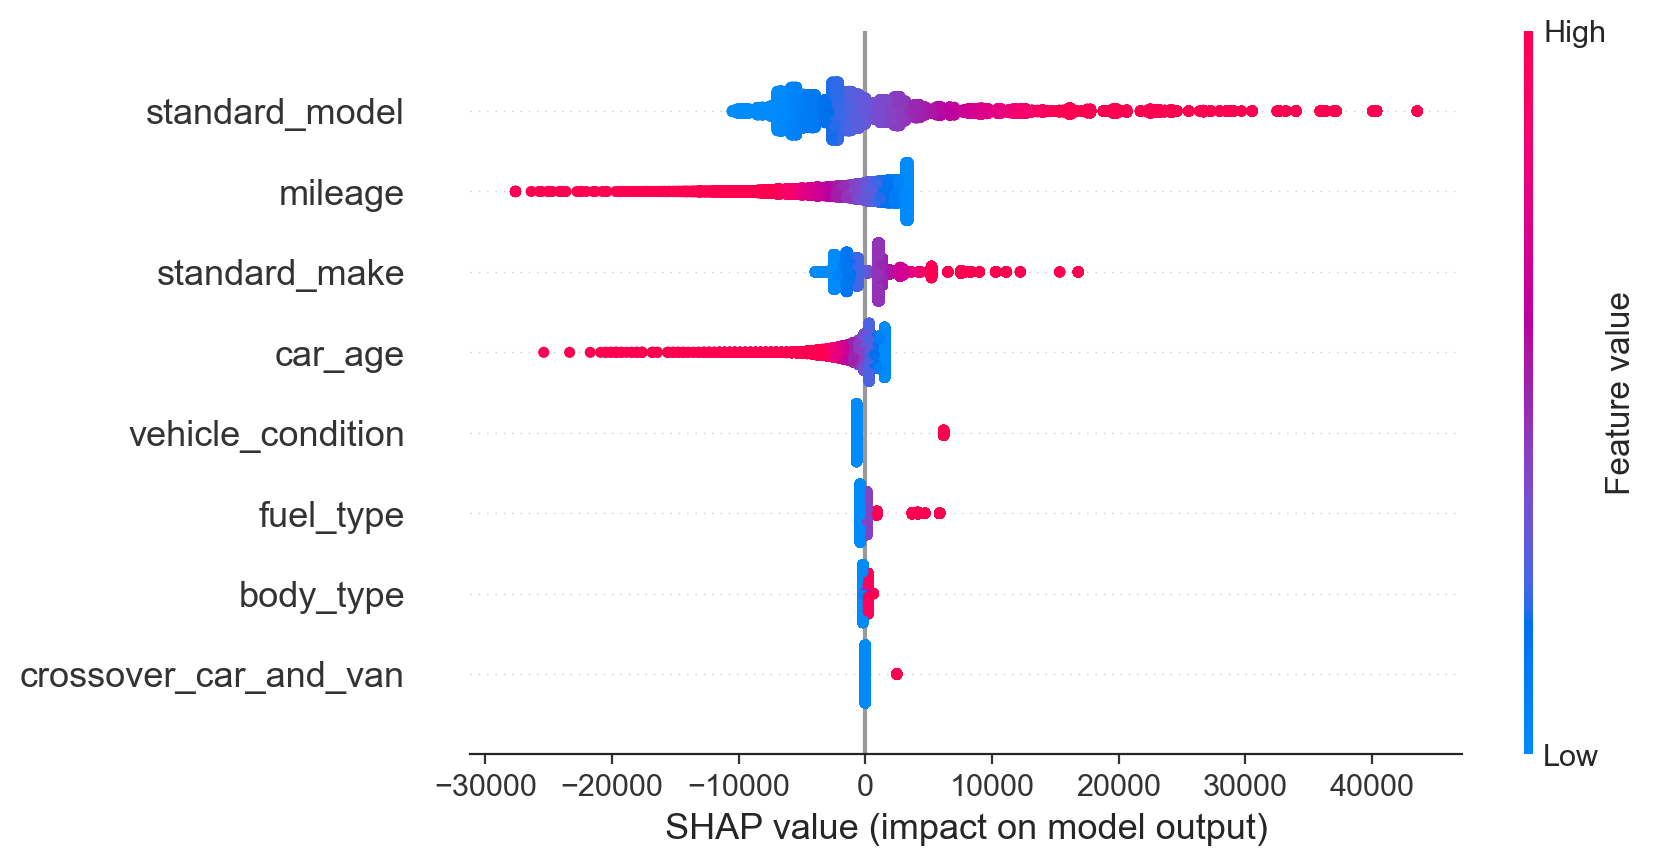

In [124]:
# global model
shap.plots.beeswarm(explanations)

### Shap Random Forest Regressor

In [125]:
X_train_pp = rfr['preprocessor'].transform(X_train)
column_names = X_train_pp.columns
X_test_pp  = rfr['preprocessor'].transform(X_test)

In [126]:
### Random Forest Regressor
explainer = shap.Explainer(rfr['estimator'], X_train_pp)

explanations = explainer(X_test_pp)

100%|===================| 78569/78781 [06:06<00:00]        

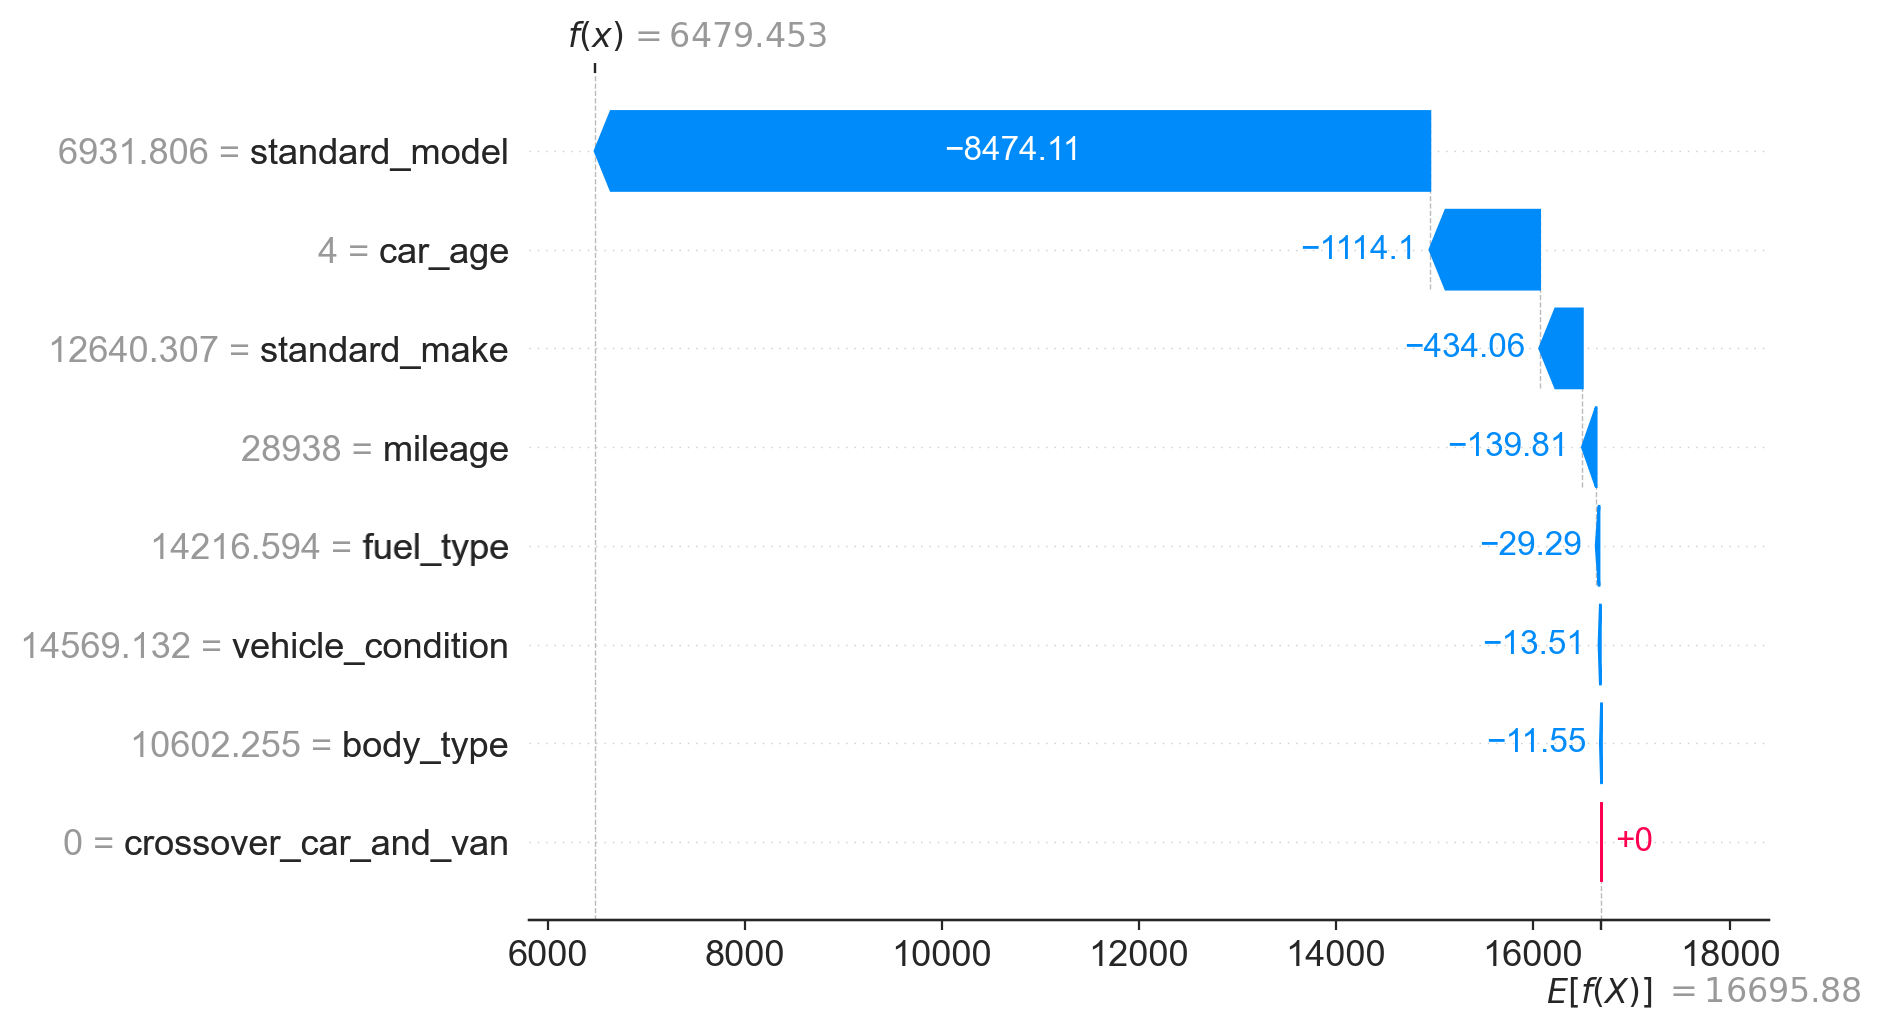

In [127]:
# for a random instance
shap.plots.waterfall(explanations[245])

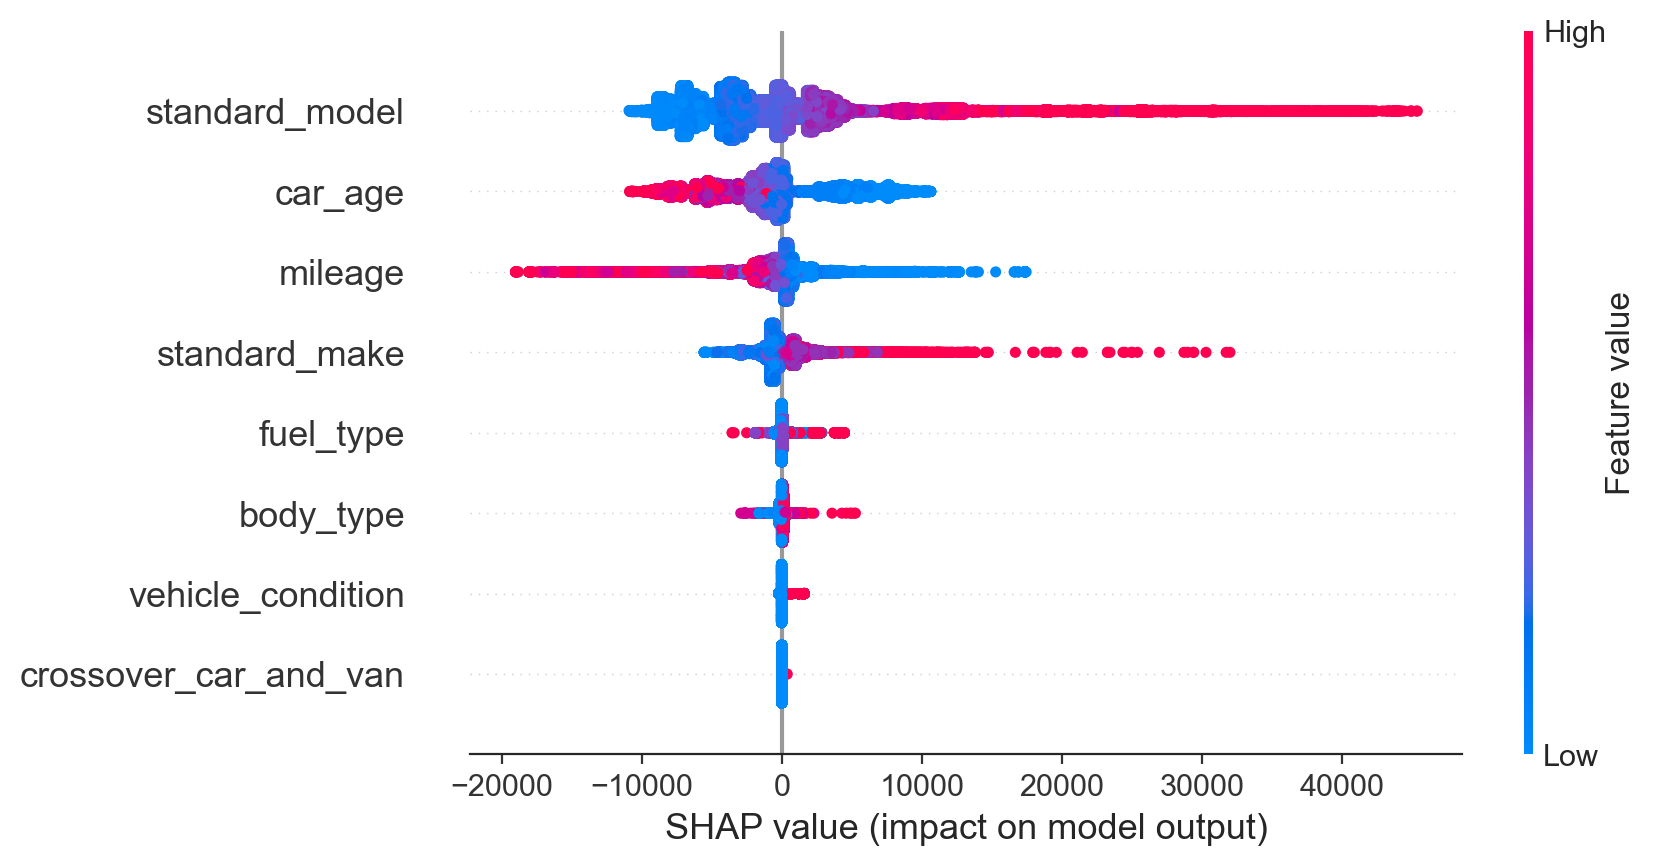

In [128]:
# global model
shap.plots.beeswarm(explanations)

### Shap Gradient Boost Regressor

In [129]:
X_train_pp = gbr['preprocessor'].transform(X_train)
column_names = X_train_pp.columns
X_test_pp  = gbr['preprocessor'].transform(X_test)

In [130]:
### Random Forest Regressor
explainer = shap.Explainer(gbr['estimator'], X_train_pp)

explanations = explainer(X_test_pp)

100%|===================| 78598/78781 [07:02<00:00]        

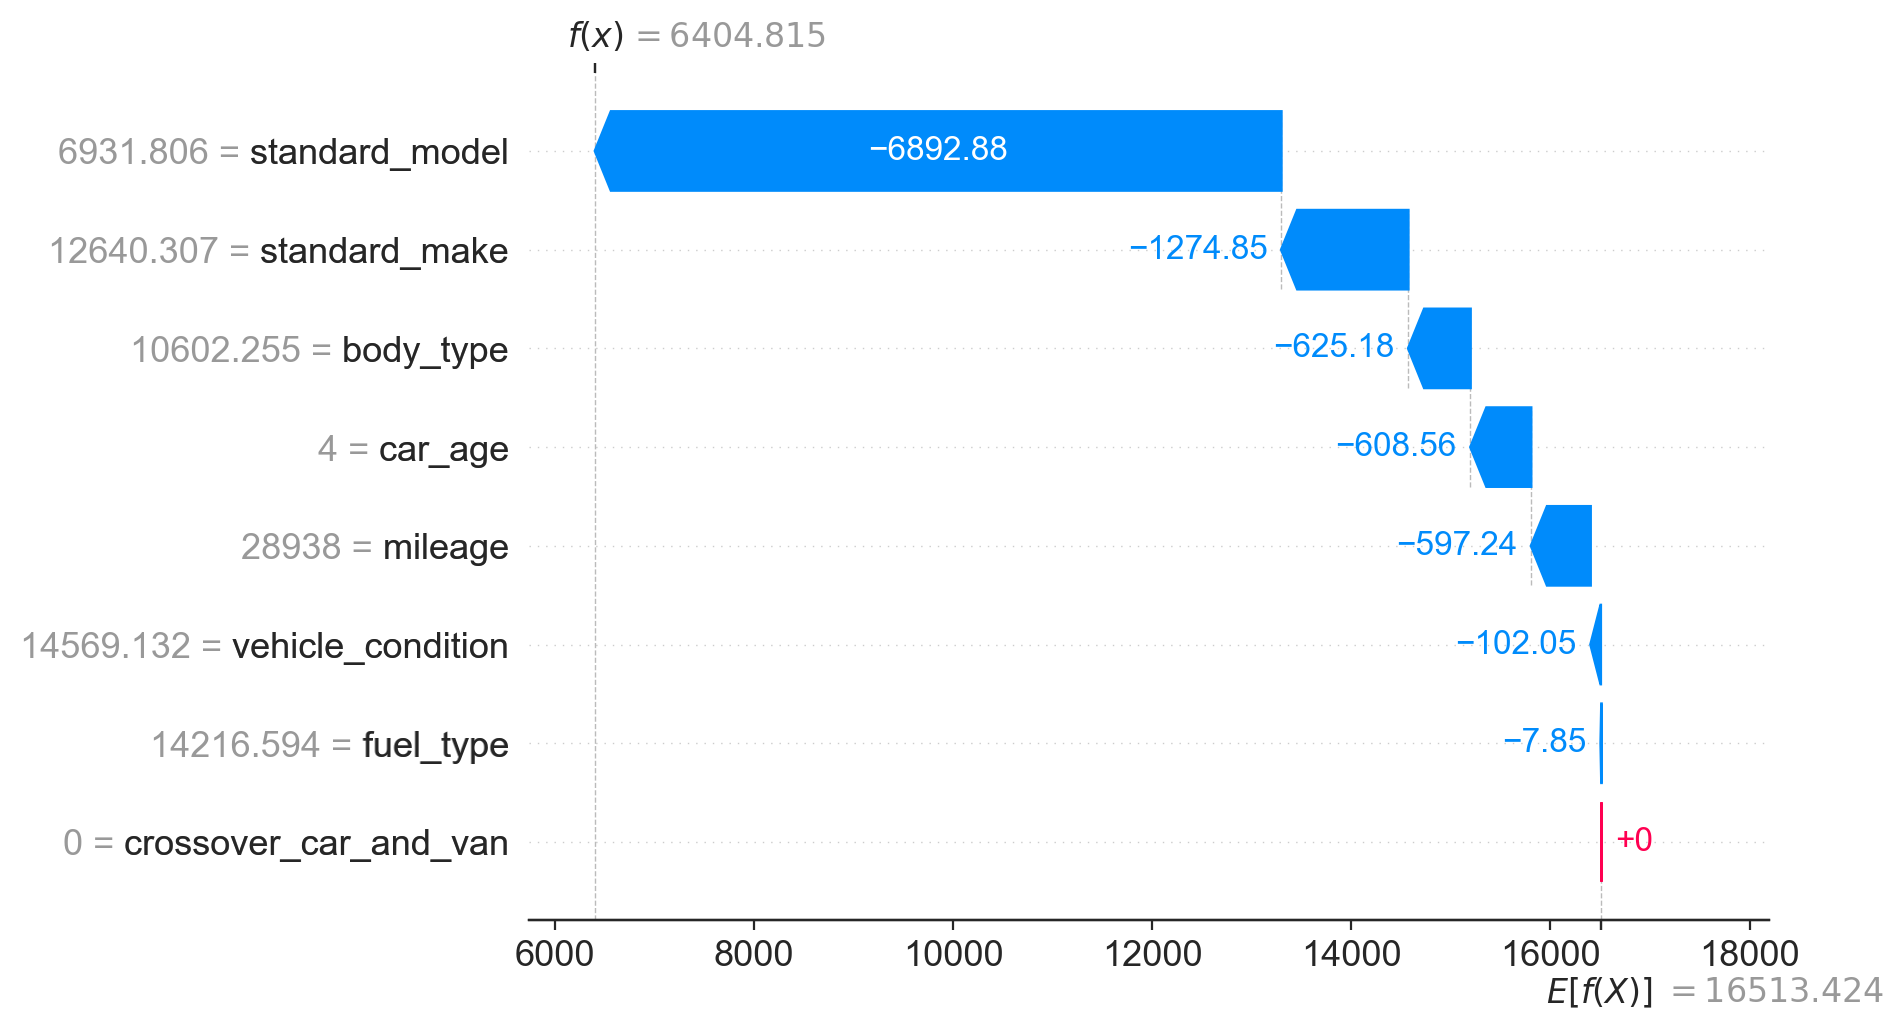

In [131]:
# for a random instance
shap.plots.waterfall(explanations[245])

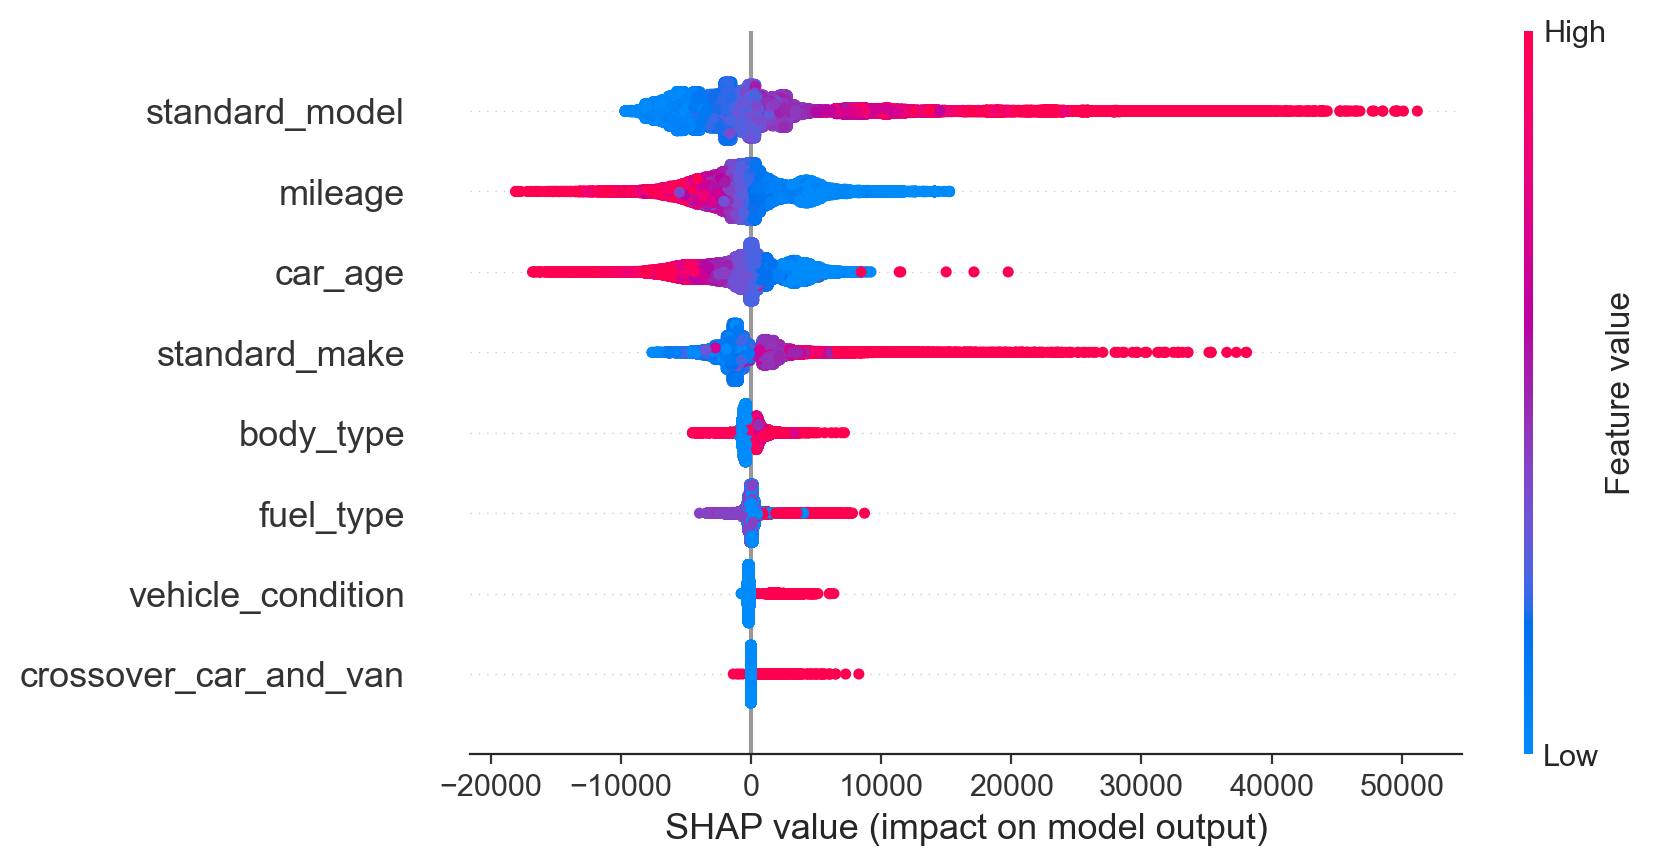

In [132]:
# global model
shap.plots.beeswarm(explanations)

### Partial Dependency Plot

### Linear Regression

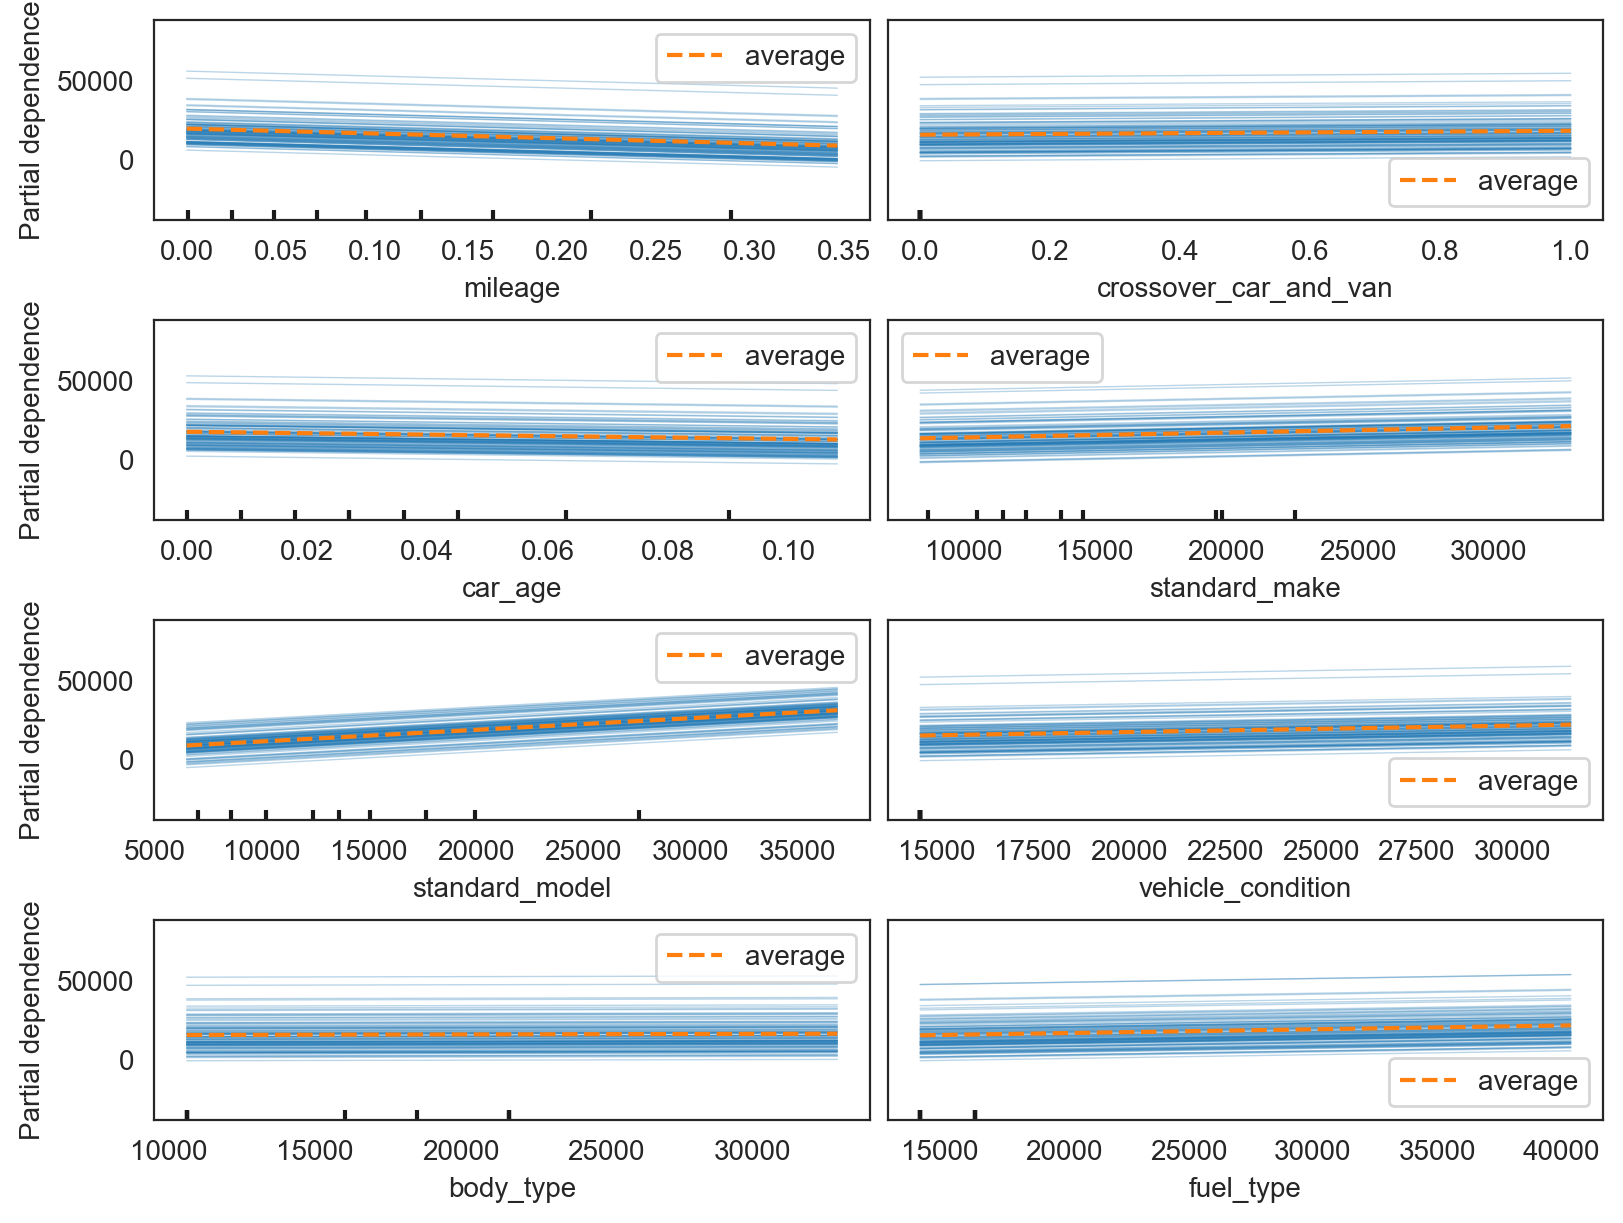

In [133]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    reg['estimator'], X_test_linear, features=column_names,
    kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);


### Random Forest Regressor

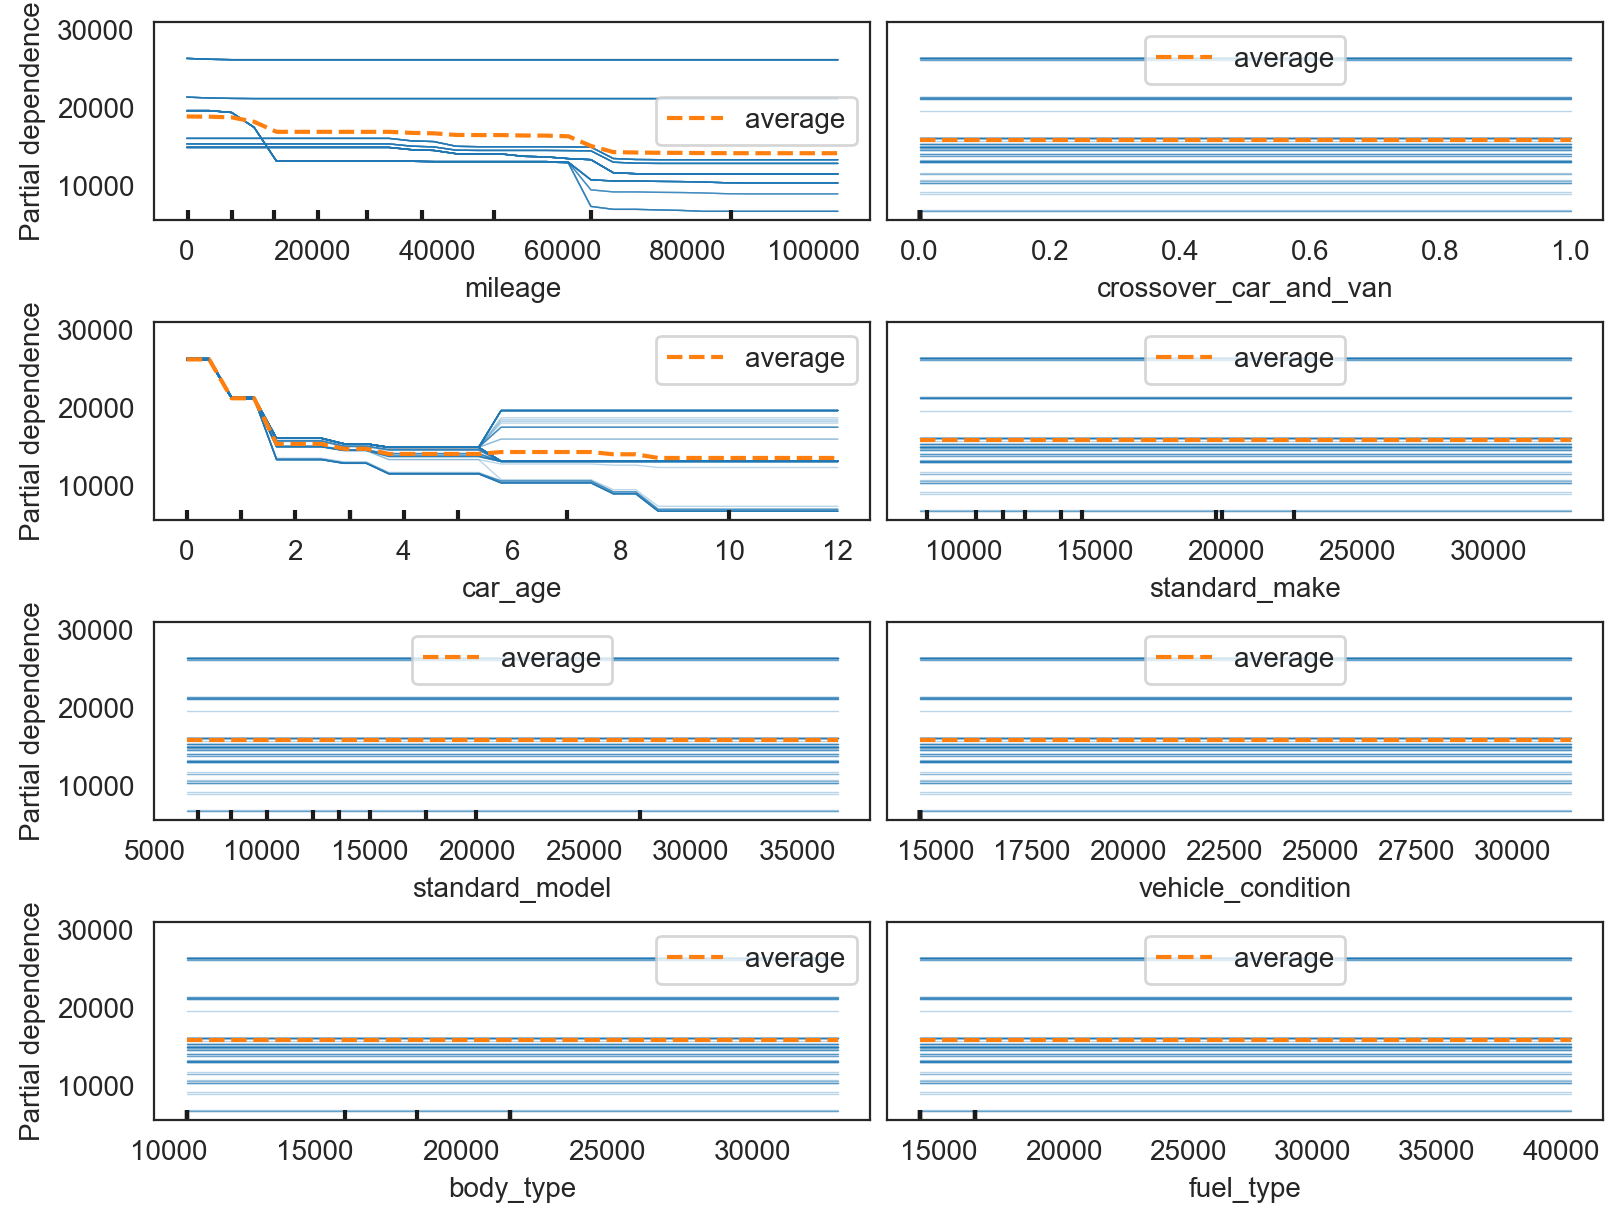

In [134]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rfr, X_test_pp, features= column_names,
    kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

### Gradient Boost Regressor

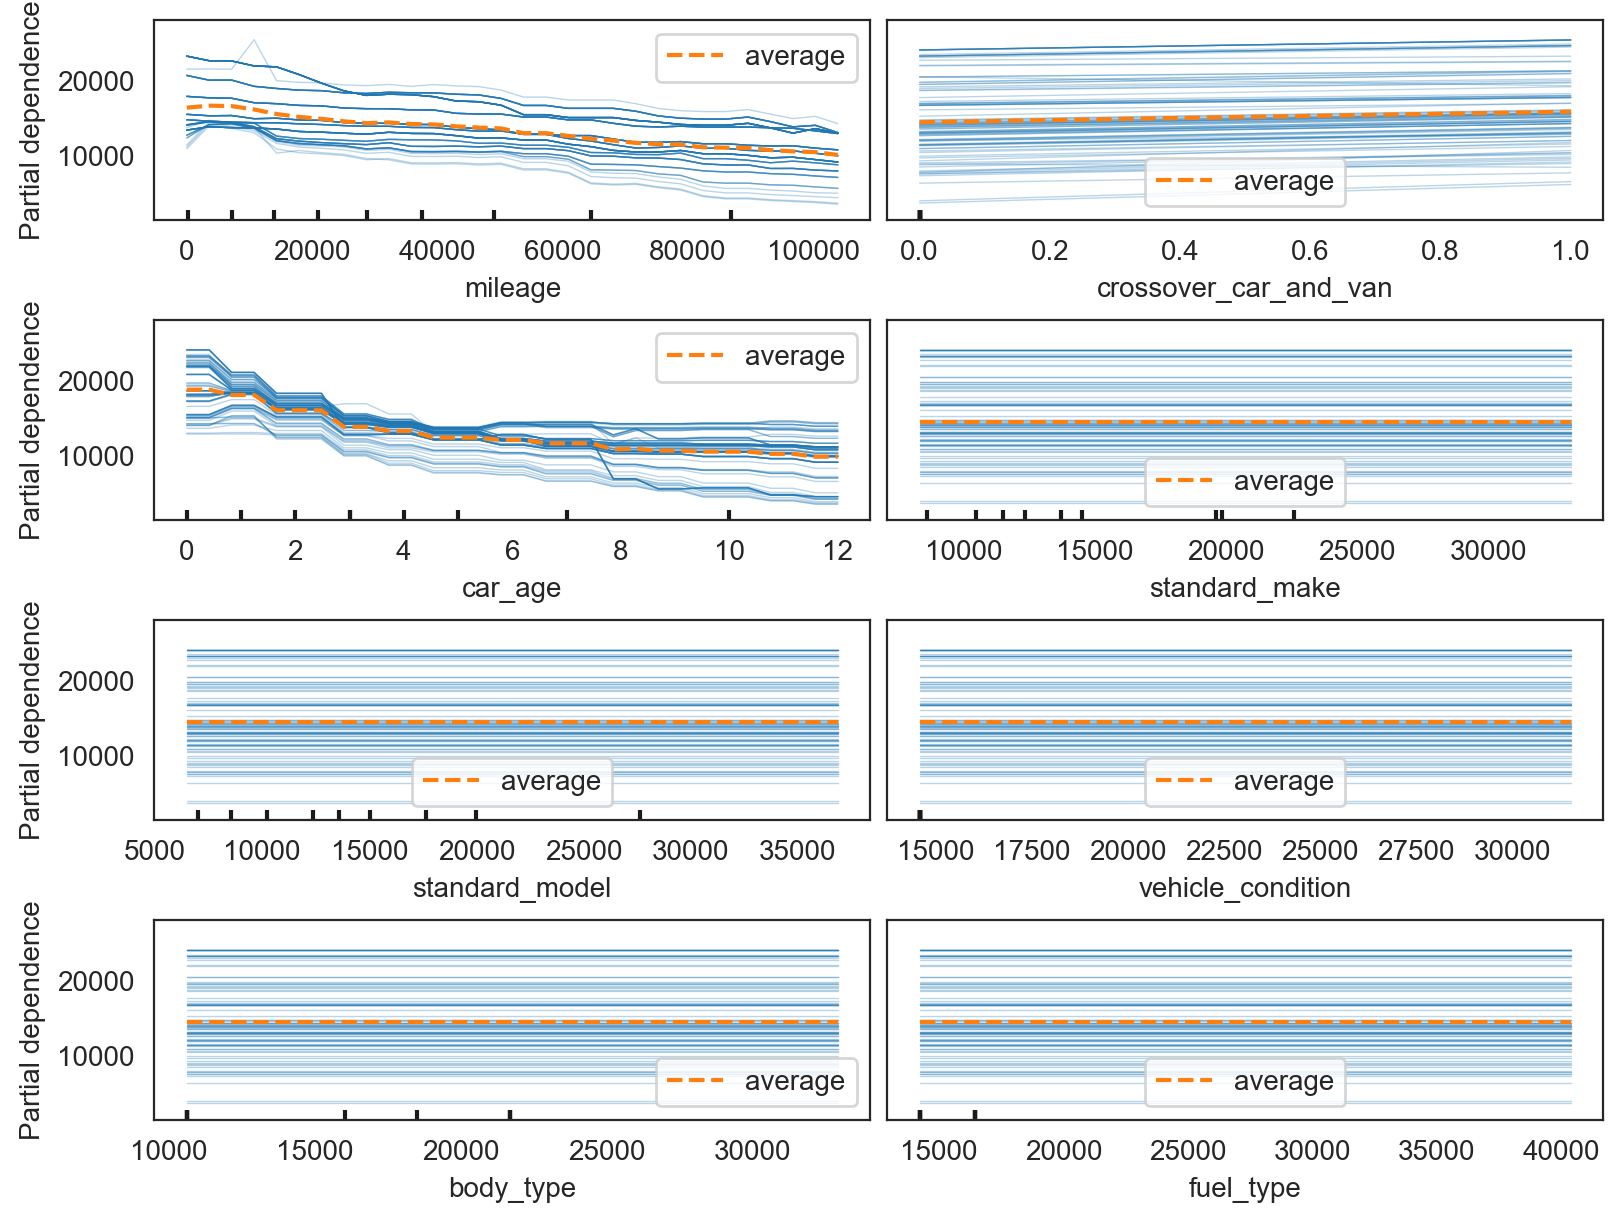

In [135]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    gbr, X_test_pp, features= column_names,
    kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);